# Cobalt Reporting Analysis and Visualization
* Operational analysis: Provide immediate insight on patterns of behavior exhibited on the platform

153


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:82: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  account['week'] = account['created'].dt.week


48569


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:140: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  accounts_for_stats['week'] = accounts_for_stats['created'].dt.week


17538
46479
500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment PHQ9 is already complete! Saving session info for further evaluation.
1000 accounts processed...
1500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
2000 accounts processed...
2500 accounts processed...
3000 accounts processed...
3500 accounts processed...
4000 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
4500 accounts processed...
5000 accounts processed...
5500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment GAD7 is already complete! Saving session info for further evaluation.
6000 accounts processed...
6500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
7000 accounts processed...
7500 accounts processed...
8000 accounts pro

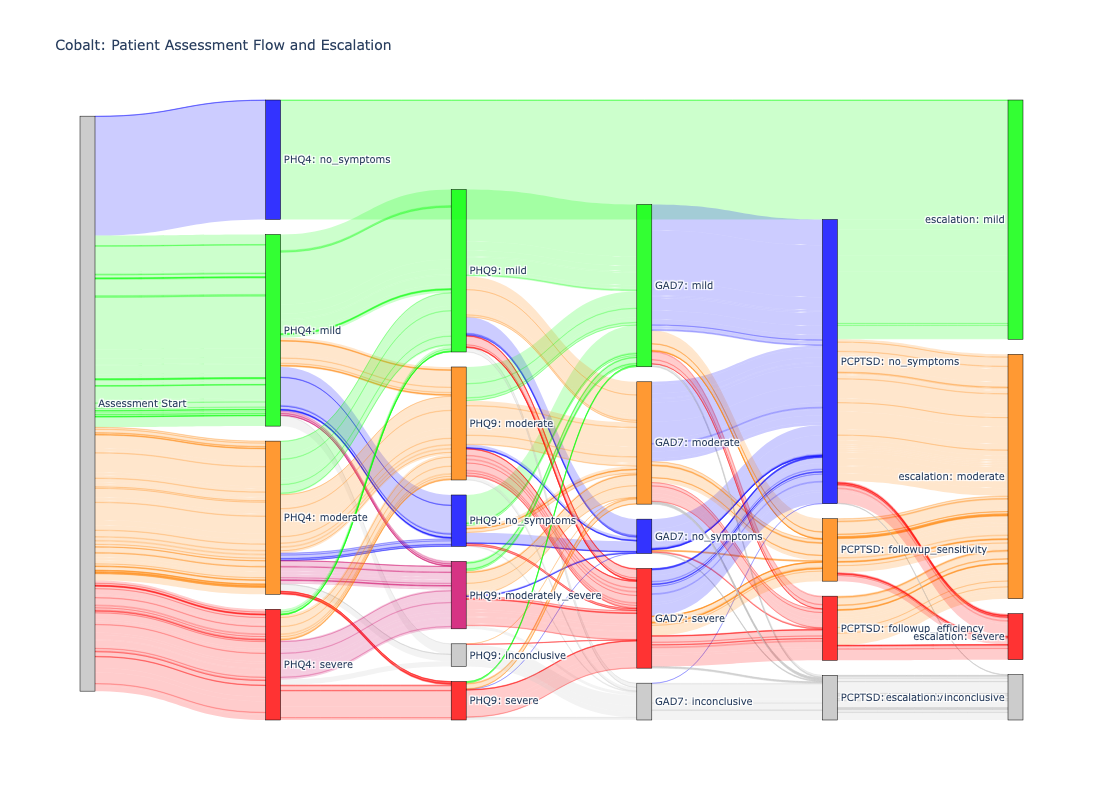

25
856


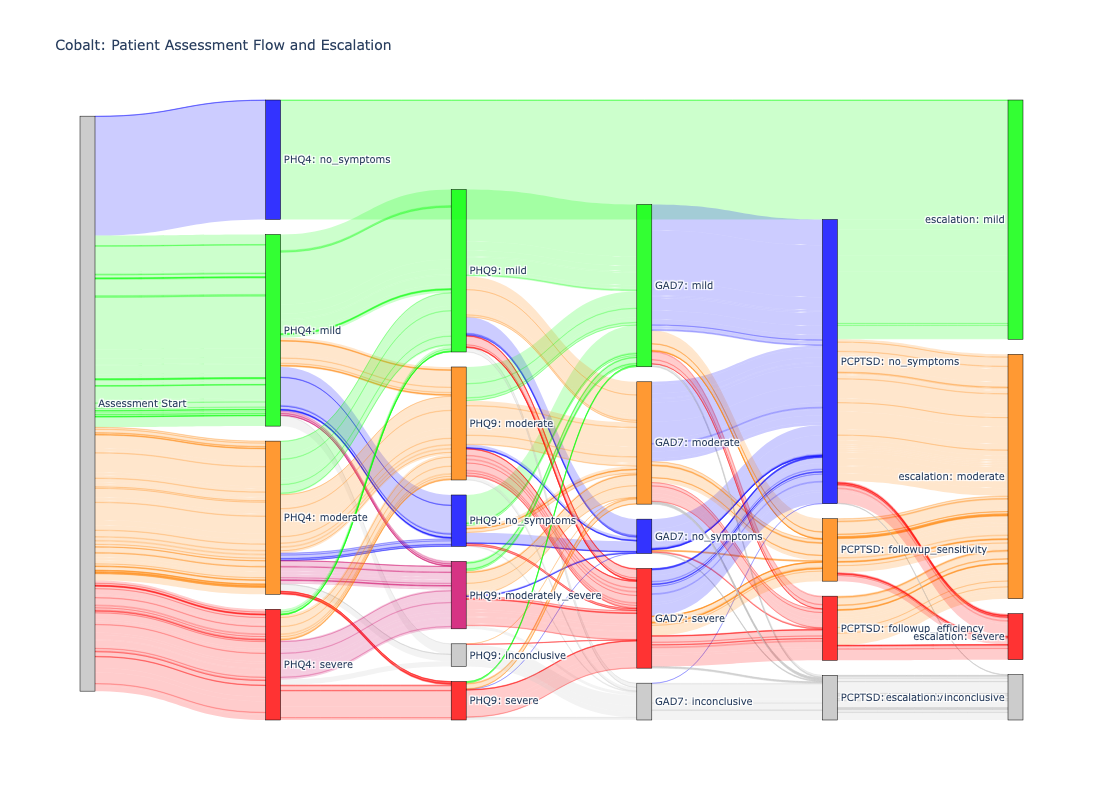

All instances: 10977
	Unique accounts associated with all instances: 8109
Instances with complete PHQ4 2763
	Unique accounts associated with complete PHQ4 2618
Instances with escalation: 2545
	Unique accounts associated with instances with escalations: 2494
Total flow volume (patients): 2763
Total link wieght per level (patients): 2763
	Total links per level (unique assessment pathways): 173
13


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:1964: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
28


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2079: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
22


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2187: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
6


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2295: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2413: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



2545
29
121
29
121


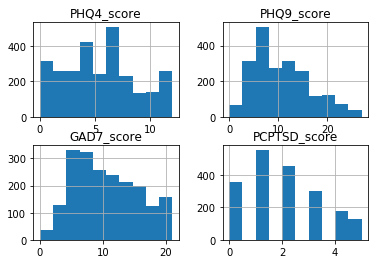

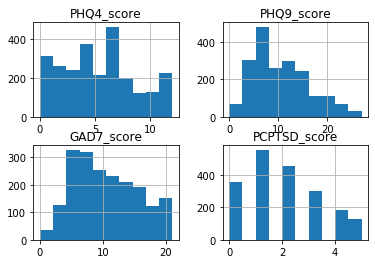

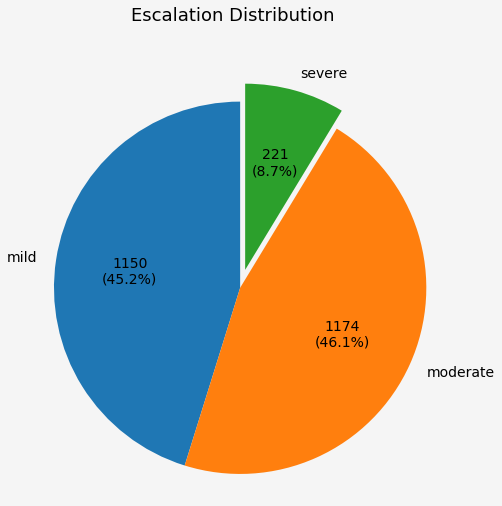

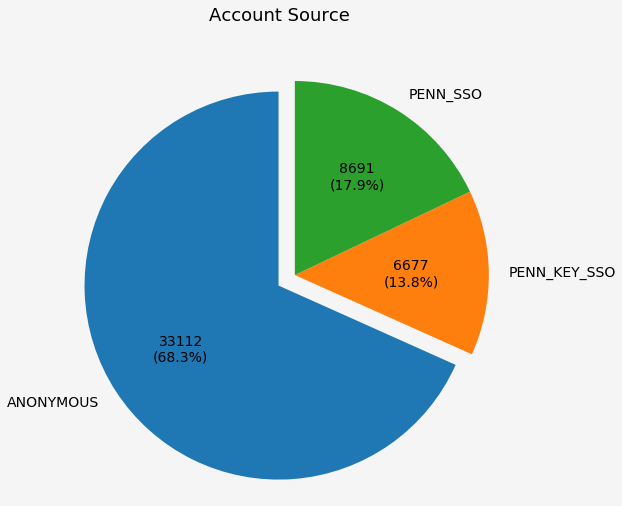

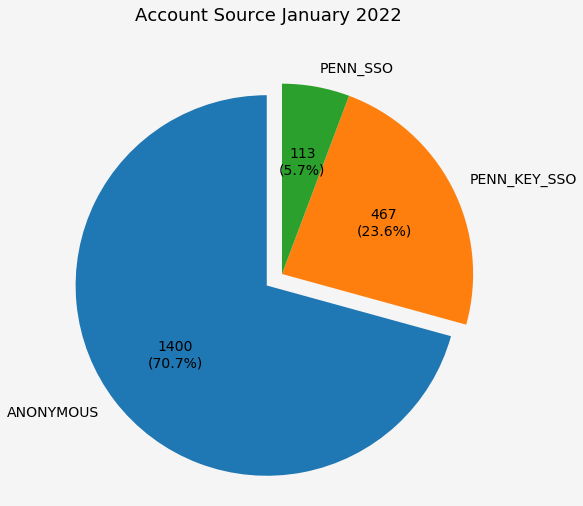

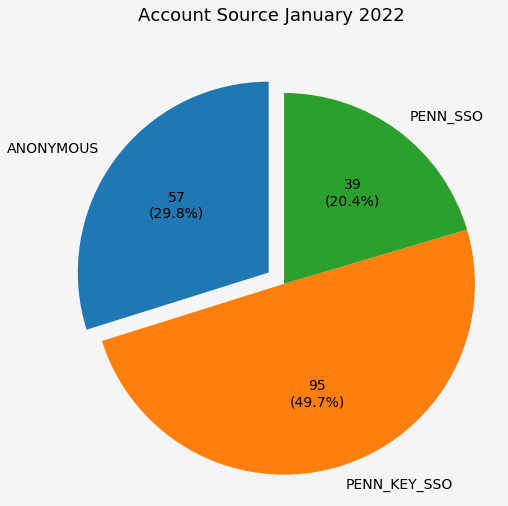

29
121
2545
100 

acct_esc_time_count    2545.0
acct_esc_time_pct         1.0
dtype: float64 

acct_esc_time_count    1985.00
acct_esc_time_pct         0.78
dtype: float64 

acct_esc_time_count    2063.0000
acct_esc_time_pct         0.8106
dtype: float64


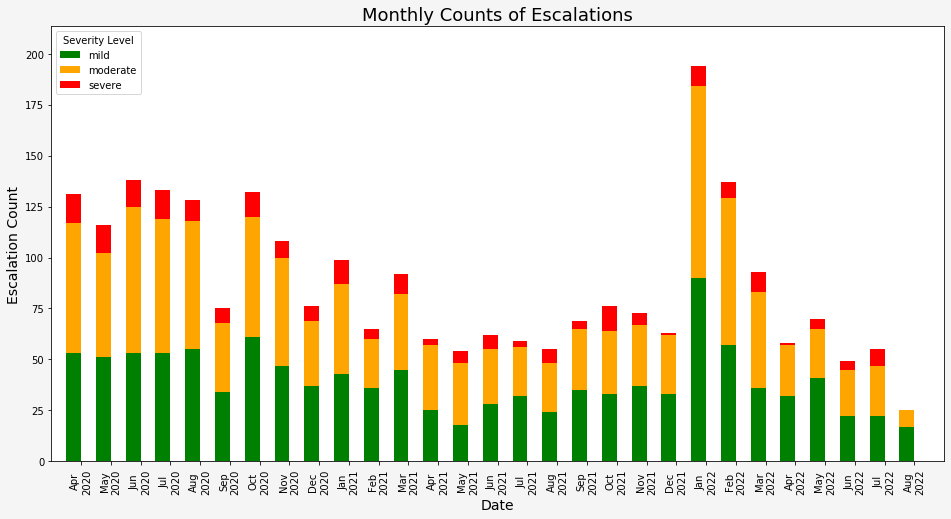

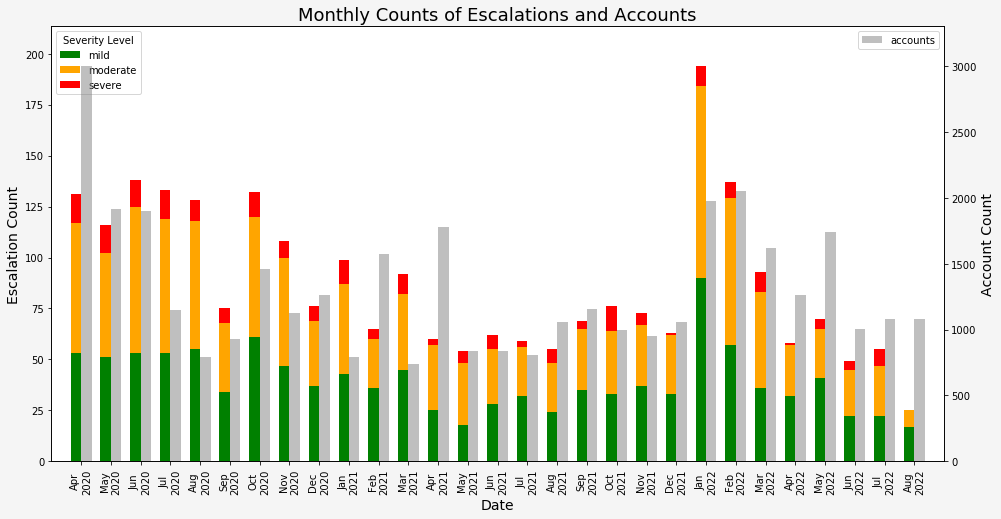

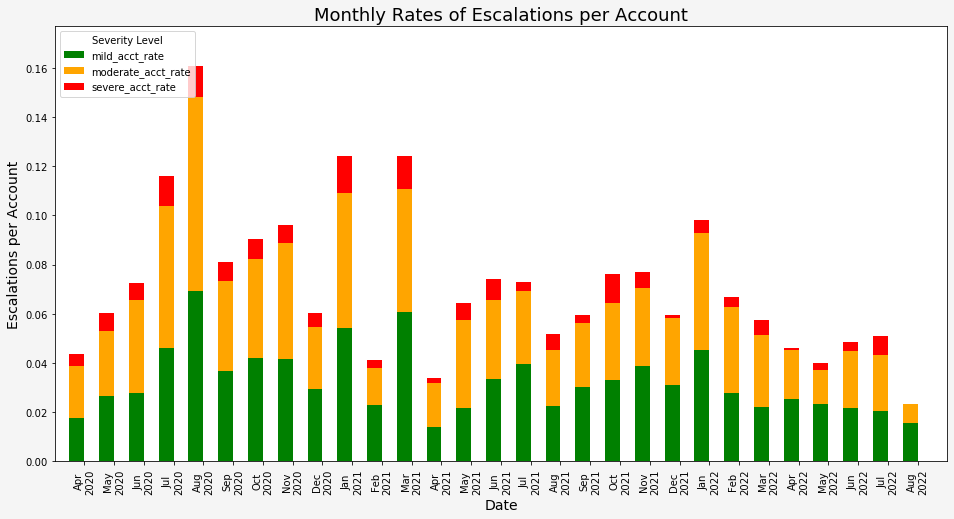

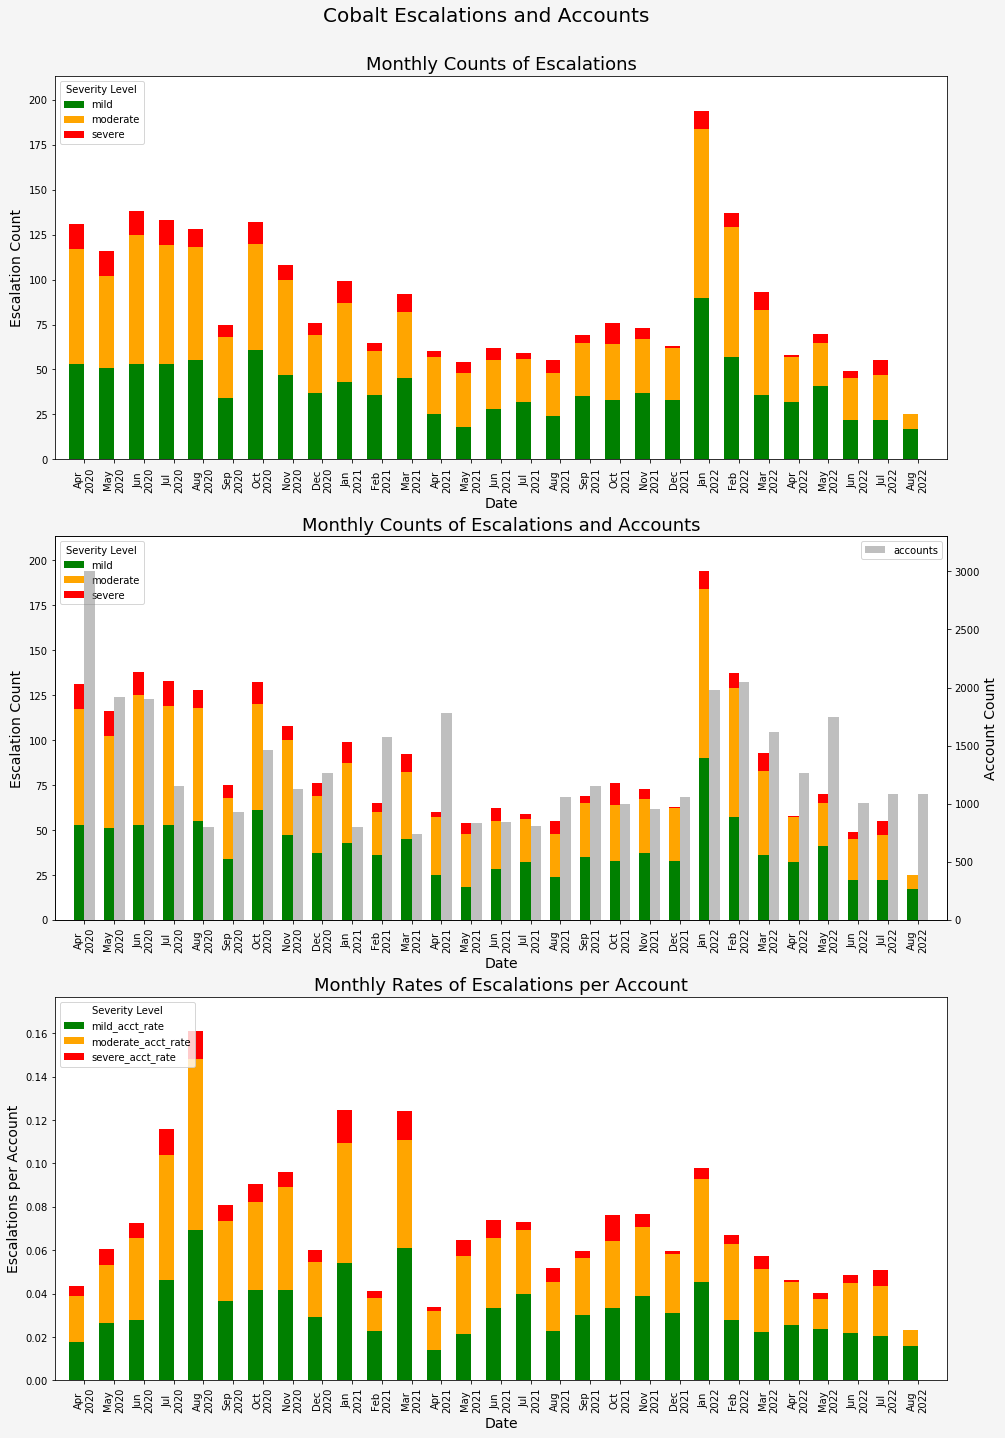

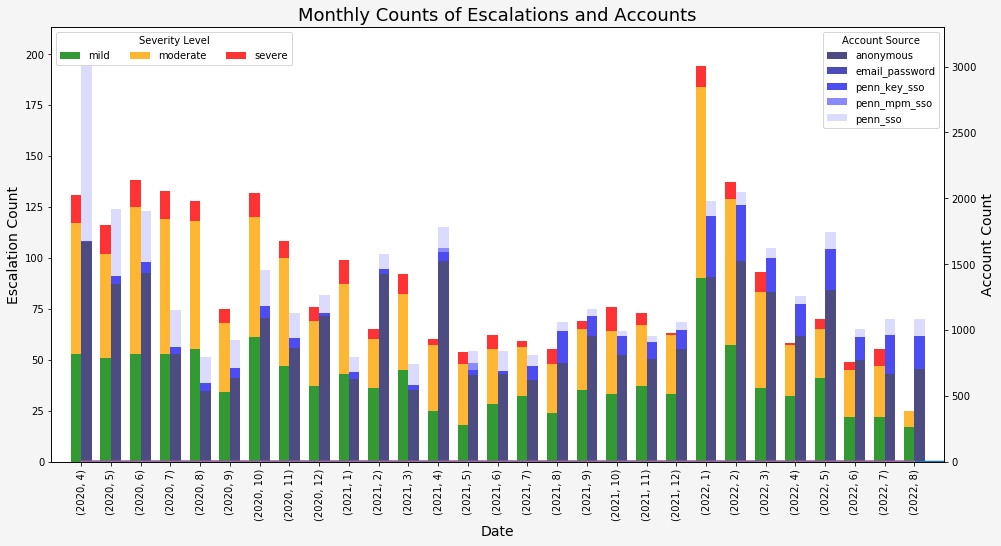

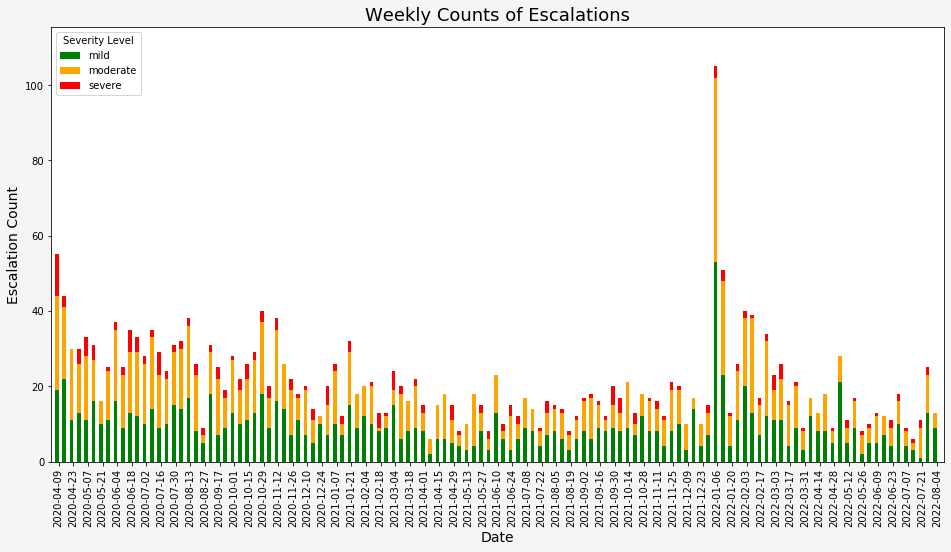

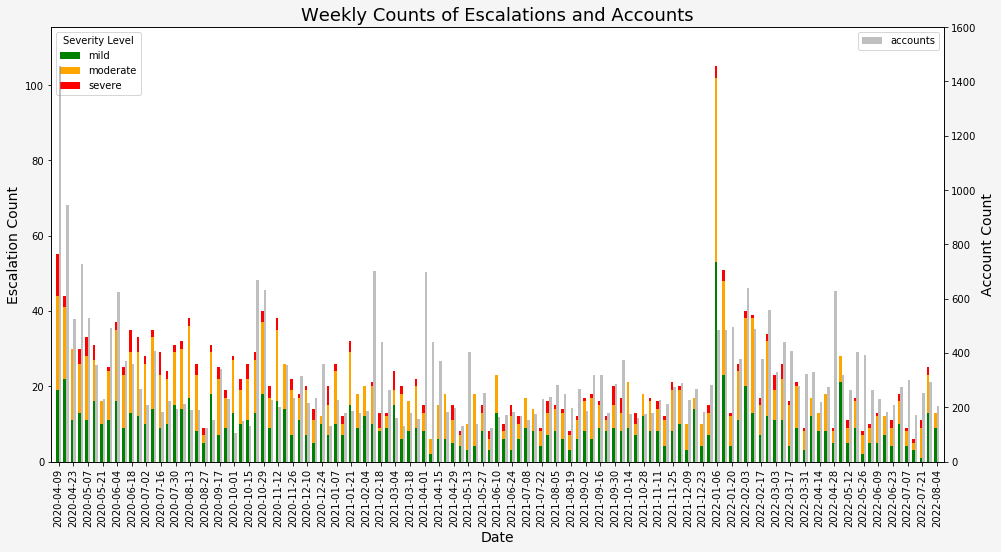

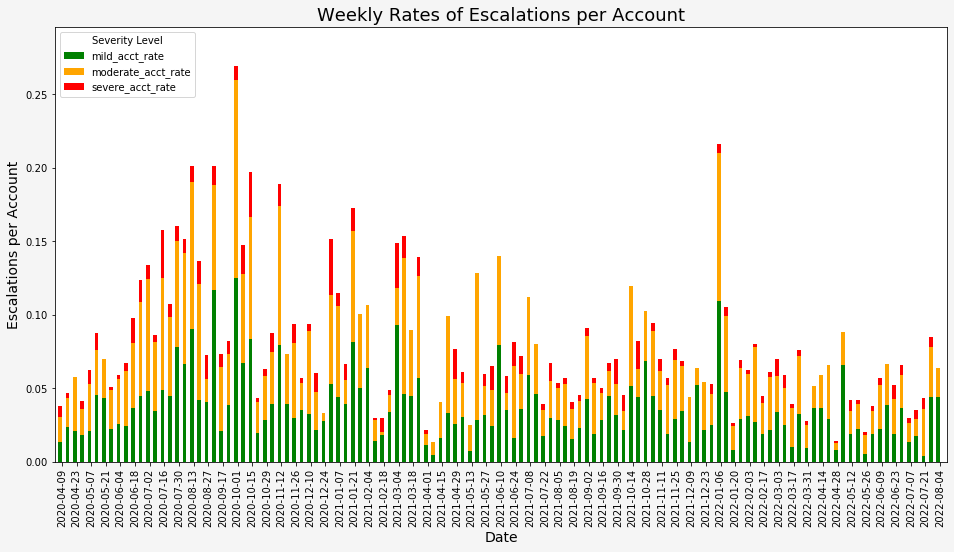

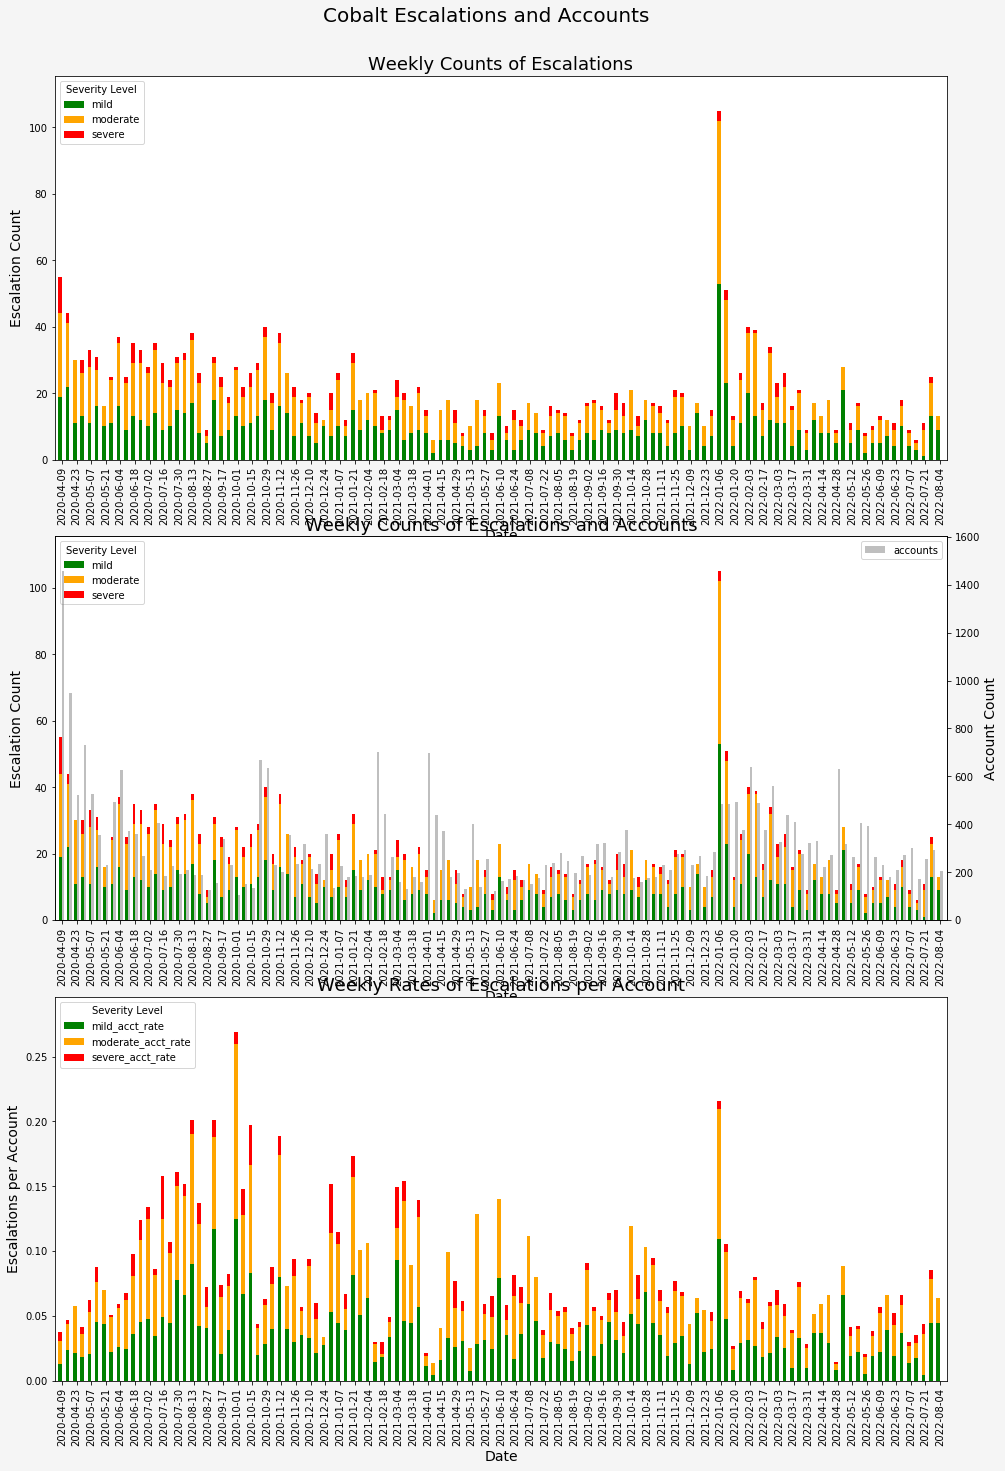

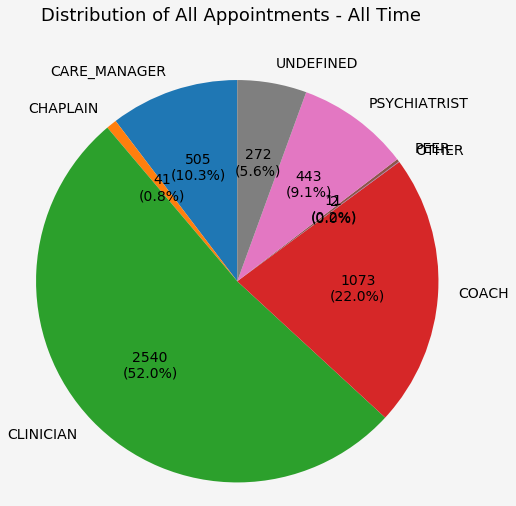

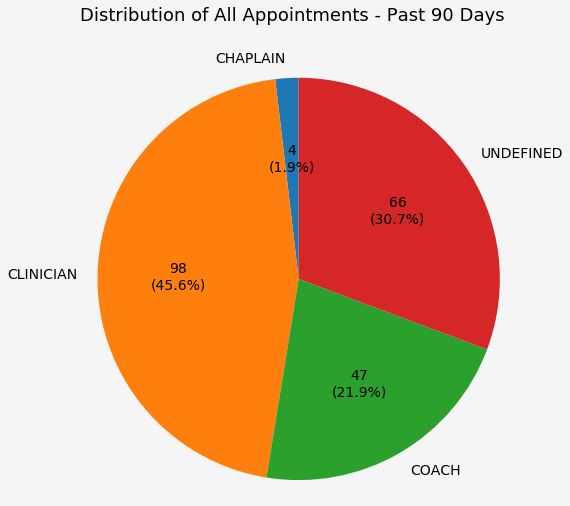

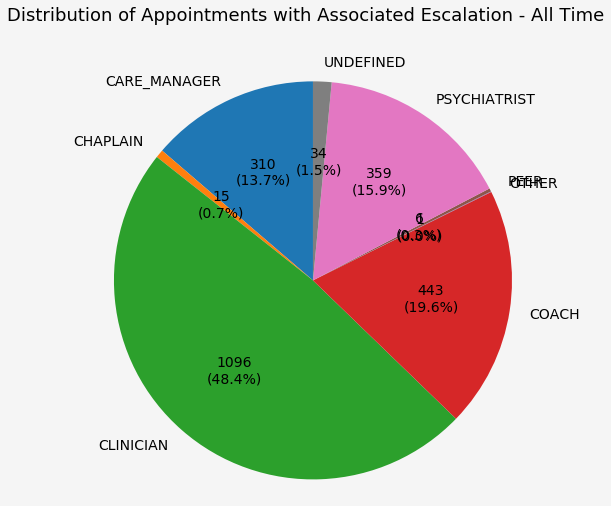

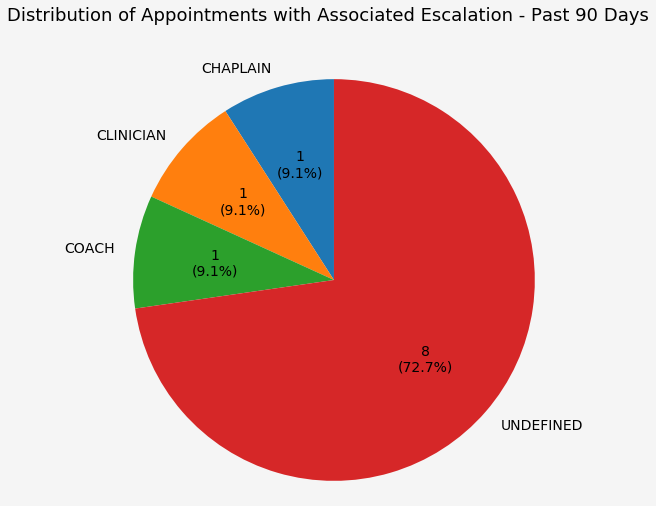

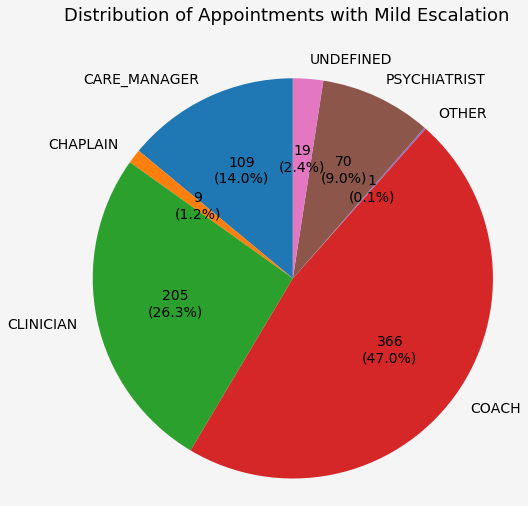

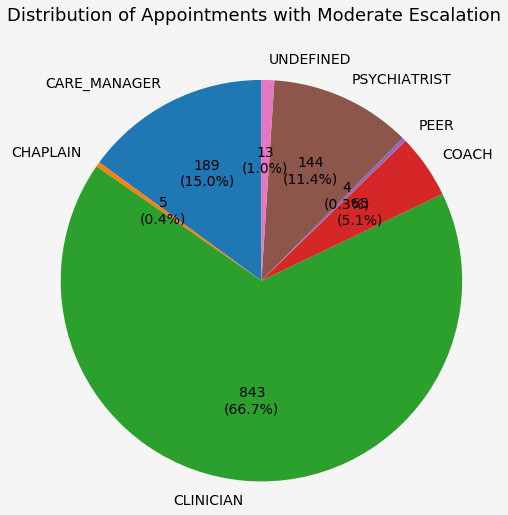

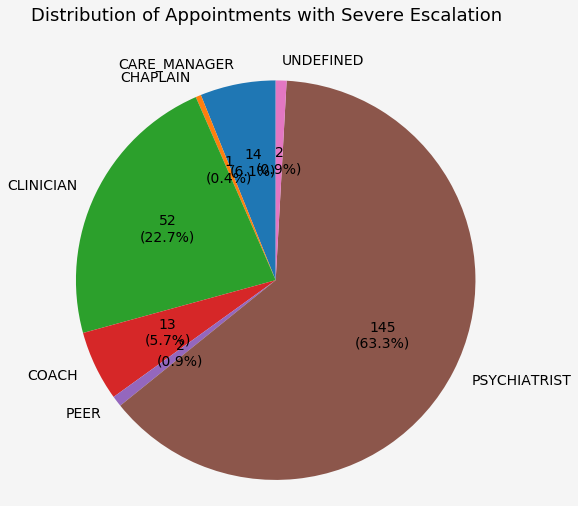

Active Accounts:
15095 unique, active accounts accessed mental health and well-being resources on the Cobalt platform
	8109 distinct accounts attempted assessments
	3255 distinct accounts booked 4887 appointments
	6598 distinct accounts engaged with content

Assessments and Escalations:
2494 unique accounts completed mental health assessments, resulting in 2545 distinct escalations
	Moderate Escalation:
	1156(46.35%) unique accounts met moderate criteria, resulting in 1174(46.13%) moderate escalations
	Severe Escalation:
	220(8.82%) unique accounts met severe criteria, resulting in 221(8.68%) severe escalations

Appointments:
1152/2494(46.19)% accounts with completed mental health assessments booked 2264 appointments with a trained mental health professional


In [1]:
# Modules
from cobalt_reporting_data import *

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from scipy import stats

import re
import datetime
from collections import defaultdict

import glob
import os
import psycopg2

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; 
sns.set()

%matplotlib inline

# Pandas view options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('precision', 4)

# Program Parameters

# Display Data

## Accounts
* Note 08/25/2021: 
    * How many employees at Penn?
    * Are all employees eligible?
    * Other groups (students) eligible in future?

### Account

In [ ]:
# Display adjusted data
print(len(account))
print(len(account.columns))
account.head(2)

### Stats Accounts

In [ ]:
# Display adjusted data
print(len(accounts_for_stats))
print(len(accounts_for_stats.columns))
accounts_for_stats.head(2)

## Providers
* NOTE 08/31/2021: Removing providers with system affinity id PIC changes counts of future appts and appt availability
    * Removing these providers also drastically changes the historic availability counts 4.4k --> 2.7k
    * Why is this? and do we still want to remove these providers?

### Provider

In [ ]:
# Display adjusted data
print(len(provider))
print(len(provider.columns))
provider.head(2)

### Provider Support Role

In [5]:
# Display adjusted data
print(len(provider_support_role))
print(len(provider_support_role.columns))
provider_support_role.head(2)

252
2


provider_id support_role_id
0  38e2bbb1-7930-40b3-ab7c-dc87eadf6444    PSYCHIATRIST
1  8f3f7c98-ce1c-42b3-9840-1b49ff83a4ce            PEER

### Provider Appointment Type

In [6]:
# Display adjusted data
print(len(provider_appointment_type))
print(len(provider_appointment_type.columns))
provider_appointment_type.head(2)

328
6


provider_appointment_type_id                           provider_id  \
0  02f452b0-d150-4c89-8ee7-f6600727be60  38e2bbb1-7930-40b3-ab7c-dc87eadf6444   
1  85e6ce45-07ea-4729-b7ca-c799790a246f  38e2bbb1-7930-40b3-ab7c-dc87eadf6444   

   display_order                          created  \
0              1 2020-07-18 01:38:53.757424+00:00   
1              2 2020-07-18 01:38:53.757424+00:00   

                      last_updated                   appointment_type_id  
0 2020-07-18 01:38:53.757424+00:00  367d33ad-2aad-4fea-a2a1-ea397e18fe43  
1 2020-07-18 01:38:53.757424+00:00  86b14268-96d9-45e9-9867-677b3d010385

## Appointments

### Appointment Type

In [7]:
# Display adjusted data
print(len(appointment_type))
print(len(appointment_type.columns))
appointment_type.head(2)

103
14


appointment_type_id  acuity_appointment_type_id  \
0  2294b4f1-7fad-454f-a118-06b479356d7d                  1.3870e+07   
1  a2cab967-9dc1-4327-94dd-da4be7652542                  2.1475e+07   

                                   name description  duration_in_minutes  \
0  1:1 Appointment with Psychotherapist        None                   60   
1           1:1 CTSA Intake Appointment        None                   45   

   deleted                          created                     last_updated  \
0    False 2020-04-29 22:49:45.585841+00:00 2021-02-05 22:32:12.739208+00:00   
1    False 2021-03-23 20:43:48.450351+00:00 2021-03-23 20:58:49.167044+00:00   

  scheduling_system_id epic_visit_type_id epic_visit_type_id_type  \
0               ACUITY               None                    None   
1               ACUITY               None                    None   

  visit_type_id  hex_color epic_visit_type_system  
0         OTHER    3692510                   None  
1         OTHER    3692510                   None

### Booked Appointments

In [8]:
# Display adjusted data
print(len(appointment))
print(len(appointment.columns))
appointment.head(2)

4887
55


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9             8.0982e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
0                         NaN              NaN            1.0305e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
0  https://bluejeans.com/166022552/0525                 1:1 with Care Manager   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
0 2022-04-22 11:00:00-04:00 2022-04-22 11:30:00                   30   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
0  America/New_York     False         NaT 2022-04-20 11:32:48.204541-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
0 2022-04-20 15:32:48.204541+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
0  aef3538a-73fa-40cf-8d3f-367022913b9c         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
0                           0525  20290377-2978-4472-b00c-6f604f25ee58   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
0               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None   
0  08048f29-035c-4341-82fd-b41406303114                    None   

  patient_reminder_scheduled_message_id patient_order_id  \
0                                  None             None   
0                                  None             None   

  epic_appointment_fhir_id appointment_cancelation_reason_id  \
0                     None                       UNSPECIFIED   
0                     None                       UNSPECIFIED   

  epic_appointment_fhir_identifier_system  \
0                                    None   
0                                    None   

  epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
0                                   None                                None   
0                                   None                                None   

   created_year  created_month  created_day created_year_month  \
0          2022              6           22         2022-06-01   
0          2022              4           20         2022-04-01   

  created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
0              2022-06-16          20220622      2022          7        6   
0              2022-04-14          20220420      2022          4       22   

 

In [9]:
# Display adjusted data
print(len(appointment_future))
print(len(appointment_future.columns))
appointment_future.head(2)

8
55


appointment_id  \
1072  8c4ad6d7-d4f2-493c-8f54-148c3072783a   
1076  04df2e16-758a-4ad7-b4b7-525323c0eacf   

                               provider_id  \
1072  688e0886-b776-4b95-89e6-2329a123ccfc   
1076  688e0886-b776-4b95-89e6-2329a123ccfc   

                                account_id  acuity_appointment_id  \
1072  5f5a6130-dcbf-4afa-a757-e581185ff55a             1.1634e+09   
1076  16f201b9-18e9-45c2-b0bd-c4e1e167785e             1.1637e+09   

      acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
1072                         NaN              NaN                   NaN   
1076                         NaN              NaN                   NaN   

                                    videoconference_url  \
1072  https://www.penncobalt.com/appointments/8c4ad6...   
1076  https://www.penncobalt.com/appointments/04df2e...   

                      title                start_time            end_time  \
1072  1:1 with Care Manager 2023-12-05 19:30:00-05:00 2023-12-05 20:00:00   
1076  1:1 with Care Manager 2023-12-05 11:00:00-05:00 2023-12-05 11:30:00   

      duration_in_minutes         time_zone  canceled canceled_at  \
1072                   30  America/New_York     False         NaT   
1076                   30  America/New_York     False         NaT   

                              created                     last_updated  \
1072 2023-12-02 09:53:07.557454-05:00 2023-12-04 11:49:06.940553+00:00   
1076 2023-12-02 20:27:09.566702-05:00 2023-12-03 01:27:09.566702+00:00   

     epic_contact_id epic_contact_id_type  \
1072            None                 None   
1076            None                 None   

                       appointment_type_id phone_number  \
1072  aef3538a-73fa-40cf-8d3f-367022913b9c   8667992329   
1076  aef3538a-73fa-40cf-8d3f-367022913b9c   8667992329   

     videoconference_platform_id                 appointment_reason_id  \
1072                   TELEPHONE  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
1076                   TELEPHONE  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                     created_by_account_id comment attendance_status_id  \
1072  5f5a6130-dcbf-4afa-a757-e581185ff55a    None              UNKNOWN   
1076  16f201b9-18e9-45c2-b0bd-c4e1e167785e    None              UNKNOWN   

     bluejeans_participant_passcode                  intake_assessment_id  \
1072                           None  db44b0ec-a1fc-4aca-93f3-d59e5e7fe43d   
1076                           None  db44b0ec-a1fc-4aca-93f3-d59e5e7fe43d   

     scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
1072               ACUITY                    False                       None   
1076               ACUITY                    False                       None   

                 intake_account_session_id interaction_instance_id  \
1072  0329f76a-1819-42ed-9268-6225f4f9ce1a                    None   
1076  fdee660d-f11e-47cc-b93e-85ffdff1aab1                    None   

     patient_reminder_scheduled_message_id patient_order_id  \
1072                                  None             None   
1076                                  None             None   

     epic_appointment_fhir_id appointment_cancelation_reason_id  \
1072                     None                       UNSPECIFIED   
1076                     None                       UNSPECIFIED   

     epic_appointment_fhir_identifier_system  \
1072                                    None   
1076                                    None   

     epic_appointment_fhir_identifier_value  \
1072                                   None   
1076                                   None   

     epic_appointment_fhir_stu3_response  created_year  created_month  \
1072                                None          2023             12   
1076                                None          2023             12   

      created_day created_year_month created_year_month_week  \
1072            2         2023-12-01              2023-11-30  

### Available Appointments

In [10]:
# Display adjusted data
print(len(provider_availability))
print(len(provider_availability.columns))
provider_availability.head(2)

1806
22


provider_availability_id                           provider_id  \
0  886ecd56-4527-4fc7-ae27-91d2b5875d6b  00e1f7e0-cb78-420c-aac8-9c841081c542   
1  3d8209cd-7c3e-4a68-85d4-43daecc63ffb  00e1f7e0-cb78-420c-aac8-9c841081c542   

                  date_time                          created  \
0 2020-10-08 08:00:00-04:00 2021-10-04 15:28:37.192211-04:00   
1 2020-10-15 08:00:00-04:00 2021-10-04 15:28:37.787609-04:00   

                      last_updated                   appointment_type_id  \
0 2021-10-04 19:28:37.192211+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   
1 2021-10-04 19:28:37.787609+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   

                     epic_department_id logical_availability_id  created_year  \
0  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   
1  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   

   created_month  created_day created_year_month created_year_month_week  \
0             10            4         2021-10-01              2021-09-30   
1             10            4         2021-10-01              2021-09-30   

  created_dayofyear  apt_year  apt_month  apt_day apt_year_month  \
0          20211004      2020         10        8     2020-10-01   
1          20211004      2020         10       15     2020-10-01   

  apt_year_month_week apt_dayofyear appointment_type_name support_role_id  
0          2020-10-08      20201008         Initial Visit       CLINICIAN  
1          2020-10-15      20201015         Initial Visit       CLINICIAN

In [11]:
provider_availability.sort_values('date_time').head(2)

provider_availability_id  \
1057  7180d236-88db-4fa5-a799-84cca44f65d1   
1058  8b80732d-020d-487d-b392-ed7d3010da56   

                               provider_id                 date_time  \
1057  8d75eca5-615b-4e92-82b0-3c6bb93fa168 2020-05-15 10:00:00-04:00   
1058  8d75eca5-615b-4e92-82b0-3c6bb93fa168 2020-05-15 13:00:00-04:00   

                              created                     last_updated  \
1057 2021-10-04 12:44:08.524178-04:00 2021-10-04 16:44:08.524178+00:00   
1058 2021-10-04 12:44:08.524178-04:00 2021-10-04 16:44:08.524178+00:00   

                       appointment_type_id  \
1057  71757e56-3a81-4053-b9ca-a97879ace957   
1058  71757e56-3a81-4053-b9ca-a97879ace957   

                        epic_department_id logical_availability_id  \
1057  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None   
1058  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None   

      created_year  created_month  created_day created_year_month  \
1057          2021             10            4         2021-10-01   
1058          2021             10            4         2021-10-01   

     created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
1057              2021-09-30          20211004      2020          5       15   
1058              2021-09-30          20211004      2020          5       15   

     apt_year_month apt_year_month_week apt_dayofyear appointment_type_name  \
1057     2020-05-01          2020-05-14      20200515         Initial Visit   
1058     2020-05-01          2020-05-14      20200515         Initial Visit   

     support_role_id  
1057    PSYCHIATRIST  
1058    PSYCHIATRIST

In [12]:
# Display adjusted data
print(len(provider_availability_future))
print(len(provider_availability_future.columns))
provider_availability_future.head(2)

379
22


provider_availability_id  \
387  9d786afa-8e9a-4334-bf96-384c2cf7554a   
388  6f42b4f5-fdd2-4587-ba16-4423b5306ae2   

                              provider_id                 date_time  \
387  688e0886-b776-4b95-89e6-2329a123ccfc 2023-12-05 11:30:00-05:00   
388  688e0886-b776-4b95-89e6-2329a123ccfc 2023-12-05 12:00:00-05:00   

                             created                     last_updated  \
387 2023-12-04 15:29:42.973901-05:00 2023-12-04 20:29:42.973901+00:00   
388 2023-12-04 15:29:42.973901-05:00 2023-12-04 20:29:42.973901+00:00   

                      appointment_type_id epic_department_id  \
387  aef3538a-73fa-40cf-8d3f-367022913b9c               None   
388  aef3538a-73fa-40cf-8d3f-367022913b9c               None   

    logical_availability_id  created_year  created_month  created_day  \
387                    None          2023             12            4   
388                    None          2023             12            4   

    created_year_month created_year_month_week created_dayofyear  apt_year  \
387         2023-12-01              2023-11-30          20231204      2023   
388         2023-12-01              2023-11-30          20231204      2023   

     apt_month  apt_day apt_year_month apt_year_month_week apt_dayofyear  \
387         12        5     2023-12-01          2023-11-30      20231205   
388         12        5     2023-12-01          2023-11-30      20231205   

     appointment_type_name support_role_id  
387  1:1 with Care Manager       CLINICIAN  
388  1:1 with Care Manager       CLINICIAN

## Group Sessions

### Group Session

In [13]:
print(len(group_session))
print(len(group_session.columns))
group_session.head(2)

589
45


group_session_id institution_id  \
0  98a359ac-f5c4-4db1-8582-446690815d0c           PENN   
1  a1dbdf16-7b66-4627-b678-8bd522175eb9           PENN   

  group_session_status_id assessment_id  \
0                ARCHIVED          None   
1                ARCHIVED          None   

                                              title  \
0      Understanding Nightmares with Dr. Lily Brown   
1  Connecting With Other People with Dr. Lily Brown   

                                         description  \
0  <p>Many people struggle with negative dreams t...   
1  <p>Join <strong>Dr. Lily Brown, Director of th...   

                 facilitator_account_id facilitator_name  \
0  b62b66bd-8855-4f36-980d-cc3bc5ae4ab1   Dr. Lily Brown   
1  b62b66bd-8855-4f36-980d-cc3bc5ae4ab1   Dr. Lily Brown   

  facilitator_email_address  \
0  shapiro.cobalt@gmail.com   
1  shapiro.cobalt@gmail.com   

                                           image_url  \
0  https://penncobalt.s3.us-east-2.amazonaws.com/...   
1  https://penncobalt.s3.us-east-2.amazonaws.com/...   

                                 videoconference_url     start_date_time  \
0  https://teams.microsoft.com/l/meetup-join/19%3... 2023-09-18 12:00:00   
1  https://teams.microsoft.com/l/meetup-join/19%3... 2023-09-25 12:00:00   

        end_date_time  seats                url_name  \
0 2023-09-18 12:30:00  200.0              nightmares   
1 2023-09-25 12:30:00  200.0  connecting-with-others   

  confirmation_email_content locale         time_zone  \
0                       None  en-US  America/New_York   
1                       None  en-US  America/New_York   

                           created                     last_updated  \
0 2023-08-11 15:24:13.845623+00:00 2023-09-18 16:30:55.727315+00:00   
1 2023-08-11 15:26:50.036059+00:00 2023-09-25 16:30:04.130385+00:00   

  group_session_scheduling_system_id  send_followup_email  \
0                             COBALT                 True   
1                             COBALT                 True   

                              followup_email_content  \
0  Good morning!\n\nThank you for attending the C...   
1  Good morning!\n\nThank you for attending the C...   

                           followup_email_survey_url  \
0  https://redcap.med.upenn.edu/surveys/?s=F3RRD8...   
1  https://redcap.med.upenn.edu/surveys/?s=F3RRD8...   

                   submitter_account_id  \
0  b62b66bd-8855-4f36-980d-cc3bc5ae4ab1   
1  b62b66bd-8855-4f36-980d-cc3bc5ae4ab1   

                                    en_search_vector  \
0  'anxieti':35 'brown':6,25,52 'center':29 'dire...   
1  'anxieti':22 'brown':8,12,43 'center':16 'conn...   

       target_email_address                     screening_flow_id  \
0  shapiro.cobalt@gmail.com  aba782b0-c89b-47c6-b74b-2d75685916aa   
1  shapiro.cobalt@gmail.com  aba782b0-c89b-47c6-b74b-2d75685916aa   

   visible_flag group_session_collection_id followup_time_of_day  \
0          True                        None             11:30:00   
1          True                        None             11:30:00   

   followup_day_offset  send_reminder_email reminder_email_content  \
0                  1.0                False                   None   
1                  1.0                False                   None   

   single_session_flag date_time_description  \
0                 True                  None   
1                 True                  None   

  group_session_learn_more_method_id learn_more_description  \
0                               None                   None   
1                               None                   None   

   different_email_address_for_notifications group_session_location_type_id  \
0                                      False                        VIRTUAL   
1                                      False                        VIRTUAL   

  in_person_location override_platform_name override_platform_email_image_url  \
0               None                   None             

### Group Session Request

In [14]:
print(len(group_session_request))
print(len(group_session_request.columns))
group_session_request.head(2)

10
17


group_session_request_id institution_id  \
0  c6c79e7b-ab4d-4def-8acf-d4f320878c70           PENN   
1  189281a0-ba53-4b7d-9d74-3fe32330c6b1           PENN   

  group_session_request_status_id  \
0                         DELETED   
1                           ADDED   

                                               title  \
0        Wellfocused's Maintaining Physical Wellness   
1  Wellfocused's Maintaining Physical Wellness - ...   

                                         description facilitator_account_id  \
0  While fitness and nutrition have always been e...                   None   
1  While fitness and nutrition have always been e...                   None   

   facilitator_name                facilitator_email_address  \
0     Kelley Kugler    rachel.kishton@pennmedicine.upenn.edu   
1  Mitchell Sherman  mitchell.sherman@pennmedicine.upenn.edu   

                                           image_url           url_name  \
0  https://penncobalt.s3.us-east-2.amazonaws.com/...  physical-wellness   
1  https://penncobalt.s3.us-east-2.amazonaws.com/...  physical-wellness   

                                   custom_question_1 custom_question_2  \
0  What would you like the facilitator to focus o...              None   
1  What, in particular, would you like to discuss...              None   

                           created                     last_updated  \
0 2020-12-10 15:21:37.555285+00:00 2023-05-10 12:24:00.274334+00:00   
1 2021-01-12 19:47:30.214032+00:00 2022-09-20 15:10:28.272552+00:00   

                   submitter_account_id  \
0  b51a9e56-2a34-4a93-b32c-bab3030ff32b   
1  b51a9e56-2a34-4a93-b32c-bab3030ff32b   

                                    en_search_vector  data_collection_enabled  
0  '-19':21 'adequ':47 'adjust':80 'alway':11 'ch...                     True  
1  '-19':24 'adequ':47 'adjust':80 'alway':14 'ch...                     True

### Group Session Reservation

In [15]:
print(len(group_session_reservation))
print(len(group_session_reservation.columns))
group_session_reservation.head(2)

13429
10


group_session_reservation_id                      group_session_id  \
0  cadb0450-b405-428f-ac04-7b897142781e  991069a0-374f-4142-8e13-d4af9885d176   
1  81e71aa2-72a4-47d9-b16d-5a55bc47a29f  dc67a1bd-e3db-44ac-b55e-83bd9c44e500   

                             account_id  canceled  \
0  4b64f47a-f321-4b0e-839e-d2e721975c78     False   
1  b51a9e56-2a34-4a93-b32c-bab3030ff32b      True   

                           created                     last_updated  \
0 2021-01-15 00:01:46.592444+00:00 2021-01-15 00:01:46.592444+00:00   
1 2020-12-10 15:44:00.874111+00:00 2020-12-10 15:55:54.917334+00:00   

  followup_email_status_id followup_email_sent_timestamp  \
0                 NOT_SENT                           NaT   
1                 NOT_SENT                           NaT   

  attendee_reminder_scheduled_message_id  \
0                                   None   
1                                   None   

  attendee_followup_scheduled_message_id  
0                                   None  
1                                   None

## Assessments

### Assessment

In [16]:
print(len(assessment))
print(len(assessment.columns))
assessment.head(2)

226
9


assessment_id assessment_type_id  \
0  8f977685-236c-4bdc-b28d-4f34167a2f1d               GAD7   
1  97d1e727-7ba2-47f9-8662-ed8b40cf69d0               PHQ9   

                                       base_question  \
0  Over the last two weeks, how often have you be...   
1  Over the last two weeks, how often have you be...   

                     next_assessment_id                          created  \
0  35efce12-dac3-4b4e-9207-84ecba44d2a4 2020-04-12 14:54:27.650335+00:00   
1  8f977685-236c-4bdc-b28d-4f34167a2f1d 2020-04-12 14:54:28.879192+00:00   

                      last_updated  minimum_eligibility_score  \
0 2020-04-12 14:54:27.650335+00:00                          0   
1 2020-04-12 14:54:28.879192+00:00                          0   

  ineligible_message  answers_may_contain_pii  
0               None                    False  
1               None                    False

### Assessment Type

In [17]:
print(len(assessment_type))
print(len(assessment_type.columns))
assessment_type.head(2)

6
2


assessment_type_id                description
0              INTRO        Introductory Survey
1               PHQ4  Evidence-Based Assessment

### Answer

In [18]:
print(len(answer))
print(len(answer.columns))
answer.head(2)

981
10


answer_id                           question_id  \
0  b3c8131a-c27f-4e1e-a028-ce605c321fc2  152784db-0962-4eaa-9e51-f54027f8b7ff   
1  0f7c098d-8b35-4ab1-819d-7cbaa86c2216  152784db-0962-4eaa-9e51-f54027f8b7ff   

  answer_text  display_order  answer_value  crisis  \
0         yes              1             0   False   
1          no              2             1   False   

                           created                     last_updated   call  \
0 2020-06-02 12:30:32.107099+00:00 2020-06-02 12:30:32.107099+00:00  False   
1 2020-06-02 12:30:32.107099+00:00 2020-06-02 12:30:32.107099+00:00  False   

  next_question_id  
0             None  
1             None

### Answer Category

In [19]:
print(len(answer_category))
print(len(answer_category.columns))
answer_category.head(2)

520
5


answer_category_id                             answer_id  \
0  3fd34678-0612-40b1-9c9d-73e964d26b15  439285ca-45c9-4ca7-85b1-cbc0d73ea131   
1  5a4e6386-18aa-4560-a0df-a90eb2bf595c  439285ca-45c9-4ca7-85b1-cbc0d73ea131   

  category_id                          created  \
0         1.1 2020-04-12 14:54:32.764931+00:00   
1         1.7 2020-04-12 14:54:32.764931+00:00   

                      last_updated  
0 2020-04-12 14:54:32.764931+00:00  
1 2020-04-12 14:54:32.764931+00:00

### Category

In [20]:
print(len(category))
print(len(category.columns))
category.head(2)

72
2


category_id                description
0         1.1  1.1 My mood on covid unit
1         1.2    1.2 My mood in hospital

### Question
* overlapping phq4 questions excluded from phq9 and gad7

In [21]:
print(len(question))
print(len(question.columns))
question.head(2)

416
14


question_id                         assessment_id  \
0  cbdc2009-51d5-4935-921c-d68f82ba7370  35efce12-dac3-4b4e-9207-84ecba44d2a4   
1  7f570aa2-e4af-48d3-9707-c26f20c261f9  35efce12-dac3-4b4e-9207-84ecba44d2a4   

  question_type_id                                      question_text  \
0             QUAD  had nightmares about the events related to cov...   
1             QUAD  tried hard not to think about  events related ...   

   answer_column_count  display_order                          created  \
0                    1              1 2020-04-12 14:54:26.638161+00:00   
1                    1              2 2020-04-12 14:54:26.638161+00:00   

                      last_updated  is_root_question  answer_required  \
0 2020-04-12 14:54:26.638161+00:00             False             True   
1 2020-04-12 14:54:26.638161+00:00             False             True   

  cms_question_text font_size_id question_content_hint_id assessment_name  
0              None      DEFAULT                     NONE          PCPTSD  
1              None      DEFAULT                     NONE          PCPTSD

### Question Type

In [22]:
print(len(question_type))
print(len(question_type.columns))
question_type.head(2)

9
4


question_type_id  description  allow_multiple_answers  \
0            RADIO  Radio Group                   False   
1         DROPDOWN     Dropdown                   False   

   requires_text_response  
0                   False  
1                   False

## Engagment

### Content

In [23]:
print(len(content))
print(len(content.columns))
content.head(2)

665
19


content_id content_type_id  \
0  61b2c825-4a76-42ab-9160-1d5a4d6a60f1         ARTICLE   
1  ce07f302-cc2a-4cd0-b6fa-9343e266b1b6         PODCAST   

                                  title  \
0  What is alcohol addiction treatment?   
1  What to Do about Brain Fog? (Part 1)   

                                                 url  \
0  https://www.caron.org/addiction-101/alcohol-ad...   
1                       https://youtu.be/_KTteqiI8lc   

               date_created  \
0 2023-03-29 00:00:00+00:00   
1 2022-02-28 00:00:00+00:00   

                                           image_url  \
0  https://penncobalt.s3.us-east-2.amazonaws.com/...   
1  https://penncobalt.s3.us-east-2.amazonaws.com/...   

                                         description          author  \
0  Alcohol use and addiction has the potential to...       Caron.org   
1  Have you been feeling disorganized, mentally s...  Dr. Lily Brown   

                           created                     last_updated  \
0 2023-03-29 17:56:58.311541+00:00 2023-08-29 17:59:28.315024+00:00   
1 2022-02-28 18:28:20.677512+00:00 2023-07-04 12:43:52.825673+00:00   

  owner_institution_id  deleted_flag  archived_flag  \
0                 PENN         False          False   
1                 PENN         False          False   

  owner_institution_approval_status_id other_institution_approval_status_id  \
0                             APPROVED                              PENDING   
1                             APPROVED                              PENDING   

  visibility_id  duration_in_minutes content_type_label_id  \
0       PRIVATE                  4.0               ARTICLE   
1       PRIVATE                  7.0               PODCAST   

                                    en_search_vector  
0  '-2332':131 '-678':130 '/addiction-101.':161 '...  
1  '1':8 '2':96 'amidst':89 'anxieti':58 'anyon':...

### Activity Tracking

In [24]:
print(len(activity_tracking))
print(len(activity_tracking.columns))
activity_tracking.head(2)

38535
9


activity_tracking_id                            account_id  \
0  1d373d36-07a5-4646-a97b-ff5010e29d0a  a924fd84-57c5-465a-8343-b4708535ba48   
1  57732d9a-f8df-4baf-a85e-86a6c66626fb  312aeafc-dcaf-4a1b-bf92-b3fe64328f14   

  activity_type_id activity_action_id                          created  \
0          ACCOUNT             CREATE 2021-12-14 23:51:39.516663+00:00   
1          ACCOUNT             CREATE 2021-12-14 23:52:08.878310+00:00   

                      last_updated session_tracking_id  \
0 2021-12-14 23:51:39.516663+00:00                None   
1 2021-12-14 23:52:08.878310+00:00                None   

                                             context activity_key  
0  {'accountId': 'a924fd84-57c5-465a-8343-b470853...         None  
1  {'accountId': '312aeafc-dcaf-4a1b-bf92-b3fe643...         None

### Popular Content

In [25]:
print(len(popular_content_past_30day))
print(len(popular_content_past_30day.columns))
popular_content_past_30day.head(2)

71
8


content_id                          created  \
0  c0006e92-ddd3-45ec-9d61-ff03dc227aa7 2023-10-04 13:51:00.180348+00:00   
1  567a2294-6e08-445a-9f56-0051df34c725 2023-11-14 20:45:12.335986+00:00   

  content_type_id                                              title  \
0           VIDEO               Promoting Connection to Your Partner   
1           VIDEO  Supporting Your Loved Ones with Anxiety or Dep...   

                                         description           author  \
0  <p>Join Dr. Lily Brown, Assistant Professor, U...   Dr. Lily Brown   
1  <p>In this session, we will discuss common exp...  Dr. Erica Weitz   

   duration_in_minutes  view_count  
0                 27.0          33  
1                 24.0          21

#### Content Summary

In [26]:
print(len(popular_content_past_30day_summary))
print(len(popular_content_past_30day_summary.columns))
popular_content_past_30day_summary.head(2)

5
3


content_count  view_count  views_per_content
content_type_id                                              
APP                          3           3             1.0000
ARTICLE                     37          69             1.8649

## Sessions

### Account Session

In [27]:
print(len(account_session))
print(len(account_session.columns))
account_session.head(2)

35172
8


account_session_id                            account_id  \
0  bc04a78f-88f2-47e5-9a10-da9218783ef0  009bc0c1-4b47-4c45-9087-a3318eb2d82e   
1  ca5a03c2-d92c-4a8c-aa37-06b66ded0b7b  69760d0b-3fd3-4194-876e-998802f36482   

                          assessment_id  current_flag  complete_flag  \
0  5fd4d04b-a121-4b47-8743-27f4400c3593         False           True   
1  5fd4d04b-a121-4b47-8743-27f4400c3593          True          False   

                           created                     last_updated  \
0 2020-04-12 14:59:19.380639+00:00 2020-04-12 21:54:03.888699+00:00   
1 2020-04-14 13:05:49.342533+00:00 2020-04-14 13:05:49.342533+00:00   

  assessment_name  
0           INTRO  
1           INTRO

#### Account Session Summary

In [28]:
session_name_dict = dict(zip(instance_session_ids,instance_session_names))
temp_session = account_instance_session_update[account_instance_session_update['assessment_id'].isin(instance_session_ids)]
print(len(temp_session))
print(len(temp_session.account_id.unique()))
temp_session.head(2)

17538
8109


account_session_id                            account_id  \
0  68c9f147-0c12-4162-8ec9-1b7277319a1d  24878dea-5e70-472d-822b-5ffb0aefc123   
1  246f3d34-e076-4669-af05-b0c21fc5c68b  aa69663a-971b-4045-9b8b-8bb4cc12ef99   

                          assessment_id  current_flag  complete_flag  \
0  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   
1  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   

                           created                     last_updated  \
0 2022-02-24 18:47:05.980506+00:00 2022-02-24 18:47:05.980506+00:00   
1 2022-02-24 18:47:46.793340+00:00 2022-02-24 18:47:46.793340+00:00   

  assessment_name                             instance_id  num_questions  \
0            PHQ4  24878dea-5e70-472d-822b-5ffb0aefc123_0              4   
1            PHQ4  aa69663a-971b-4045-9b8b-8bb4cc12ef99_0              4   

   num_questions_answered  outcome_complete  score      severity  
0                       0                 0     -1  inconclusive  
1                       0                 0     -1  inconclusive

In [29]:
temp_session_counts = temp_session.groupby(['assessment_id','outcome_complete'])[['account_session_id']].count()
temp_session_counts = temp_session_counts.rename(index=session_name_dict)
temp_session_counts.columns = ['count']
temp_session_counts.index.names = ['assessment', 'complete']

temp_session_counts['group_pct'] = temp_session_counts['count'].groupby(level=0).apply(lambda x: x/x.sum())
temp_session_counts['total_pct'] = temp_session_counts['count']/len(temp_session)
temp_session_counts

count  group_pct  total_pct
assessment complete                             
PCPTSD     0            80     0.0389     0.0046
           1          1975     0.9611     0.1126
GAD7       0           192     0.0869     0.0109
           1          2018     0.9131     0.1151
PHQ9       0           194     0.0845     0.0111
           1          2102     0.9155     0.1199
PHQ4       0          8214     0.7483     0.4684
           1          2763     0.2517     0.1575

In [30]:
temp_session_counts = temp_session.groupby(['assessment_id'])[['account_session_id']].count()
temp_session_counts = temp_session_counts.rename(index=session_name_dict)
temp_session_counts.columns = ['count']
temp_session_counts.index.name = 'assessment'
temp_session_counts['pct'] = temp_session_counts['count']/len(temp_session)
temp_session_counts

count     pct
assessment               
PCPTSD       2055  0.1172
GAD7         2210  0.1260
PHQ9         2296  0.1309
PHQ4        10977  0.6259

### Account Session Answer

In [ ]:
print(len(account_session_answer))
print(len(account_session_answer.columns))
account_session_answer.head(2)

## Account Instances

In [32]:
print(len(account_instance))
account_instance.head(2)

10977


instance_id  \
0  000df8c8-7a8b-4060-a06a-27f65d2d2fd9_0   
1  002272e8-329d-4674-836b-c550ada83eda_0   

                             account_id  num_instance_sessions  PHQ4_attempts  \
0  000df8c8-7a8b-4060-a06a-27f65d2d2fd9                      5              1   
1  002272e8-329d-4674-836b-c550ada83eda                      1              1   

   PHQ9_attempts  GAD7_attempts  PCPTSD_attempts  PHQ4_complete  \
0              2              1                1              1   
1              0              0                0              0   

   PHQ9_complete  GAD7_complete  PCPTSD_complete  PHQ4_score  PHQ9_score  \
0              1              1                1          10          12   
1              0              0                0          -1          -1   

   GAD7_score  PCPTSD_score PHQ4_severity PHQ9_severity GAD7_severity  \
0          16             2        severe      moderate        severe   
1          -1            -1  inconclusive  inconclusive  inconclusive   

  PCPTSD_severity  crisis crisis_text  crisis_value  instance_complete  \
0     no_symptoms       0                         0                  1   
1    inconclusive       0                         0                  0   

     escalation escalation_provider                       start_time  \
0      moderate     psychotherapist 2022-02-20 01:52:12.942990+00:00   
1  inconclusive        inconclusive 2021-07-21 10:15:01.319903+00:00   

                     complete_time                     last_updated  
0 2022-02-20 01:58:59.671561+00:00 2022-02-20 01:58:59.671561+00:00  
1                              NaT 2021-07-21 10:15:01.319903+00:00

In [33]:
print(len(account_update))
account_update.head(2)

8109


account_id  role_id institution_id  \
0  afe7ff25-775e-4518-822b-a5bb56683d7d  PATIENT           PENN   
1  3115d538-f423-4618-b23b-ec6ac9e554a9  PATIENT           PENN   

  account_source_id sso_id first_name last_name display_name email_address  \
0         ANONYMOUS   None       None      None         None          None   
1         ANONYMOUS   None       None      None         None          None   

  phone_number sso_attributes  consent_form_accepted  \
0         None           None                  False   
1         None           None                  False   

  consent_form_accepted_date locale         time_zone  \
0                        NaT  en-US  America/New_York   
1                        NaT  en-US  America/New_York   

                           created                     last_updated  \
0 2021-04-08 14:08:38.598732+00:00 2021-04-08 14:08:38.598732+00:00   
1 2021-05-18 10:00:00.228881+00:00 2021-05-18 10:00:00.228881+00:00   

  _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
0                        None                             None   
1                        None                             None   

   _deprecated_epic_patient_created_by_cobalt password source_system_id  \
0                                       False     None           COBALT   
1                                       False     None           COBALT   

  provider_id beta_status_id  access_token_expiration_in_minutes  \
0        None        UNKNOWN                                 NaN   
1        None        UNKNOWN                                 NaN   

   access_token_short_expiration_in_minutes metadata  \
0                                       NaN     None   
1                                       NaN     None   

   scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
0                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
1                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

     race_id birthdate consent_form_rejected_date microsoft_id  \
0  NOT_ASKED      None                       None         None   
1  NOT_ASKED      None                       None         None   

  epic_patient_mrn institution_location_id  prompted_for_institution_location  \
0             None                    None                              False   
1             None                    None                              False   

  epic_patient_fhir_id  active  test_account epic_patient_unique_id  \
0                 None    True         False                   None   
1                 None    True         False                   None   

  epic_patient_unique_id_type username  password_reset_required  year  month  \
0                        None     None                    False  2021      4   
1                        None     None                    False  2021      5   

   week  day year_month year_month_week dayofyear  num_instances  num_sessions  
0    14    8 2021-04-01      2021-04-08  20210408              1             1  
1    20   18 2021-05-01      2021-05-13  20210518              1             1

In [34]:
print(len(account_instance_session_update))
account_instance_session_update.head(2)

17538


account_session_id                            account_id  \
0  68c9f147-0c12-4162-8ec9-1b7277319a1d  24878dea-5e70-472d-822b-5ffb0aefc123   
1  246f3d34-e076-4669-af05-b0c21fc5c68b  aa69663a-971b-4045-9b8b-8bb4cc12ef99   

                          assessment_id  current_flag  complete_flag  \
0  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   
1  de8a8ec0-6d4a-4609-9d1f-594853de9cc5          True          False   

                           created                     last_updated  \
0 2022-02-24 18:47:05.980506+00:00 2022-02-24 18:47:05.980506+00:00   
1 2022-02-24 18:47:46.793340+00:00 2022-02-24 18:47:46.793340+00:00   

  assessment_name                             instance_id  num_questions  \
0            PHQ4  24878dea-5e70-472d-822b-5ffb0aefc123_0              4   
1            PHQ4  aa69663a-971b-4045-9b8b-8bb4cc12ef99_0              4   

   num_questions_answered  outcome_complete  score      severity  
0                       0                 0     -1  inconclusive  
1                       0                 0     -1  inconclusive

In [35]:
print(len(account_session_anomalies))
account_session_anomalies.head(2)

7


account_id                    account_session_id  \
0  103d2a3a-f819-47a3-8e21-fa97c5b67db1  967e72fe-d157-495b-944e-5a112558fe94   
1  137eb919-d3f7-4561-bc9a-3e701aec8d98  421acf97-0125-4429-b171-56733d54bf58   

  assessment_name  complete_flag                          created  
0            PHQ9          False 2020-08-05 20:44:01.922354+00:00  
1            PHQ9          False 2020-08-11 20:32:50.923475+00:00

## Instance Flow

In [36]:
print(len(instance_flow))
print(instance_flow[['count','crisis']].sum())
instance_flow.head()

174
count     10977
crisis      346
dtype: int64


count  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation          
no_symptoms   mild              inconclusive  inconclusive         mild            1   
              moderately_severe inconclusive  inconclusive         mild            1   
              inconclusive      inconclusive  inconclusive         mild          572   
mild          no_symptoms       no_symptoms   no_symptoms          mild           48   
                                              followup_sensitivity moderate        2   

                                                                               crisis  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation           
no_symptoms   mild              inconclusive  inconclusive         mild             1   
              moderately_severe inconclusive  inconclusive         mild             0   
              inconclusive      inconclusive  inconclusive         mild             0   
mild          no_symptoms       no_symptoms   no_symptoms          mild             2   
                                              followup_sensitivity moderate         0   

                                                                               crisis_value_sum  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                     
no_symptoms   mild              inconclusive  inconclusive         mild                       1   
              moderately_severe inconclusive  inconclusive         mild                       0   
              inconclusive      inconclusive  inconclusive         mild                       0   
mild          no_symptoms       no_symptoms   no_symptoms          mild                       2   
                                              followup_sensitivity moderate                   0   

                                                                               crisis_value_group_mean  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                            
no_symptoms   mild              inconclusive  inconclusive         mild                         1.0000   
              moderately_severe inconclusive  inconclusive         mild                         0.0000   
              inconclusive      inconclusive  inconclusive         mild                         0.0000   
mild          no_symptoms       no_symptoms   no_symptoms          mild                         0.0417   
                                              followup_sensitivity moderate                     0.0000   

                                                                               crisis_value_flag_mean  \
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                           
no_symptoms   mild              inconclusive  inconclusive         mild                           1.0   
              moderately_severe inconclusive  inconclusive         mild                           NaN   
              inconclusive      inconclusive  inconclusive         mild                           NaN   
mild          no_symptoms       no_symptoms   no_symptoms          mild                           1.0   
                                              followup_sensitivity moderate                       NaN   

                                                                               crisis_ratio  
PHQ4_severity PHQ9_severity     GAD7_severity PCPTSD_severity      escalation                
no_symptoms   mild              inconclusive  inconclusive         mild              1.0000  
              moderately_severe inconclusive  inconclusive         mild              0.0000  
              inconclusive      inconclusive  inconclusive         mild              0.0000  
mild          no_symptoms       no_symptoms   no_symptoms          mild              0.0417  
                                              followup_sensitivity moderate          0.0000

## Sankey

In [37]:
nodes,links = get_sankey_data(instance_flow,complete_PHQ4=True,link_label='path',link_color='target')

In [38]:
print(len(nodes))
nodes.head(2)

25


severity              label                  color  idx  level
0        start   Assessment Start  rgba(192,192,192,0.8)    0      0
1  no_symptoms  PHQ4: no_symptoms      rgba(0,0,255,0.8)    1      0

In [39]:
print(len(links))
links.head(2)

856


source  target              color  \
0       0       1  rgba(0,0,255,0.2)   
1       0       1  rgba(0,0,255,0.2)   

                                                path  \
0  no_symptoms-->mild-->inconclusive-->inconclusi...   
1  no_symptoms-->moderately_severe-->inconclusive...   

                                               label  value  level  
0  no_symptoms-->mild-->inconclusive-->inconclusi...      1      0  
1  no_symptoms-->moderately_severe-->inconclusive...      1      0

## Session Outcomes

### PHQ4

In [40]:
print(len(PHQ4_data))
PHQ4_data.head(2)

13


0    149
1    165
Name: PHQ4_score, dtype: int64

In [41]:
print(len(PHQ4_ts_data))
PHQ4_ts_data.head(2)

29


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
year month                                                         
2020 4                   155           5.3742                5.0   
     5                   130           5.7615                5.0   

            PHQ4_crisis_count  
year month                     
2020 4                     23  
     5                     12

In [42]:
print(len(PHQ4_weekly_ts_data))
PHQ4_weekly_ts_data.head(2)

121


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
Year Month Week                                                         
2020 4     9                   72           5.4444                5.5   
           16                  49           5.2857                5.0   

                 PHQ4_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6

### PHQ9

In [43]:
print(len(PHQ9_data))
PHQ9_data.head(2)

28


0     8
1    16
Name: PHQ9_score, dtype: int64

In [44]:
print(len(PHQ9_ts_data))
PHQ9_ts_data.head(2)

29


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
year month                                                         
2020 4                   111          11.1982               10.0   
     5                    93          11.5914               10.0   

            PHQ9_crisis_count  
year month                     
2020 4                     23  
     5                     12

In [45]:
print(len(PHQ9_weekly_ts_data))
PHQ9_weekly_ts_data.head(2)

121


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
Year Month Week                                                         
2020 4     9                   51          12.1373               10.0   
           16                  37          10.4865                9.0   

                 PHQ9_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6

### GAD7

In [46]:
print(len(GAD7_data))
GAD7_data.head(2)

22


0    1
1    8
Name: GAD7_score, dtype: int64

In [47]:
print(len(GAD7_ts_data))
GAD7_ts_data.head(2)

29


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
year month                                                         
2020 4                   102          11.3627               12.0   
     5                    90          11.6111               11.0   

            GAD7_crisis_count  
year month                     
2020 4                     18  
     5                     11

In [48]:
print(len(GAD7_weekly_ts_data))
GAD7_weekly_ts_data.head(2)

121


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
Year Month Week                                                         
2020 4     9                   43          11.9767               12.0   
           16                  36           9.8889                9.5   

                 GAD7_crisis_count  
Year Month Week                     
2020 4     9                    12  
           16                    5

### PCPTSD

In [49]:
print(len(PCPTSD_data))
PCPTSD_data.head(2)

6


0    358
1    554
Name: PCPTSD_score, dtype: int64

In [50]:
print(len(PCPTSD_ts_data))
PCPTSD_ts_data.head(2)

29


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
year month                                                               
2020 4                     101             2.2970                  2.0   
     5                      87             2.3218                  2.0   

            PCPTSD_crisis_count  
year month                       
2020 4                       18  
     5                       11

In [51]:
print(len(PCPTSD_weekly_ts_data))
PCPTSD_weekly_ts_data.head(2)

121


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
Year Month Week                                                               
2020 4     9                     42             2.1667                  2.0   
           16                    36             2.3056                  2.0   

                 PCPTSD_crisis_count  
Year Month Week                       
2020 4     9                      12  
           16                      5

# Data Analysis and Visualization

## Accounts

In [52]:
# Display data
print(len(account))
print(len(account.columns))
account.head(2)

48569
52


account_id  role_id institution_id  \
0  afe7ff25-775e-4518-822b-a5bb56683d7d  PATIENT           PENN   
1  3115d538-f423-4618-b23b-ec6ac9e554a9  PATIENT           PENN   

  account_source_id sso_id first_name last_name display_name email_address  \
0         ANONYMOUS   None       None      None         None          None   
1         ANONYMOUS   None       None      None         None          None   

  phone_number sso_attributes  consent_form_accepted  \
0         None           None                  False   
1         None           None                  False   

  consent_form_accepted_date locale         time_zone  \
0                        NaT  en-US  America/New_York   
1                        NaT  en-US  America/New_York   

                           created                     last_updated  \
0 2021-04-08 14:08:38.598732+00:00 2021-04-08 14:08:38.598732+00:00   
1 2021-05-18 10:00:00.228881+00:00 2021-05-18 10:00:00.228881+00:00   

  _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
0                        None                             None   
1                        None                             None   

   _deprecated_epic_patient_created_by_cobalt password source_system_id  \
0                                       False     None           COBALT   
1                                       False     None           COBALT   

  provider_id beta_status_id  access_token_expiration_in_minutes  \
0        None        UNKNOWN                                 NaN   
1        None        UNKNOWN                                 NaN   

   access_token_short_expiration_in_minutes metadata  \
0                                       NaN     None   
1                                       NaN     None   

   scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
0                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
1                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

     race_id birthdate consent_form_rejected_date microsoft_id  \
0  NOT_ASKED      None                       None         None   
1  NOT_ASKED      None                       None         None   

  epic_patient_mrn institution_location_id  prompted_for_institution_location  \
0             None                    None                              False   
1             None                    None                              False   

  epic_patient_fhir_id  active  test_account epic_patient_unique_id  \
0                 None    True         False                   None   
1                 None    True         False                   None   

  epic_patient_unique_id_type username  password_reset_required  year  month  \
0                        None     None                    False  2021      4   
1                        None     None                    False  2021      5   

   week  day year_month year_month_week dayofyear  
0    14    8 2021-04-01      2021-04-08  20210408  
1    20   18 2021-05-01      2021-05-13  20210518

### Account Temporal Trends

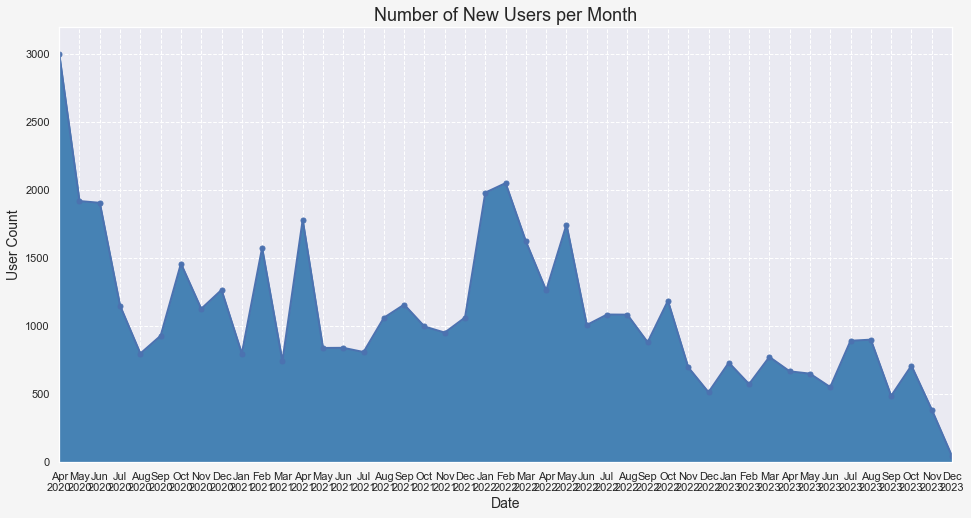

In [53]:
# New accounts by month
xlabels = get_ts_xlabels(index=acct_monthly_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(acct_monthly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Users per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(acct_monthly_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('User Count', fontsize=14)
ax.set_xlim(0,len(acct_monthly_ts_data)-1)
ax.set_ylim(0,3200)
ax.fill_between(np.arange(len(acct_monthly_ts_data)), 0, acct_monthly_ts_data['account_id'], color='steelblue')

In [54]:
# Save figure
name = FIGURE_PATH + 'account_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

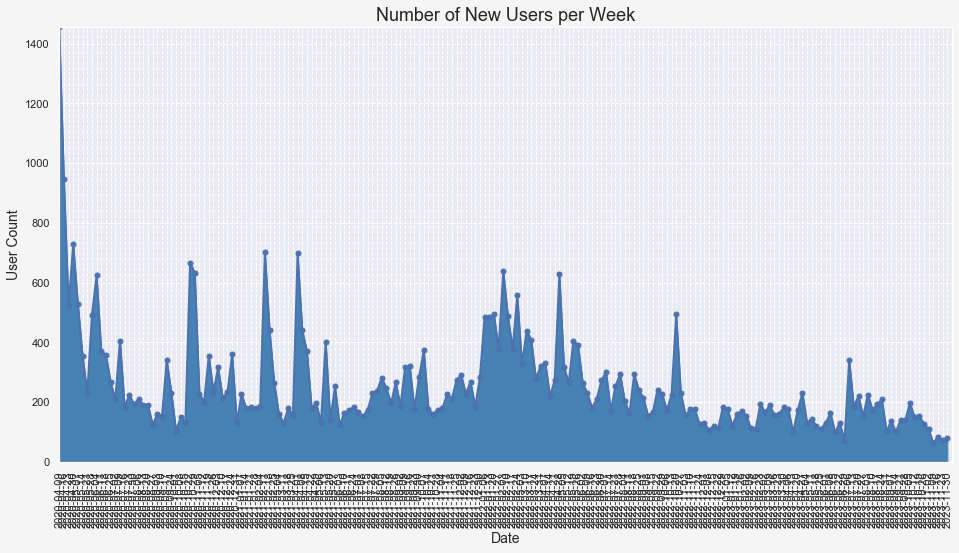

In [55]:
# New accounts by week
xlabels = get_ts_xlabels(index=acct_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(acct_weekly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Users per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(acct_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('User Count', fontsize=14)
ax.set_xlim(0,len(acct_weekly_ts_data)-0)
ax.set_ylim(0,max(acct_weekly_ts_data.values))
ax.fill_between(np.arange(len(acct_weekly_ts_data)), 0, acct_weekly_ts_data['account_id'], color='steelblue')

In [56]:
# Save figure
name = FIGURE_PATH + 'account_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Account Source

In [57]:
# Account source data
account_source = pd.concat([account['account_source_id'].value_counts(0), 
                            account['account_source_id'].value_counts(1)], axis=1)
account_source.columns = ['user_count', 'user_pct']
account_source = account_source.rename(index={'PENN_SSO':'UPHS_KEY','PENN_KEY_SSO':'PENN_KEY'})
account_source['user_pct'] = account_source['user_pct'].round(3)

In [58]:
# save chart
name = CHART_PATH + 'account_source_summary_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
account_source.to_csv(name)

In [59]:
account_source.head()
print(account_source.iloc[:].sum())
print(account_source.iloc[1:].sum())

user_count    48569.0
user_pct          1.0
dtype: float64
user_count    15457.000
user_pct          0.318
dtype: float64


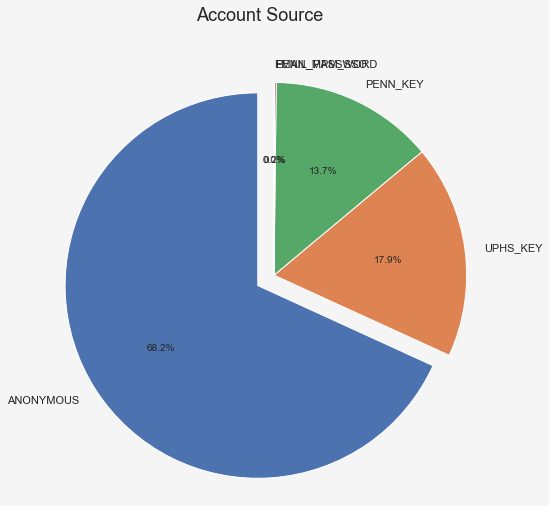

In [60]:
# Pie chart
labels = account_source.index
pie_data = account_source.user_count
explode = [0.1,0,0,0,0]

fig, ax = plt.subplots(figsize=(8,8), facecolor='whitesmoke')
ax.pie(pie_data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.suptitle('Account Source', fontsize=18)

plt.show()

In [61]:
# Save figure
name = FIGURE_PATH + 'account_source_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

In [62]:
print(len(acct_src_ts_data))
acct_src_ts_data.head(2)

45


account_source_id  ANONYMOUS  EMAIL_PASSWORD  PENN_KEY_SSO  PENN_MPM_SSO  \
year month                                                                 
2020 4                1670.0             0.0           5.0           0.0   
     5                1345.0             0.0          66.0           0.0   

account_source_id  PENN_SSO  
year month                   
2020 4               1328.0  
     5                507.0

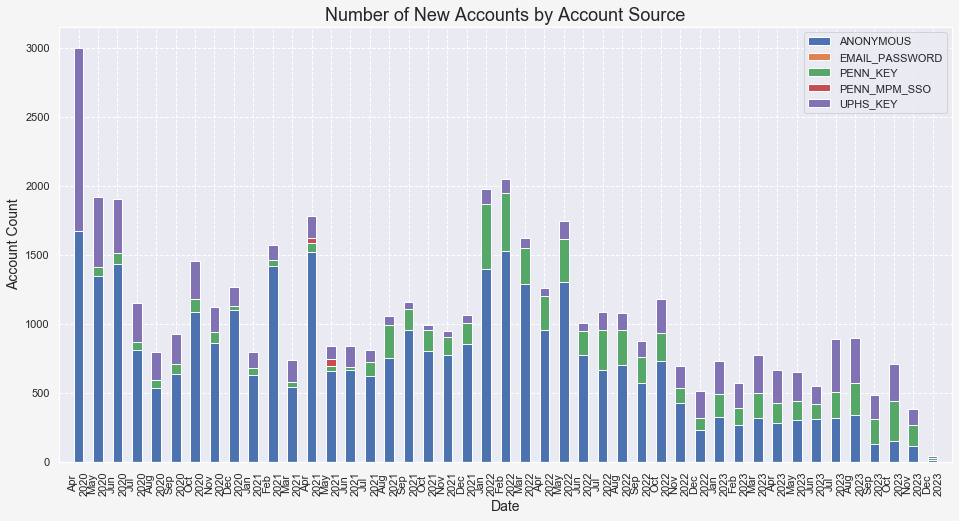

In [63]:
acct_src_ts_data = acct_src_ts_data.rename(columns={'PENN_SSO':'UPHS_KEY','PENN_KEY_SSO':'PENN_KEY'})
xlabels = get_ts_xlabels(index=acct_src_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
acct_src_ts_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of New Accounts by Account Source', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(acct_src_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Account Count', fontsize=14)
ax.set_xlim(-1,len(acct_src_ts_data))
#ax.set_ylim(0,APT_WEEKLY_YMAX)
ax.legend(acct_src_ts_data.columns)

save_figure(fig,FIGURE_PATH,'account_source_monthly_')

## Providers

In [ ]:
# Display data
print(len(provider))
print(len(provider.columns))
provider.head(2)

### Provider Temporal Trends

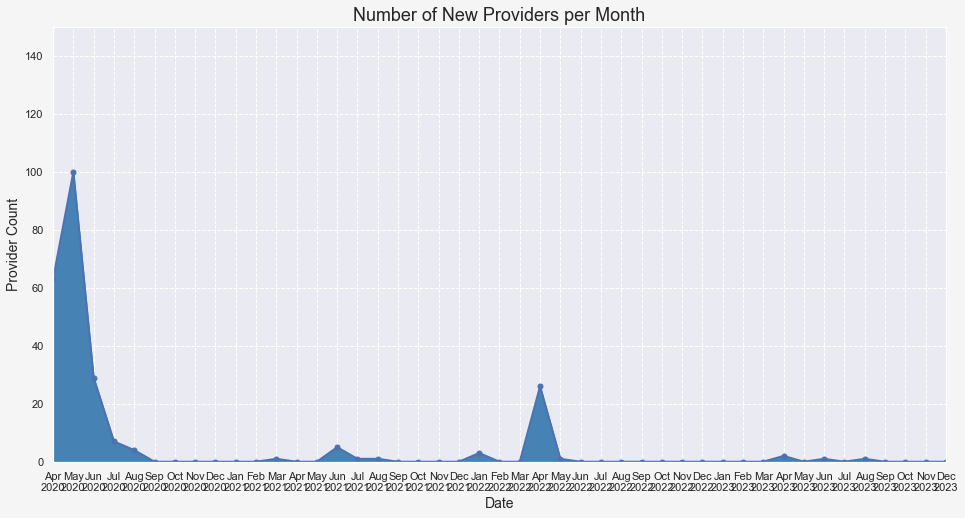

In [65]:
xlabels = get_ts_xlabels(index=prov_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(prov_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Providers per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(prov_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Provider Count', fontsize=14)
ax.set_xlim(0,len(prov_ts_data)-1)
ax.set_ylim(0,150)
ax.fill_between(np.arange(len(prov_ts_data)), 0, prov_ts_data['provider_id'], color='steelblue')

In [66]:
# Save figure
name = FIGURE_PATH + 'provider_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

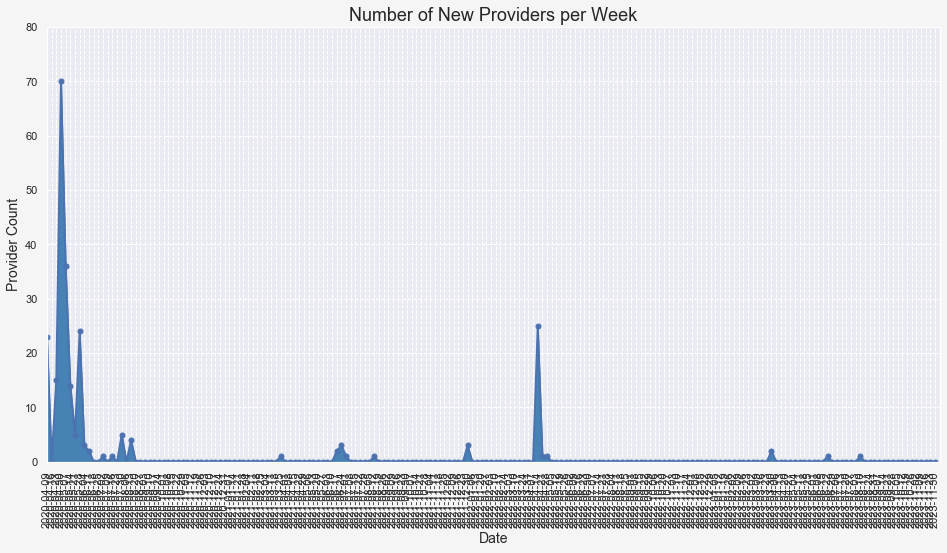

In [67]:
xlabels = get_ts_xlabels(index=prov_weekly_ts_data.index, time='weekly')

# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(prov_weekly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of New Providers per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(prov_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Provider Count', fontsize=14)
ax.set_xlim(0,len(prov_weekly_ts_data)-0)
ax.set_ylim(0,80)
ax.fill_between(np.arange(len(prov_weekly_ts_data)), 0, prov_weekly_ts_data['provider_id'], color='steelblue')

In [68]:
# Save figure
name = FIGURE_PATH + 'provider_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Provider Roles

In [69]:
print(len(provider_support_role))
print(len(provider_support_role.columns))
provider_support_role.head()

252
2


provider_id support_role_id
0  38e2bbb1-7930-40b3-ab7c-dc87eadf6444    PSYCHIATRIST
1  8f3f7c98-ce1c-42b3-9840-1b49ff83a4ce            PEER
2  8f3f7c98-ce1c-42b3-9840-1b49ff83a4ce    PSYCHIATRIST
3  688e0886-b776-4b95-89e6-2329a123ccfc       CLINICIAN
4  81d6f087-4c31-4c00-b966-860212b6e2ae       CLINICIAN

In [70]:
provider_role = pd.concat([provider_support_role['support_role_id'].value_counts(0),
                           provider_support_role['support_role_id'].value_counts(1)], axis=1)
provider_role.columns = ['provider_count', 'provider_pct']

In [71]:
name = CHART_PATH + 'provider_role_summary_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
provider_role.to_csv(name)

In [72]:
print(len(provider_role))
provider_role.head(10)

7


provider_count  provider_pct
CLINICIAN                 89        0.3532
PSYCHIATRIST              64        0.2540
COACH                     54        0.2143
PEER                      34        0.1349
CARE_MANAGER               6        0.0238
OTHER                      3        0.0119
CHAPLAIN                   2        0.0079

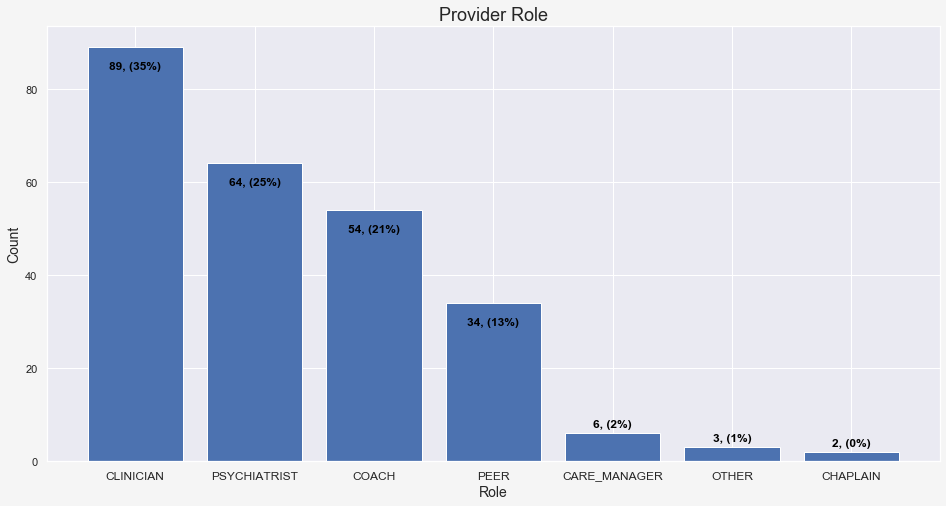

In [73]:
# Bar chart
bar_width = 0.4
xlabels = provider_role.index
index = np.arange(len(provider_role))
bar_data = provider_role.provider_count
percent_data = provider_role.provider_pct


fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
ax.bar(x=bar_data.index, height=bar_data)
ax.set_title('Provider Role', fontsize=18)
ax.set_xlabel('Role', fontsize=14)
ax.set_xticklabels(xlabels, fontsize=12, ha='center')
ax.set_ylabel('Count', fontsize=14)

for bar in ax.patches:
    text = str(int(bar.get_height())) + ', (' + str(int((bar.get_height()/bar_data.sum())*100)) + '%)'
    if bar.get_height() > 10:
        height = bar.get_height()-3
    else:
        height = bar.get_height()+3
    ax.text(bar.get_x()+bar.get_width()/2, height, text, rotation=0, va='top', ha='center', color='black', fontsize=12, fontweight='bold')

In [74]:
# Save figure
name = FIGURE_PATH + 'provider_role_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

In [75]:
# Provider scheduling systems
pd.concat([provider['scheduling_system_id'].value_counts(0), provider['scheduling_system_id'].value_counts(1)], axis=1)

scheduling_system_id  scheduling_system_id
ACUITY                   178                0.7265
COBALT                    46                0.1878
EPIC                      21                0.0857

## Appointments

In [76]:
# Display data
print(len(appointment))
print(len(appointment.columns))
appointment.head(2)

4887
55


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9             8.0982e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
0                         NaN              NaN            1.0305e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
0  https://bluejeans.com/166022552/0525                 1:1 with Care Manager   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
0 2022-04-22 11:00:00-04:00 2022-04-22 11:30:00                   30   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
0  America/New_York     False         NaT 2022-04-20 11:32:48.204541-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
0 2022-04-20 15:32:48.204541+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
0  aef3538a-73fa-40cf-8d3f-367022913b9c         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
0                           0525  20290377-2978-4472-b00c-6f604f25ee58   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
0               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None   
0  08048f29-035c-4341-82fd-b41406303114                    None   

  patient_reminder_scheduled_message_id patient_order_id  \
0                                  None             None   
0                                  None             None   

  epic_appointment_fhir_id appointment_cancelation_reason_id  \
0                     None                       UNSPECIFIED   
0                     None                       UNSPECIFIED   

  epic_appointment_fhir_identifier_system  \
0                                    None   
0                                    None   

  epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
0                                   None                                None   
0                                   None                                None   

   created_year  created_month  created_day created_year_month  \
0          2022              6           22         2022-06-01   
0          2022              4           20         2022-04-01   

  created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
0              2022-06-16          20220622      2022          7        6   
0              2022-04-14          20220420      2022          4       22   

 

### Available Appointments

#### Future Availability

In [77]:
available_future = pd.DataFrame(provider_availability_future.groupby(['provider_id']).count()['provider_availability_id'])
print(f'Number of providers with future appointments available: {len(available_future)} ({(len(available_future)/len(provider)*100):.2f}% of total)')
print(f'Number of future appointments available: {available_future.sum().values[0]}')
print(f'Mean number of future available appointments per provider: {available_future.mean().values[0]:.2f}')
print(f'Median number of future available appointments per provider: {available_future.median().values[0]:.2f}')

Number of providers with future appointments available: 4 (1.63% of total)
Number of future appointments available: 379
Mean number of future available appointments per provider: 94.75
Median number of future available appointments per provider: 44.00


In [78]:
availabile_role_future = pd.concat([provider_availability_future.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    provider_availability_future.groupby(['support_role_id']).agg({'provider_availability_id':'nunique'}),
                                    provider_availability_future_90day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    provider_availability_future_90day.groupby(['support_role_id']).agg({'provider_availability_id':'nunique'}),
                                    provider_availability_future_30day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    provider_availability_future_30day.groupby(['support_role_id']).agg({'provider_availability_id':'nunique'})],
           axis=1)
availabile_role_future.columns = ['providers_future_all', 'appts_future_all', 'providers_future_90day', 
                                  'appts_future_90day', 'providers_future_30day', 'appts_future_30day']
availabile_role_future = availabile_role_future.fillna(0)
availabile_role_future.to_csv(CHART_PATH + 'availabile_role_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

availabile_role_future

providers_future_all  appts_future_all  \
support_role_id                                           
CHAPLAIN                            1                85   
CLINICIAN                           3               294   

                 providers_future_90day  appts_future_90day  \
support_role_id                                               
CHAPLAIN                              1                  85   
CLINICIAN                             3                 294   

                 providers_future_30day  appts_future_30day  
support_role_id                                              
CHAPLAIN                              1                  85  
CLINICIAN                             2                 173

In [79]:
available_provider_future_all = provider_availability_future.groupby(['support_role_id','provider_id']).agg({'provider_availability_id':'nunique'})
available_provider_future_90day = provider_availability_future_90day.groupby(['support_role_id','provider_id']).agg({'provider_availability_id':'nunique'})
available_provider_future_30day = provider_availability_future_30day.groupby(['support_role_id','provider_id']).agg({'provider_availability_id':'nunique'})

available_provider_future = available_provider_future_all.merge(available_provider_future_90day, how='outer', left_index=True, right_index=True)
available_provider_future = available_provider_future.merge(available_provider_future_30day, how='outer', left_index=True, right_index=True)
available_provider_future = available_provider_future.fillna(0)
available_provider_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
available_provider_future.to_csv(CHART_PATH + 'available_provider_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

available_provider_future

appts_future_all  \
support_role_id provider_id                                              
CHAPLAIN        d78e6c6b-2932-40af-b50c-5a356a7abe96                85   
CLINICIAN       67d89b78-9ab9-441b-8c9e-638283084fa1                 3   
                688e0886-b776-4b95-89e6-2329a123ccfc               288   
                ce67e0ef-1917-4bb1-856a-60d8851bff2c                 3   

                                                      appts_future_90day  \
support_role_id provider_id                                                
CHAPLAIN        d78e6c6b-2932-40af-b50c-5a356a7abe96                  85   
CLINICIAN       67d89b78-9ab9-441b-8c9e-638283084fa1                   3   
                688e0886-b776-4b95-89e6-2329a123ccfc                 288   
                ce67e0ef-1917-4bb1-856a-60d8851bff2c                   3   

                                                      appts_future_30day  
support_role_id provider_id                                               
CHAPLAIN        d78e6c6b-2932-40af-b50c-5a356a7abe96                85.0  
CLINICIAN       67d89b78-9ab9-441b-8c9e-638283084fa1                 1.0  
                688e0886-b776-4b95-89e6-2329a123ccfc               172.0  
                ce67e0ef-1917-4bb1-856a-60d8851bff2c                 0.0

In [80]:
available_type_future_all = pd.DataFrame(provider_availability_future['appointment_type_name'].value_counts())
available_type_future_90day = pd.DataFrame(provider_availability_future_90day['appointment_type_name'].value_counts())
available_type_future_30day = pd.DataFrame(provider_availability_future_30day['appointment_type_name'].value_counts())

available_type_future = available_type_future_all.merge(available_type_future_90day, how='outer', left_index=True, right_index=True)
available_type_future = available_type_future.merge(available_type_future_30day, how='outer', left_index=True, right_index=True)
available_type_future = available_type_future.fillna(0)
available_type_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
available_type_future.index.name = 'appointment_type_name'
available_type_future.to_csv(CHART_PATH + 'available_type_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

available_type_future

appts_future_all  appts_future_90day  \
appointment_type_name                                                
1:1 with Care Manager                      288                 288   
The Chaplain is In - for You                85                  85   
1:1 CTSA Intake Appointment                  6                   6   

                              appts_future_30day  
appointment_type_name                             
1:1 with Care Manager                        172  
The Chaplain is In - for You                  85  
1:1 CTSA Intake Appointment                    1

### Booked Appointments

#### Future Bookings

In [81]:
booked_future = pd.DataFrame(appointment_future.groupby(['provider_id']).count()['appointment_id'])
print(f'Number of providers with future appointments booked: {len(booked_future)} ({(len(booked_future)/len(provider)*100):.2f}% of total)')
print(f'Number of future appointments booked: {booked_future.sum().values[0]}')
print(f'Mean number of future booked appointments per provider: {booked_future.mean().values[0]:.2f}')
print(f'Median number of future booked appointments per provider: {booked_future.median().values[0]:.2f}')

Number of providers with future appointments booked: 5 (2.04% of total)
Number of future appointments booked: 8
Mean number of future booked appointments per provider: 1.60
Median number of future booked appointments per provider: 1.00


In [82]:
appointment_role_future = pd.concat([appointment_future.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_future.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_future_90day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_future_90day.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_future_30day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_future_30day.groupby(['support_role_id']).agg({'appointment_id':'nunique'})],
           axis=1)
appointment_role_future.columns = ['providers_future_all', 'appts_future_all', 'providers_future_90day', 
                                  'appts_future_90day', 'providers_future_30day', 'appts_future_30day']
appointment_role_future.to_csv(CHART_PATH + 'appointment_role_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_role_future

providers_future_all  appts_future_all  \
support_role_id                                           
CLINICIAN                           1                 2   
COACH                               2                 2   
UNDEFINED                           2                 4   

                 providers_future_90day  appts_future_90day  \
support_role_id                                               
CLINICIAN                             1                   2   
COACH                                 2                   2   
UNDEFINED                             2                   4   

                 providers_future_30day  appts_future_30day  
support_role_id                                              
CLINICIAN                             1                   2  
COACH                                 2                   2  
UNDEFINED                             2                   4

In [83]:
appointment_provider_future_all = appointment_future.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_future_90day = appointment_future_90day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_future_30day = appointment_future_30day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})

appointment_provider_future = appointment_provider_future_all.merge(appointment_provider_future_90day, how='outer', left_index=True, right_index=True)
appointment_provider_future = appointment_provider_future.merge(appointment_provider_future_30day, how='outer', left_index=True, right_index=True)
appointment_provider_future = appointment_provider_future.fillna(0)
appointment_provider_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
appointment_provider_future.to_csv(CHART_PATH + 'appointment_provider_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_provider_future

appts_future_all  \
support_role_id provider_id                                              
CLINICIAN       688e0886-b776-4b95-89e6-2329a123ccfc                 2   
COACH           3e8ecc31-e98d-4e27-b99d-53b16994bb3c                 1   
                a8b8eb8a-6335-49fa-b46c-2b0483abcde2                 1   
UNDEFINED       9eb160cb-9db6-4a79-a3c1-83ac6a403db9                 1   
                ffb76abc-3cfe-4482-9b01-4e496823d193                 3   

                                                      appts_future_90day  \
support_role_id provider_id                                                
CLINICIAN       688e0886-b776-4b95-89e6-2329a123ccfc                   2   
COACH           3e8ecc31-e98d-4e27-b99d-53b16994bb3c                   1   
                a8b8eb8a-6335-49fa-b46c-2b0483abcde2                   1   
UNDEFINED       9eb160cb-9db6-4a79-a3c1-83ac6a403db9                   1   
                ffb76abc-3cfe-4482-9b01-4e496823d193                   3   

                                                      appts_future_30day  
support_role_id provider_id                                               
CLINICIAN       688e0886-b776-4b95-89e6-2329a123ccfc                   2  
COACH           3e8ecc31-e98d-4e27-b99d-53b16994bb3c                   1  
                a8b8eb8a-6335-49fa-b46c-2b0483abcde2                   1  
UNDEFINED       9eb160cb-9db6-4a79-a3c1-83ac6a403db9                   1  
                ffb76abc-3cfe-4482-9b01-4e496823d193                   3

In [84]:
appointment_type_future_all = pd.DataFrame(appointment_future['appointment_type_name'].value_counts())
appointment_type_future_90day = pd.DataFrame(appointment_future_90day['appointment_type_name'].value_counts())
appointment_type_future_30day = pd.DataFrame(appointment_future_30day['appointment_type_name'].value_counts())

appointment_type_future = appointment_type_future_all.merge(appointment_type_future_90day, how='outer', left_index=True, right_index=True)
appointment_type_future = appointment_type_future.merge(appointment_type_future_30day, how='outer', left_index=True, right_index=True)
appointment_type_future = appointment_type_future.fillna(0)
appointment_type_future.columns = ['appts_future_all','appts_future_90day','appts_future_30day']
appointment_type_future.index.name = 'appointment_type_name'
appointment_type_future.to_csv(CHART_PATH + 'appointment_type_future_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_type_future

appts_future_all  appts_future_90day  \
appointment_type_name                                          
1:1 With EAP Clinician                 4                   4   
1:1 with Care Manager                  2                   2   
Coaching Visit                         2                   2   

                        appts_future_30day  
appointment_type_name                       
1:1 With EAP Clinician                   4  
1:1 with Care Manager                    2  
Coaching Visit                           2

#### Past Bookings

In [85]:
booked_past = pd.DataFrame(appointment_past.groupby(['provider_id']).count()['appointment_id'])
print(f'Number of providers with past appointments booked: {len(booked_past)} ({(len(booked_past)/len(provider)*100):.2f}% of total)')
print(f'Number of past appointments booked: {booked_past.sum().values[0]}')
print(f'Mean number of past booked appointments per provider: {booked_past.mean().values[0]:.2f}')
print(f'Median number of past booked appointments per provider: {booked_past.median().values[0]:.2f}')

Number of providers with past appointments booked: 135 (55.10% of total)
Number of past appointments booked: 4879
Mean number of past booked appointments per provider: 36.14
Median number of past booked appointments per provider: 7.00


In [86]:
appointment_role_past = pd.concat([appointment_past.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_past.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_past_90day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_past_90day.groupby(['support_role_id']).agg({'appointment_id':'nunique'}),
                                    appointment_past_30day.groupby(['support_role_id']).agg({'provider_id':'nunique'}),
                                    appointment_past_30day.groupby(['support_role_id']).agg({'appointment_id':'nunique'})],
           axis=1)
appointment_role_past.columns = ['providers_past_all', 'appts_past_all', 'providers_past_90day', 
                                  'appts_past_90day', 'providers_past_30day', 'appts_past_30day']
appointment_role_past.to_csv(CHART_PATH + 'appointment_role_past_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_role_past
print(len(appointment_past.appointment_id.unique()))
print(len(appointment_past.account_id.unique()))

4879
3249


In [87]:
appointment_provider_past_all = appointment_past.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_past_90day = appointment_past_90day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})
appointment_provider_past_30day = appointment_past_30day.groupby(['support_role_id','provider_id']).agg({'appointment_id':'nunique'})

appointment_provider_past = appointment_provider_past_all.merge(appointment_provider_past_90day, how='outer', left_index=True, right_index=True)
appointment_provider_past = appointment_provider_past.merge(appointment_provider_past_30day, how='outer', left_index=True, right_index=True)
appointment_provider_past = appointment_provider_past.fillna(0)
appointment_provider_past.columns = ['appts_past_all','appts_past_90day','appts_past_30day']
appointment_provider_past.to_csv(CHART_PATH + 'appointment_provider_past_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_provider_past

appts_past_all  \
support_role_id provider_id                                            
CARE_MANAGER    2f2c9927-b0f1-40dc-b94d-a34ffea07f2d              59   
                5920b16c-b123-4280-afa3-82ec582235ed             150   
                5fc46a43-58d1-46fc-bae9-44c65e58388b             147   
                789b363c-124a-4438-833e-9c196d35e3b9               7   
                9eb160cb-9db6-4a79-a3c1-83ac6a403db9              45   
                ffb76abc-3cfe-4482-9b01-4e496823d193              97   
CHAPLAIN        2255031c-5e82-413a-bc86-989b669a79af              11   
                d78e6c6b-2932-40af-b50c-5a356a7abe96              30   
CLINICIAN       004622a2-efc0-48f7-9986-e6bf91bc4ea6               5   
                00e1f7e0-cb78-420c-aac8-9c841081c542               3   
                0566172c-6777-4a5a-9a42-df990105856d               2   
                0ff9e768-6c00-4cf9-98e1-2f62d708b8c0               4   
                10ec8e30-8b43-4c8a-99cd-b201f0f3c28e               7   
                112c2381-3758-4e37-ae31-d3b09056dff8               5   
                13213a19-5c8c-4112-a29a-b13441ca8064              22   
                18e446ec-7271-4bd6-871a-b1c24291cc8e               6   
                1a6c1b83-ec0a-4631-84fe-b1f6252fc583               2   
                1c6bddc4-ce3d-4e61-ae53-1764621f0378               6   
                1d16ccf0-771e-4523-be55-3e198d081e05               1   
                2dbcc4bf-8579-48cd-9df4-76ce2f3f3808               3   
                39d99057-5bff-471f-b615-510934a0a7d4               4   
                3cd67143-6ebe-4645-924d-972982b1c88a               1   
                3d87af96-3000-4ffb-9dc9-de02c80e302b               4   
                40d9e4cd-7038-4505-8601-0eddffdc946a               1   
                41f94bfc-acbc-4eaf-856f-2f71b8e9b2a9              58   
                4256b49e-1829-413f-b905-f769312bdb93              43   
                46a04a43-a3b4-4c83-ad24-0c984e9ff69f              12   
                4a1f76a1-b9be-4e3c-9a6d-4658971081d6               3   
                4fc4a9cd-f540-4d28-aa34-fe2788273dc3              22   
                508d6c25-3c8f-4618-a6d5-979165279b28               1   
                52d9872f-545a-45af-b7a7-2e85c5f666e4             213   
                5a4b1dba-68cf-4304-8bfa-56003a293ceb               1   
                67d89b78-9ab9-441b-8c9e-638283084fa1               3   
                688e0886-b776-4b95-89e6-2329a123ccfc            1177   
                6943ca36-2b20-47f9-834d-440581217207              61   
                69479187-94ae-4fef-98f7-cf198111bc9c               3   
                780448ac-96e2-4190-a14d-63376a11eefd              20   
                88c44ffb-a54a-4740-9022-9440435fbe42               4   
                8ac08a6d-7585-4cd3-b951-9fa439071470              36   
                8fe52ee6-9331-4ca5-850e-a1a4afbb4258              12   
                92411954-1f61-4765-8fb9-df622828bdd6              33   
                9a9ff2c6-b71d-42c4-8624-b3a7957a5d57              51   
                a0000511-ad21-4266-9af3-6e17d4d1f8f4               7   
                a025b6bf-4277-4316-a195-7d1e48907c27              19   
                a3e66e45-1c8a-485c-9e6c-76a1f46cbb2b               3   
                a6d27bea-f834-4214-9aa2-782feb165887              38   
                aa7843a9-6c61-4dfe-b1d8-8e4fdb07662b               2   
                ad541065-dfac-478a-8224-2309ef896495              29   
                ae540851-f9f0-458e-a8eb-c10477a7fb58              11   
                bd7385cc-bdc7-4d24-b9ef-1a5973c98b48               4   
                c236acc5-9473-457a-af51-de57bddcb8a3             534   
                c4dbf734-f2fb-49b5-92fb-09d46897a359              18   
                c6efb615-14b2-43f2-8b1e-d94313822ffc               1   
                cbbb66f2-acae-48b7-8a91-a7000aea3efa               7   
                ce67e0

In [88]:
appointment_type_past_all = pd.DataFrame(appointment_past['appointment_type_name'].value_counts())
appointment_type_past_90day = pd.DataFrame(appointment_past_90day['appointment_type_name'].value_counts())
appointment_type_past_30day = pd.DataFrame(appointment_past_30day['appointment_type_name'].value_counts())

appointment_type_past = appointment_type_past_all.merge(appointment_type_past_90day, how='outer', left_index=True, right_index=True)
appointment_type_past = appointment_type_past.merge(appointment_type_past_30day, how='outer', left_index=True, right_index=True)
appointment_type_past = appointment_type_past.fillna(0)
appointment_type_past.columns = ['appts_past_all','appts_past_90day','appts_past_30day']
appointment_type_past.index.name = 'appointment_type_name'
appointment_type_past.to_csv(CHART_PATH + 'appointment_type_past_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

appointment_type_past

appts_past_all  \
appointment_type_name                                          
1:1 Appointment                                           16   
1:1 Appointment with Psychotherapist                    1158   
1:1 CTSA Intake Appointment                                5   
1:1 Initial Appointment with Psychotherapist               7   
1:1 Psychiatrist Follow-ups                               19   
1:1 Session with Chaplain                                 11   
1:1 Session with Psychiatrist                             82   
1:1 Session with Resilience Coach                        818   
1:1 Strength and Training Specialist                      23   
1:1 With Coach                                             7   
1:1 With EAP Clinician                                   268   
1:1 with Care Manager                                   1794   
1:1 with Dietitian                                         1   
1:1 with Pain Specialist                                   1   
1:1 with Peer                                             23   
1:1 with Psychiatric Nurse Practitioner                   15   
CCT Intake Appointment                                     1   
COBALT                                                    12   
Coaching Visit                                           211   
Followup Visit                                           162   
Initial Visit                                            215   
Meet with a Chaplain                                       1   
The Chaplain is In - for You                              29   

                                              appts_past_90day  \
appointment_type_name                                            
1:1 Appointment                                            0.0   
1:1 Appointment with Psychotherapist                       0.0   
1:1 CTSA Intake Appointment                                0.0   
1:1 Initial Appointment with Psychotherapist               0.0   
1:1 Psychiatrist Follow-ups                                0.0   
1:1 Session with Chaplain                                  0.0   
1:1 Session with Psychiatrist                              0.0   
1:1 Session with Resilience Coach                          0.0   
1:1 Strength and Training Specialist                       0.0   
1:1 With Coach                                             4.0   
1:1 With EAP Clinician                                    66.0   
1:1 with Care Manager                                     98.0   
1:1 with Dietitian                                         0.0   
1:1 with Pain Specialist                                   0.0   
1:1 with Peer                                              0.0   
1:1 with Psychiatric Nurse Practitioner                    0.0   
CCT Intake Appointment                                     0.0   
COBALT                                                     3.0   
Coaching Visit                                            40.0   
Followup Visit                                             0.0   
Initial Visit                                              0.0   
Meet with a Chaplain                                       1.0   
The Chaplain is In - for You                               3.0   

                                              appts_past_30day  
appointment_type_name                                           
1:1 Appointment                                            0.0  
1:1 Appointment with Psychotherapist                       0.0  
1:1 CTSA Intake Appointment                                0.0  
1:1 Initial Appointment with Psychotherapist               0.0  
1:1 Psychiatrist Follow-ups                                0.0  
1:1 Session with Chaplain                                  0.0  
1:1 Session with Psychiatrist                              0.0  
1:1 Session with Resilience Coach                          0.0  
1:1 Strength and Training Specialist                       0.0  
1:1 With Coach                                             3.0  
1:1 With EAP C

### Appointment Types by Provider Role

In [89]:
# Appointment types by role
for role in provider_support_role.support_role_id.unique():
    prov_ids = provider_support_role[provider_support_role['support_role_id']==role].provider_id
    print(color.BOLD + role + color.END)
    print(color.BOLD + 'All Time' + color.END)
    print(appointment[appointment['provider_id'].isin(prov_ids)].appointment_type_name.value_counts())
    print(color.BOLD + 'Last 90 Days:' + color.END)
    print(appointment[(appointment['provider_id'].isin(prov_ids)) & 
                      (appointment['created'] > pd.to_datetime(datetime.datetime.now() - pd.Timedelta(days=90)).tz_localize(tz='US/Eastern'))].appointment_type_name.value_counts())
    print()

PSYCHIATRIST
All Time
Initial Visit                              199
Followup Visit                             116
1:1 Session with Psychiatrist               82
1:1 Psychiatrist Follow-ups                 19
1:1 with Peer                               18
1:1 with Psychiatric Nurse Practitioner     15
Name: appointment_type_name, dtype: int64
Last 90 Days:
Series([], Name: appointment_type_name, dtype: int64)

PEER
All Time
1:1 with Peer    11
Name: appointment_type_name, dtype: int64
Last 90 Days:
Series([], Name: appointment_type_name, dtype: int64)

CLINICIAN
All Time
1:1 with Care Manager                           1796
1:1 Appointment with Psychotherapist            1158
1:1 With EAP Clinician                           272
Followup Visit                                    46
1:1 Appointment                                   16
Initial Visit                                     16
1:1 Initial Appointment with Psychotherapist       7
1:1 CTSA Intake Appointment                       

### Appointment Temporal Trends 

#### Booked, Completed, and Canceled Appointments

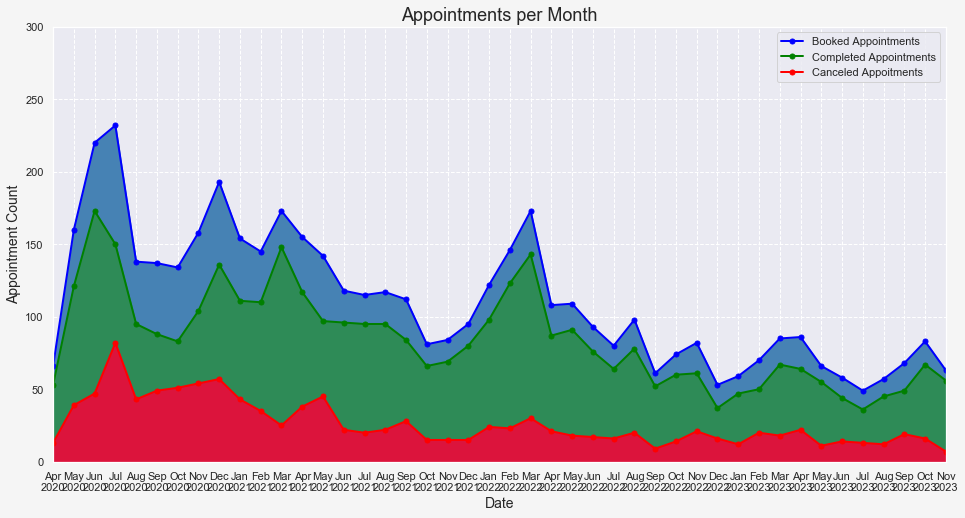

In [90]:
# Combined appointments over time: monthly
xlabels = get_ts_xlabels(index=apt_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')

ax.plot(apt_ts_data.values, linewidth=2, marker='.', markersize=10, color='blue')
ax.plot(apt_completed_ts_data.values, linewidth=2, marker='.', markersize=10, color='green')
ax.plot(apt_canceled_ts_data.values, linewidth=2, marker='.', markersize=10, color='red')

ax.set_title('Appointments per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_ts_data)-2)
ax.set_ylim(0,APT_MONTHLY_YMAX)

ax.fill_between(np.arange(len(apt_ts_data)), 0, apt_ts_data['appointment_id'], color='steelblue')
ax.fill_between(np.arange(len(apt_completed_ts_data)), 0, apt_completed_ts_data['appointment_id'], color='seagreen')
ax.fill_between(np.arange(len(apt_canceled_ts_data)), 0, apt_canceled_ts_data['appointment_id'], color='crimson')

ax.legend(['Booked Appointments', 'Completed Appointments', 'Canceled Appoitments'])

In [91]:
# Save figure
name = FIGURE_PATH + 'appointment_monthly_combined_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

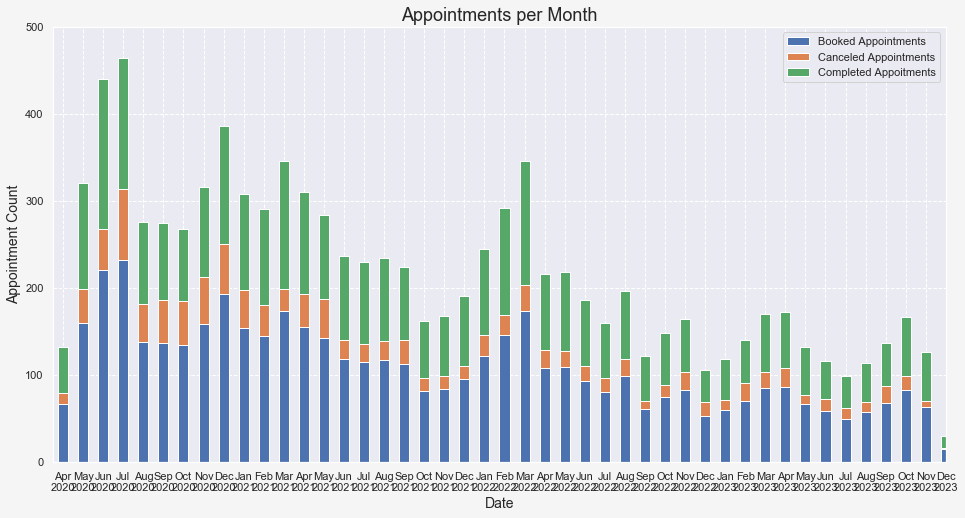

In [92]:
# Combined appointments over time: monthly
apt_combined_ts_data = pd.concat([apt_ts_data,apt_canceled_ts_data,apt_completed_ts_data], axis=1)
xlabels = get_ts_xlabels(index=apt_combined_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
apt_combined_ts_data.plot(ax=ax, kind='bar', stacked=True)

ax.set_title('Appointments per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(-0.5,len(apt_ts_data)-1)
ax.set_ylim(0,500)

ax.legend(['Booked Appointments', 'Canceled Appointments', 'Completed Appoitments'])

In [93]:
# Save figure
name = FIGURE_PATH + 'appointment_monthly_stacked_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

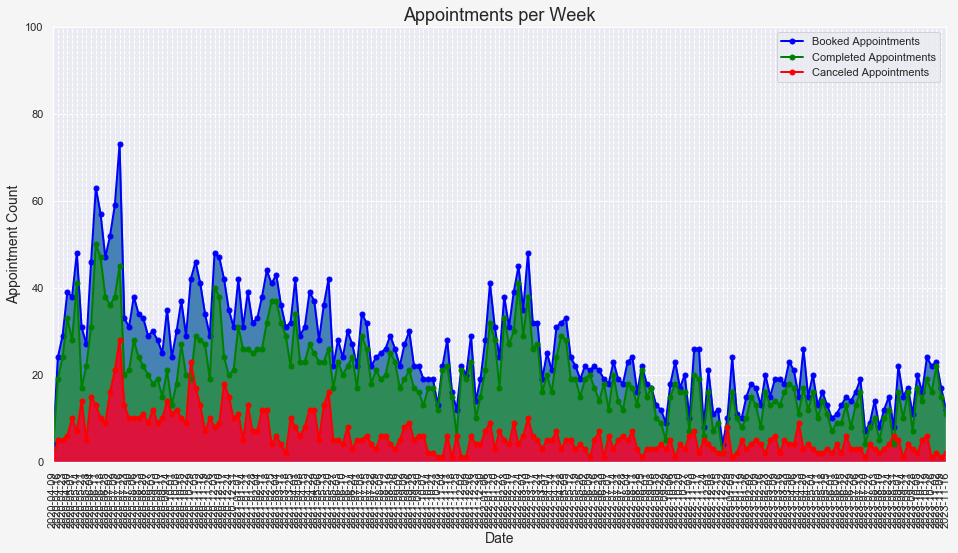

In [94]:
# Combined appointments over time: weekly
xlabels = get_ts_xlabels(index=apt_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')

ax.plot(apt_weekly_ts_data.values, linewidth=2, marker='.', markersize=10, color='blue')
ax.plot(apt_weekly_completed_ts_data.values, linewidth=2, marker='.', markersize=10, color='green')
ax.plot(apt_weekly_canceled_ts_data.values, linewidth=2, marker='.', markersize=10, color='red')

ax.set_title('Appointments per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_weekly_ts_data)-4)
ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.fill_between(np.arange(len(apt_weekly_ts_data)), 0, apt_weekly_ts_data['appointment_id'], color='steelblue')
ax.fill_between(np.arange(len(apt_weekly_completed_ts_data)), 0, apt_weekly_completed_ts_data['appointment_id'], color='seagreen')
ax.fill_between(np.arange(len(apt_weekly_canceled_ts_data)), 0, apt_weekly_canceled_ts_data['appointment_id'], color='crimson')

ax.legend(['Booked Appointments', 'Completed Appointments', 'Canceled Appointments'])

In [95]:
# Save figure
name = FIGURE_PATH + 'appointment_weekly_combined_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

#### Booked Appointments by Provider Role

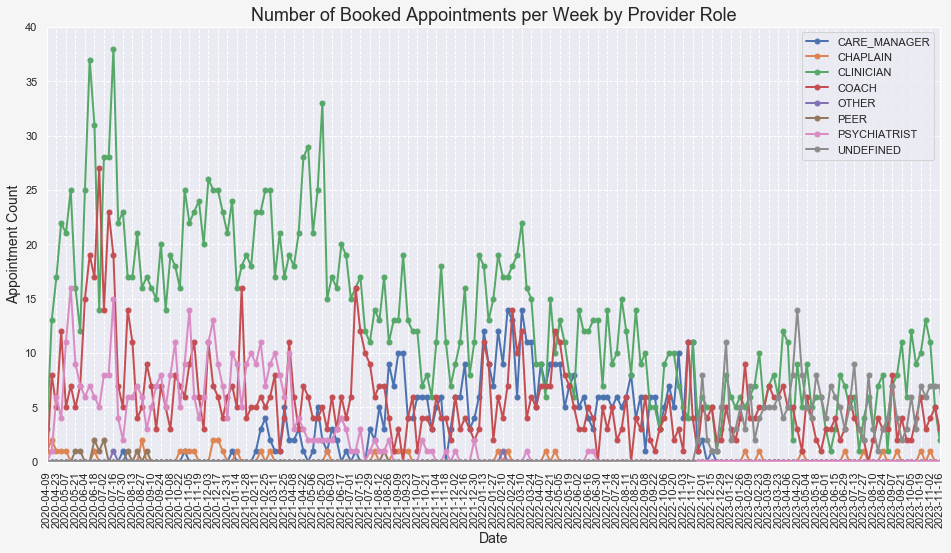

In [96]:
# Plot
xlabels = get_ts_xlabels(index=aptRole_weekly_ts_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(aptRole_weekly_ts_data.values, linewidth=2, marker='.', markersize=10)
ax.set_title('Number of Booked Appointments per Week by Provider Role', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(aptRole_weekly_ts_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(aptRole_weekly_ts_data)-4)
ax.set_ylim(0,40)

ax.legend(aptRole_weekly_ts_data.columns)

In [97]:
save_figure(fig,FIGURE_PATH,'appointment_provRole_weekly_line_')

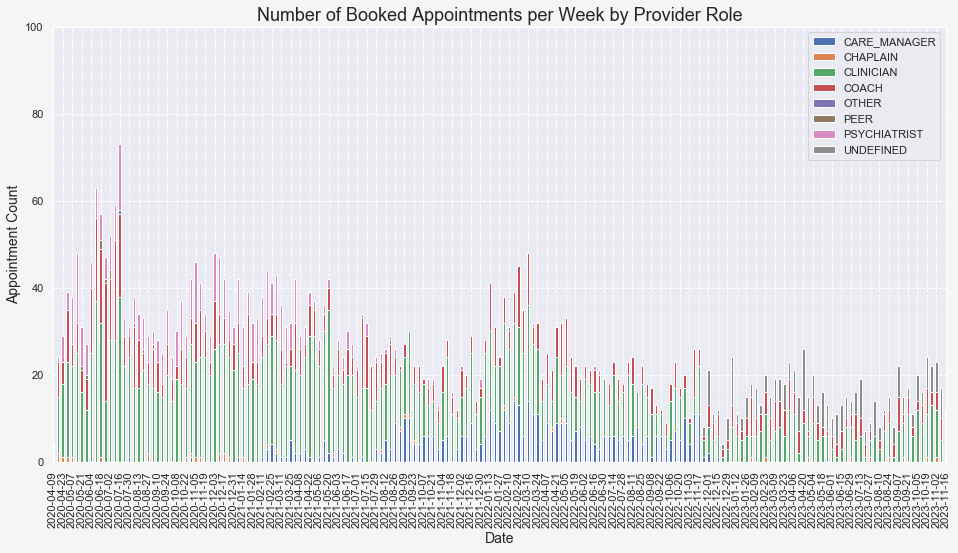

In [98]:
# Plot
xlabels = get_ts_xlabels(index=aptRole_weekly_ts_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
aptRole_weekly_ts_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of Booked Appointments per Week by Provider Role', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(aptRole_weekly_ts_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(aptRole_weekly_ts_data)-4)
ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.legend(aptRole_weekly_ts_data.columns)

In [99]:
save_figure(fig,FIGURE_PATH,'appointment_provRole_weekly_stacked_')

#### Booked Appointments by Provider Role - Cobalt RCT

In [100]:
# Filter for rct start date - will need to add end date upon completion 
appointment_rct = appointment[appointment['start_time'] >= pd.to_datetime(datetime.datetime(2022,1,31)).tz_localize(tz='US/Eastern')]

# Aggregate for weekly ts
aptRole_weekly_ts_rct = pd.DataFrame(appointment_rct.groupby(['apt_year_month_week', 'support_role_id']).count()).appointment_id
aptRole_weekly_ts_rct = aptRole_weekly_ts_rct.unstack().fillna(0)
aptRole_weekly_ts_rct.index = pd.MultiIndex.from_arrays([aptRole_weekly_ts_rct.index.year, 
                                                      aptRole_weekly_ts_rct.index.month, 
                                                      aptRole_weekly_ts_rct.index.day], 
                                                      names=['Year','Month','Week'])

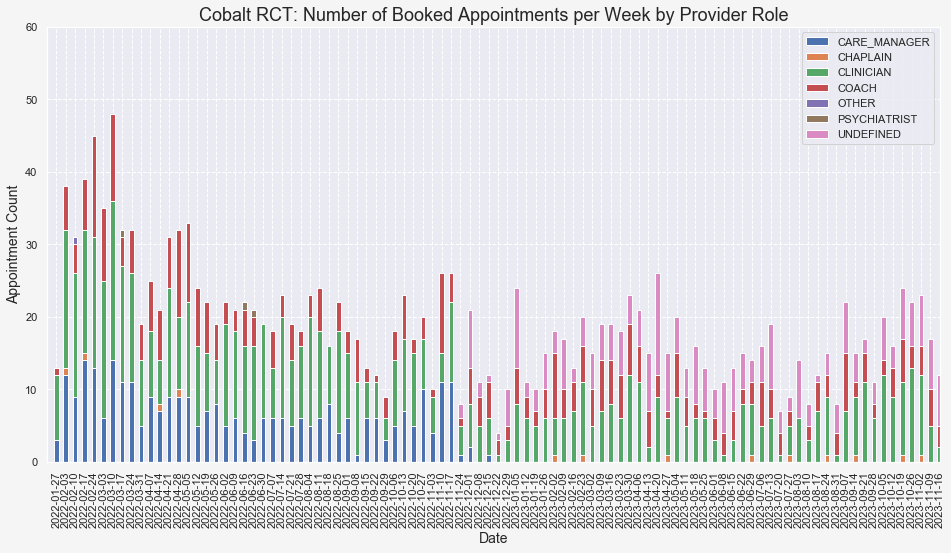

In [101]:
# Plot
xlabels = get_ts_xlabels(index=aptRole_weekly_ts_rct.index, time='weekly')
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
aptRole_weekly_ts_rct.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Cobalt RCT: Number of Booked Appointments per Week by Provider Role', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(aptRole_weekly_ts_rct)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(-1,len(aptRole_weekly_ts_rct)-4)
ax.set_ylim(0,APT_WEEKLY_YMAX-40)

ax.legend(aptRole_weekly_ts_rct.columns)

In [102]:
save_figure(fig,FIGURE_PATH,'rctAppt_provRole_weekly_stacked_')

#### Booked Appointments by Provider Role - Summary Table

In [103]:
# Can create this chart for last 30 days or weekly (will be messy as weekly but possible); also save to charts folder
apt_role_summary = pd.concat([aptRole_weekly_ts_data.sum(),aptRole_weekly_ts_data.mean(),
                              aptRole_weekly_ts_data.median(),aptRole_weekly_ts_data.std()], axis=1)
apt_role_summary.columns = ['apt_total','apt_mean_week','apt_median_week', 'apt_stddev_week']
apt_role_summary.to_csv(CHART_PATH + 'aptRole_weekly_summary_allTime_' + str(datetime.datetime.now().date()).replace('-','') + '.csv')

apt_role_summary

apt_total  apt_mean_week  apt_median_week  apt_stddev_week
support_role_id                                                            
CARE_MANAGER         505.0         2.6302              0.0           3.5864
CHAPLAIN              41.0         0.2135              0.0           0.4590
CLINICIAN           2540.0        13.2292             12.0           7.5091
COACH               1073.0         5.5885              5.0           4.0665
OTHER                  2.0         0.0104              0.0           0.1018
PEER                  11.0         0.0573              0.0           0.2743
PSYCHIATRIST         443.0         2.3073              0.0           3.6502
UNDEFINED            272.0         1.4167              0.0           2.6256

### Appointment Histograms

#### Appointments per Account

In [104]:
# Histogram data
data = appointment.groupby(['account_id']).count()['appointment_id'].value_counts().sort_index()
apt_by_acct = pd.DataFrame(list(zip(data.index.values, data.values)), columns=['num_apts', 'num_accts'])
apt_by_acct.head()

num_apts  num_accts
0         1       2555
1         2        401
2         3        129
3         4         63
4         5         32

In [105]:
# Save chart
name = CHART_PATH + 'appointment_account_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
apt_by_acct.to_csv(name)

Text(0, 0.5, 'User Count')

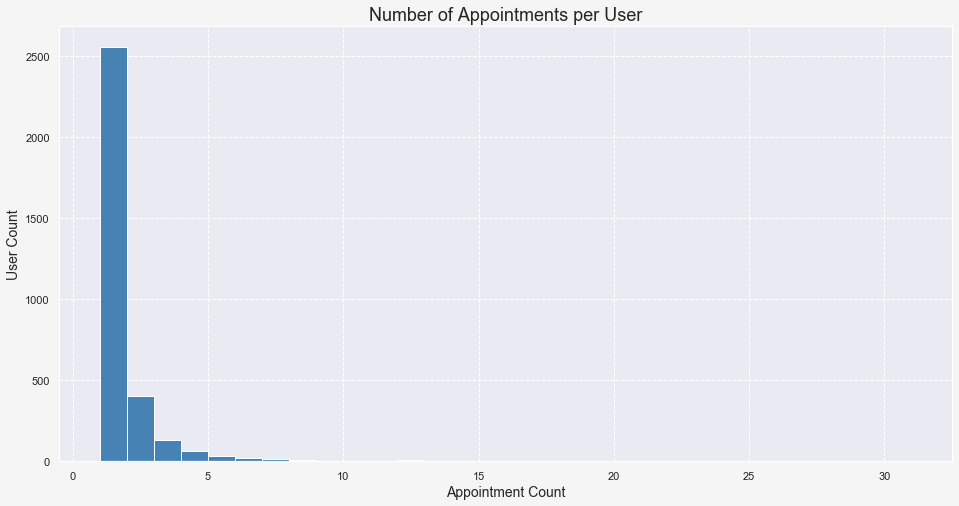

In [106]:
# Plot histogram
data = appointment.groupby(['account_id']).count()['appointment_id']
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.hist(data, bins=30, color='steelblue')
ax.set_title('Number of Appointments per User', fontsize=18)
ax.set_xlabel('Appointment Count', fontsize=14)
ax.set_ylabel('User Count', fontsize=14)

In [107]:
# Save figure
name = FIGURE_PATH + 'appointment_account_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

#### Followup Appointments per Account

In [108]:
# Histogram data
apt_followup = appointment.groupby(['account_id']).filter(lambda x: len(x)>1)
apt_followup = apt_followup.groupby(['account_id']).count()['appointment_id']
apt_followup = pd.concat([apt_followup.value_counts(0), apt_followup.value_counts(1)], axis=1)
apt_followup.columns = ['user_count', 'user_pct']

apt_followup_blank = pd.DataFrame(index=np.arange(0, max(apt_followup.index)+1))
apt_followup = apt_followup_blank.merge(apt_followup, how='outer', left_index=True, right_index=True).fillna(0)
apt_followup.head()

user_count  user_pct
0         0.0    0.0000
1         0.0    0.0000
2       401.0    0.5729
3       129.0    0.1843
4        63.0    0.0900

In [109]:
# Save chart
name = CHART_PATH + 'appointment_account_followup_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
apt_by_acct.to_csv(name)

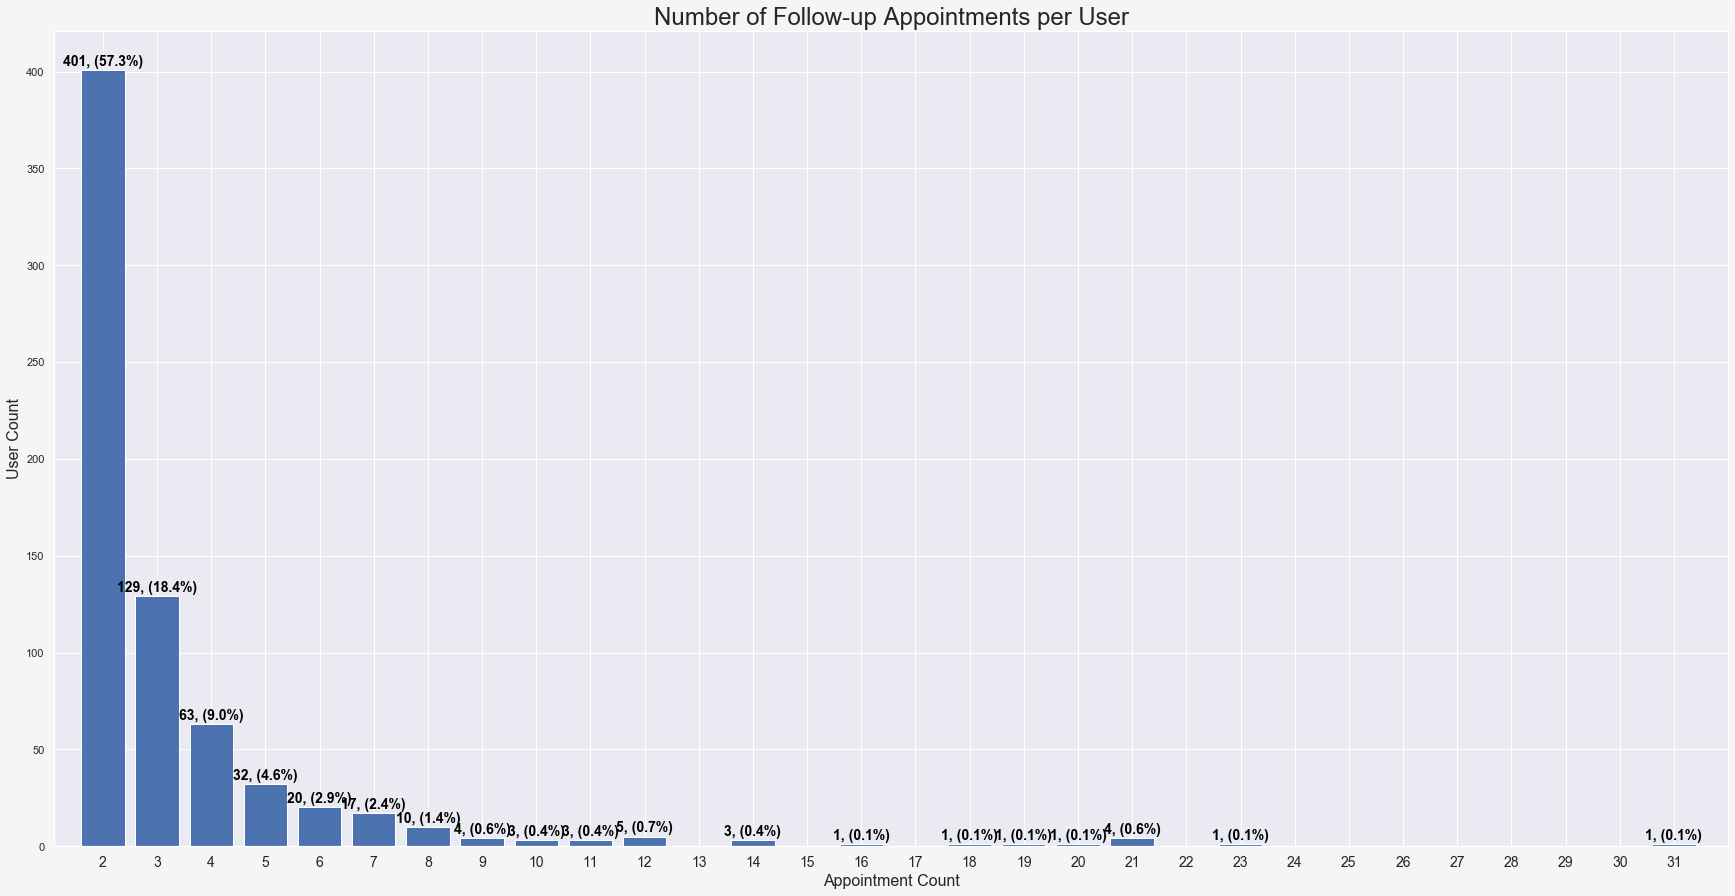

In [110]:
# Plot bar chart (histogram)
bar_width = 0.4
text_height = 8
xlabels = apt_followup.index
index = np.arange(len(apt_followup))
bar_data = apt_followup.user_count
percent_data = apt_followup.user_pct


fig, ax = plt.subplots(figsize=(30,15), facecolor='whitesmoke')
ax.bar(x=index, height=bar_data)
ax.set_title('Number of Follow-up Appointments per User', fontsize=24)
ax.set_xlabel('Appointment Count', fontsize=16)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, fontsize=14, ha='center')
ax.set_xlim(1.1,len(apt_followup))
ax.set_ylabel('User Count', fontsize=16)
#ax.set_yticklabels(np.arange(0,300,50) ,fontsize=14, ha='right')

for bar in ax.patches:
    text = str(int(bar.get_height())) + ', (' + str("{:.1f}".format(float((bar.get_height()/bar_data.sum())*100))) + '%)'
    height = bar.get_height()+text_height
    if height > text_height:
        ax.text(bar.get_x()+bar.get_width()/2, height, text, rotation=0, va='top', ha='center', color='black', fontsize=14, fontweight='bold')

In [111]:
# NOTE 12/06/2021: Recreate broken down by provider role

In [112]:
# Save figure
name = FIGURE_PATH + 'appointment_account_followup_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

#### Appointments per Provider

In [113]:
# Histogram data
data = appointment.groupby(['provider_id']).count()['appointment_id'].value_counts().sort_index()
apt_by_prov = pd.DataFrame(list(zip(data.index.values, data.values)), columns=['num_apts', 'num_providers'])
apt_by_prov.head()

num_apts  num_providers
0         1             21
1         2             10
2         3             12
3         4              9
4         5              6

In [114]:
# Save chart
name = CHART_PATH + 'appointment_provider_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
apt_by_prov.to_csv(name)

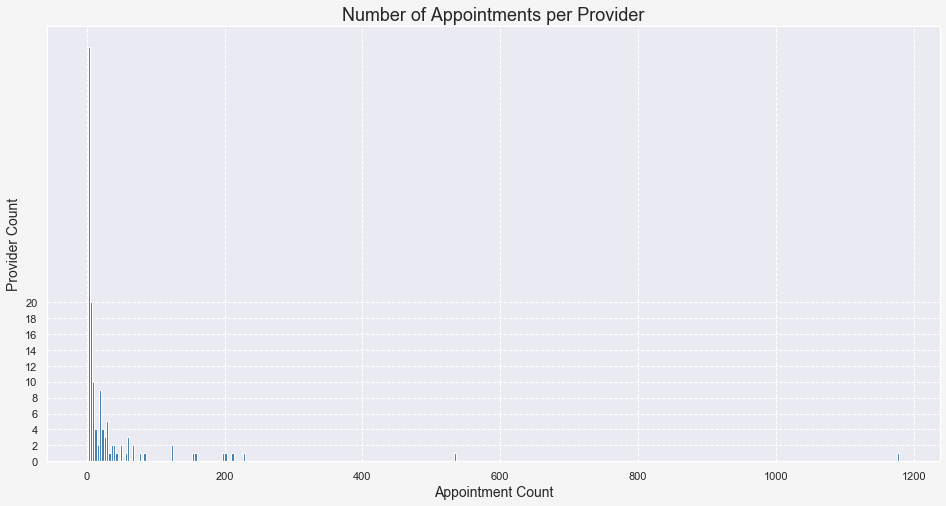

In [115]:
data = appointment.groupby(['provider_id']).count()['appointment_id']
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.hist(data, bins=350, color='steelblue')
ax.set_title('Number of Appointments per Provider', fontsize=18)
ax.set_xlabel('Appointment Count', fontsize=14)
ax.set_ylabel('Provider Count', fontsize=14)
ax.set_yticks(np.arange(0,22,2))

In [116]:
# Save figure
name = FIGURE_PATH + 'appointment_provider_hist_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Active providers by appointment
* Active providers are those with >= 25 appointments for all time
* Can consider a metric for recent active providers

In [117]:
prov_active_ids = appointment.groupby(['provider_id']).filter(lambda x: len(x)>=25)['provider_id'].unique()
prov_active_data = provider[provider['provider_id'].isin(prov_active_ids)]

In [118]:
# Save chart
name = CHART_PATH + 'provider_active_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
prov_active_data.to_csv(name)

In [ ]:
print('Number of active providers:', len(prov_active_data))
prov_active_data.head(2)

## Availability: Appointments and Providers

In [120]:
print('Number of completed appointments:',len(appointment[appointment['canceled']==False]))
print('Number of available appointments:',len(provider_availability))

Number of completed appointments: 3735
Number of available appointments: 1806


In [121]:
# Display data
print(len(provider_availability))
print(len(provider_availability.columns))
provider_availability.head(2)

1806
22


provider_availability_id                           provider_id  \
0  886ecd56-4527-4fc7-ae27-91d2b5875d6b  00e1f7e0-cb78-420c-aac8-9c841081c542   
1  3d8209cd-7c3e-4a68-85d4-43daecc63ffb  00e1f7e0-cb78-420c-aac8-9c841081c542   

                  date_time                          created  \
0 2020-10-08 08:00:00-04:00 2021-10-04 15:28:37.192211-04:00   
1 2020-10-15 08:00:00-04:00 2021-10-04 15:28:37.787609-04:00   

                      last_updated                   appointment_type_id  \
0 2021-10-04 19:28:37.192211+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   
1 2021-10-04 19:28:37.787609+00:00  bc57f5ef-12ec-4298-9438-01791b0b3f00   

                     epic_department_id logical_availability_id  created_year  \
0  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   
1  ee4cd97a-e2c4-493f-99ad-ba4c1031a90c                    None          2021   

   created_month  created_day created_year_month created_year_month_week  \
0             10            4         2021-10-01              2021-09-30   
1             10            4         2021-10-01              2021-09-30   

  created_dayofyear  apt_year  apt_month  apt_day apt_year_month  \
0          20211004      2020         10        8     2020-10-01   
1          20211004      2020         10       15     2020-10-01   

  apt_year_month_week apt_dayofyear appointment_type_name support_role_id  
0          2020-10-08      20201008         Initial Visit       CLINICIAN  
1          2020-10-15      20201015         Initial Visit       CLINICIAN

### Availability Temporal Trends

#### Available vs Completed Appointments - Supply vs "Demand"

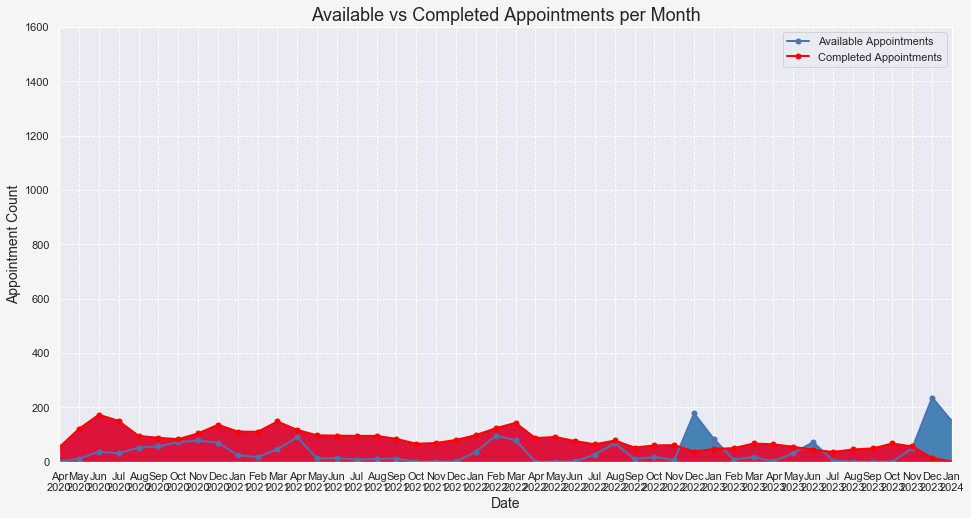

In [122]:
# Appointment supply and demand over time: monthly
apt_supply_demand = apt_avail_ts_data.merge(apt_completed_ts_data, how='outer', left_index=True, right_index=True)
apt_supply_demand = apt_supply_demand.fillna(0)
apt_supply_demand.columns = ['Available Appointments', 'Completed Appointments']

xlabels = get_ts_xlabels(index=apt_supply_demand.index, time='monthly')

# Plot data
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(apt_supply_demand['Available Appointments'].values, linewidth=2, marker='.', markersize=10)
ax.plot(apt_supply_demand['Completed Appointments'].values, linewidth=2, marker='.', markersize=10, color='red')
ax.set_title('Available vs Completed Appointments per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_supply_demand)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_supply_demand)-1)
ax.set_ylim(0,1600)
ax.legend(['Available Appointments', 'Completed Appointments'])

# Fill between: between lines, between x-axis and lines
ax.fill_between(np.arange(len(apt_supply_demand)), 0, apt_supply_demand['Available Appointments'],
                interpolate=True, color='steelblue')
ax.fill_between(np.arange(len(apt_supply_demand)), 0, apt_supply_demand['Completed Appointments'],
                interpolate=True, color='crimson')

In [123]:
# Save figure
name = FIGURE_PATH + 'availability_appointment_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

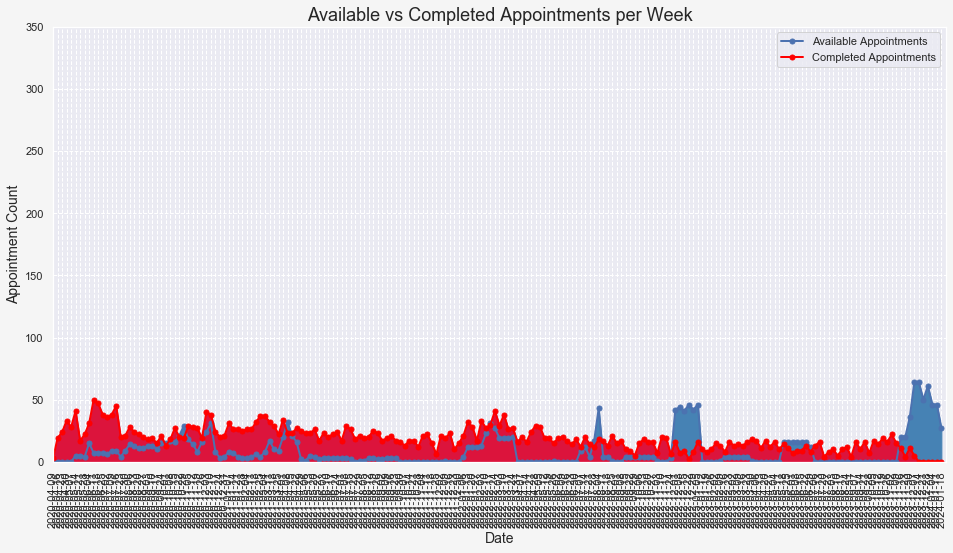

In [124]:
# Appointment supply and demand over time: weekly
apt_weekly_supply_demand = apt_avail_weekly_ts_data.merge(apt_weekly_completed_ts_data, how='outer', left_index=True, right_index=True)
apt_weekly_supply_demand = apt_weekly_supply_demand.fillna(0)
apt_weekly_supply_demand.columns = ['Available Appointments', 'Completed Appointments']

xlabels = get_ts_xlabels(index=apt_weekly_supply_demand.index, time='weekly')

# Plot data
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(apt_weekly_supply_demand['Available Appointments'].values, linewidth=2, marker='.', markersize=10)
ax.plot(apt_weekly_supply_demand['Completed Appointments'].values, linewidth=2, marker='.', markersize=10, color='red')
ax.set_title('Available vs Completed Appointments per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(apt_weekly_supply_demand)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
ax.set_xlim(0,len(apt_weekly_supply_demand)-0)
ax.set_ylim(0,350)
ax.legend(['Available Appointments', 'Completed Appointments'])

# Fill between: between lines, between x-axis and lines (WILL NEED TO SWITCH WHEN HISTORIC AVAILABILITY DATA IS READY)
ax.fill_between(np.arange(len(apt_weekly_supply_demand)), 0, apt_weekly_supply_demand['Available Appointments'],
                interpolate=True, color='steelblue')
ax.fill_between(np.arange(len(apt_weekly_supply_demand)), 0, apt_weekly_supply_demand['Completed Appointments'],
                interpolate=True, color='crimson')

In [125]:
# Save figure
name = FIGURE_PATH + 'availability_appointment_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.png'
fig.savefig(name, bbox_inches='tight', pad_inches=0, dpi=SAVE_DPI, transparent=True)

### Availability by Day of Week and Hour of Day
* Remake for last 3,6,9 months

#### Booked Appointments

In [126]:
appointment_times = appointment[['appointment_id', 'provider_id', 'start_time', 'created', 'support_role_id']].copy()
appointment_times['dayofweek'] = appointment_times['start_time'].dt.dayofweek
appointment_times['hourofday'] = appointment_times['start_time'].dt.hour

In [127]:
print(len(appointment_times))
print(len(appointment_times.columns))
appointment_times.head(2)

4887
7


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                 start_time                          created support_role_id  \
0 2022-07-06 16:00:00-04:00 2022-06-22 16:25:35.721374-04:00       CLINICIAN   
0 2022-04-22 11:00:00-04:00 2022-04-20 11:32:48.204541-04:00    CARE_MANAGER   

   dayofweek  hourofday  
0          2         16  
0          4         11

##### Day of Week

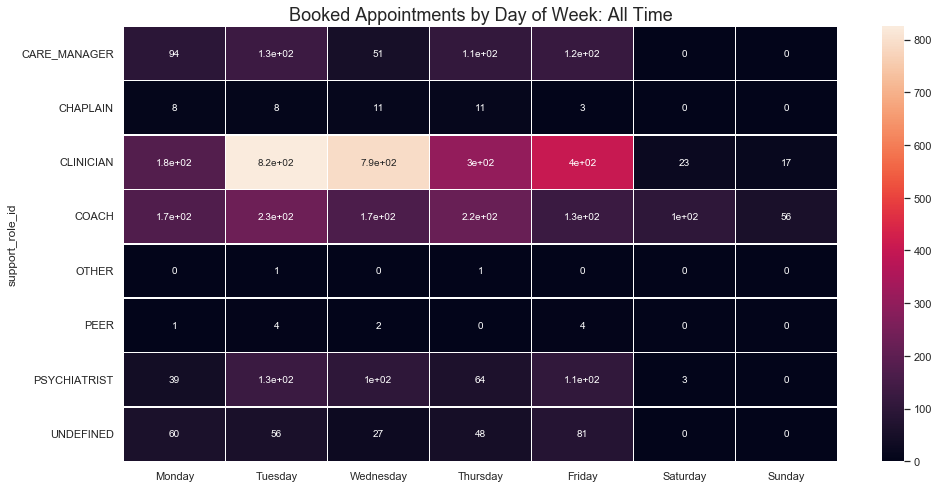

In [128]:
# Booked appointments by day of week
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='dayofweek', date_col='start_time', 
                        id_col='appointment_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

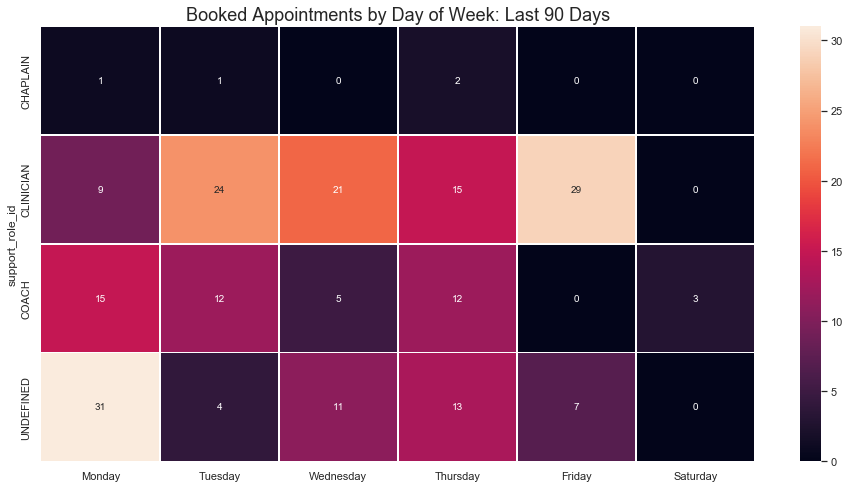

In [129]:
# Booked appointments by day of week
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='dayofweek', date_col='start_time', 
                        id_col='appointment_id', date_offset=-90, save_fig=True, save_path=FIGURE_PATH)

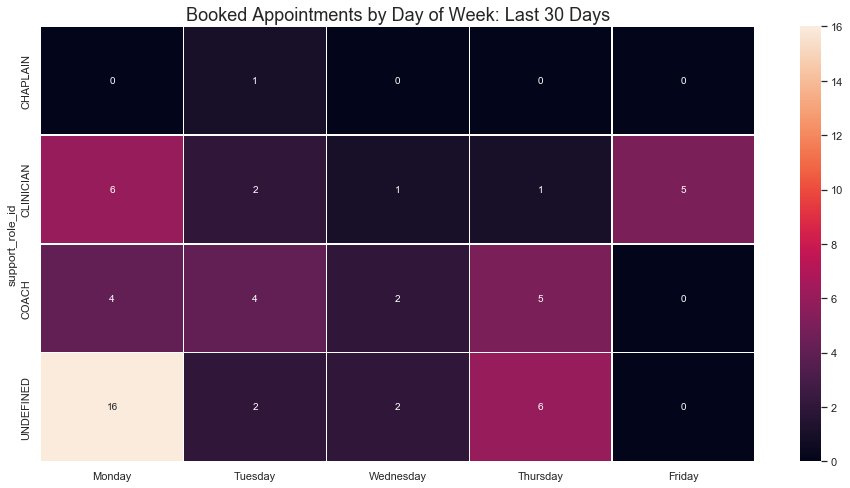

In [130]:
# Booked appointments by day of week
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='dayofweek', date_col='start_time', 
                        id_col='appointment_id', date_offset=-30, save_fig=True, save_path=FIGURE_PATH)

##### Hour of Day

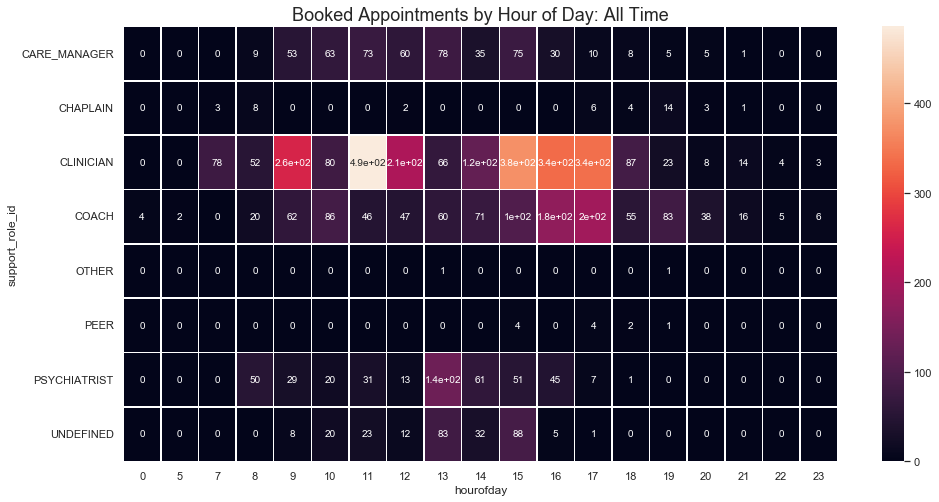

In [131]:
# Booked appointments by hour of day
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='hourofday', date_col='start_time', 
                        id_col='appointment_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

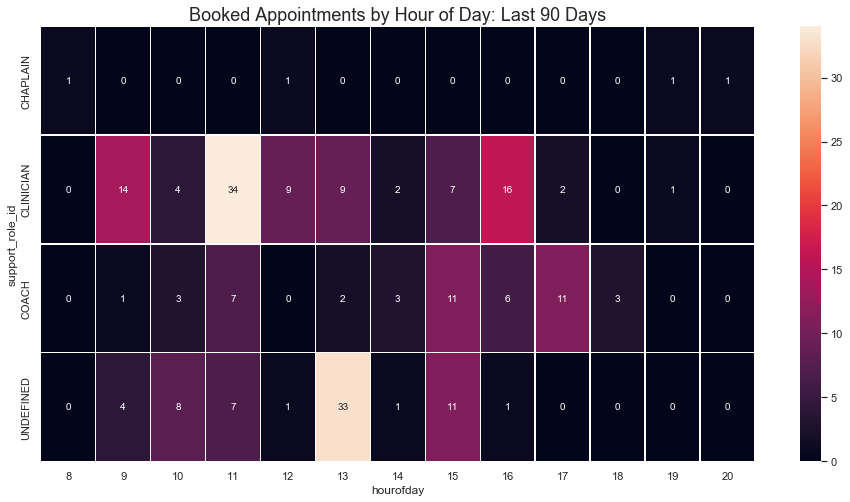

In [132]:
# Booked appointments by hour of day
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='hourofday', date_col='start_time', 
                        id_col='appointment_id', date_offset=-90, save_fig=True, save_path=FIGURE_PATH)

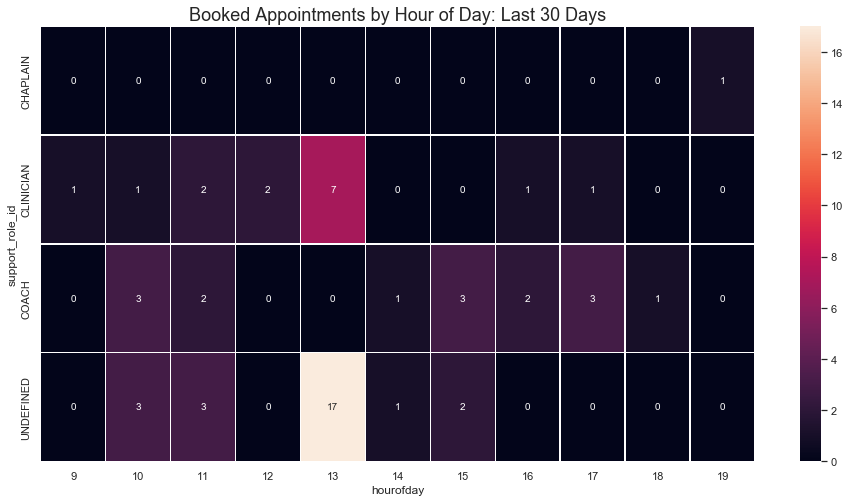

In [133]:
# Booked appointments by hour of day
get_appointment_heatmap(appointment_times, apt_type='booked', grouping='hourofday', date_col='start_time', 
                        id_col='appointment_id', date_offset=-30, save_fig=True, save_path=FIGURE_PATH)

#### Available Appointments

In [134]:
available_times = provider_availability[['provider_availability_id','provider_id','date_time','created','support_role_id']].copy()
available_times['dayofweek'] = available_times['date_time'].dt.dayofweek
available_times['hourofday'] = available_times['date_time'].dt.hour

In [135]:
print(len(available_times))
print(len(available_times.columns))
available_times.head(2)

1806
7


provider_availability_id                           provider_id  \
0  886ecd56-4527-4fc7-ae27-91d2b5875d6b  00e1f7e0-cb78-420c-aac8-9c841081c542   
1  3d8209cd-7c3e-4a68-85d4-43daecc63ffb  00e1f7e0-cb78-420c-aac8-9c841081c542   

                  date_time                          created support_role_id  \
0 2020-10-08 08:00:00-04:00 2021-10-04 15:28:37.192211-04:00       CLINICIAN   
1 2020-10-15 08:00:00-04:00 2021-10-04 15:28:37.787609-04:00       CLINICIAN   

   dayofweek  hourofday  
0          3          8  
1          3          8

##### Day of Week

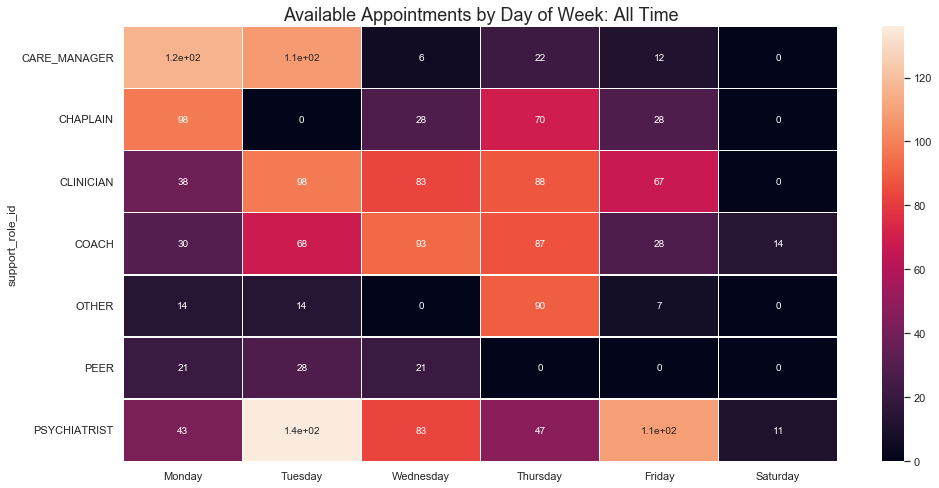

In [136]:
# Booked appointments by day of week
get_appointment_heatmap(available_times, apt_type='available', grouping='dayofweek', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

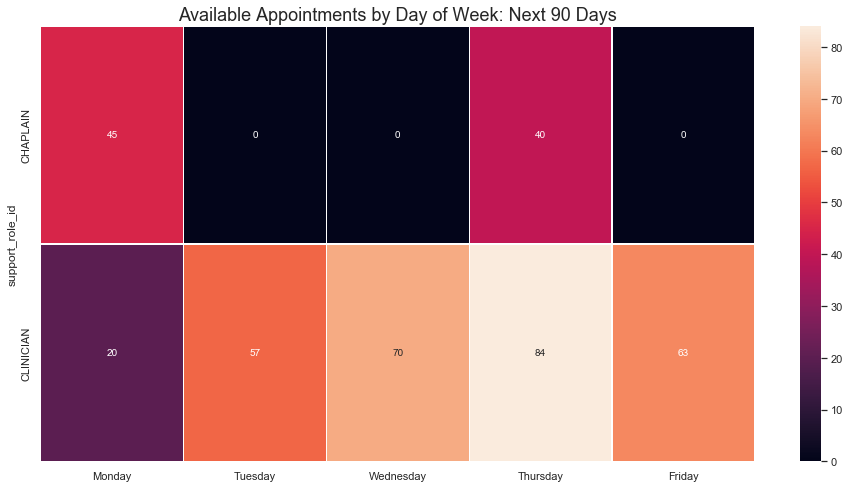

In [137]:
# Booked appointments by day of week
get_appointment_heatmap(available_times, apt_type='available', grouping='dayofweek', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=90, save_fig=True, save_path=FIGURE_PATH)

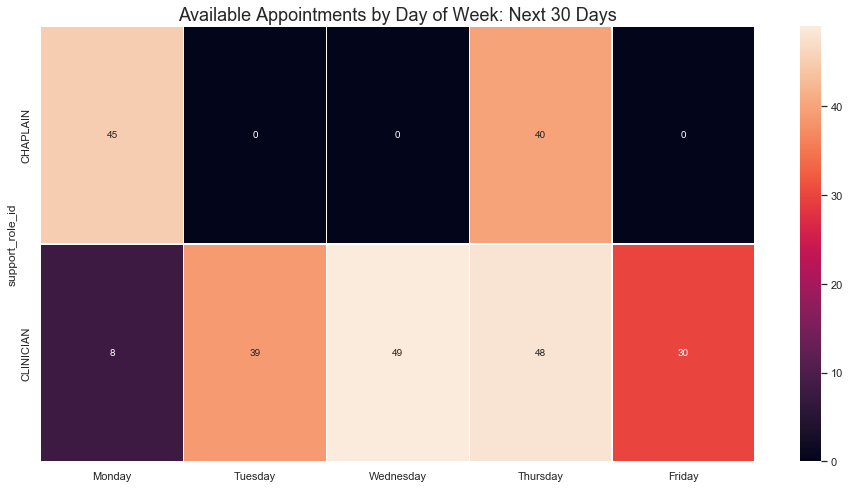

In [138]:
# Booked appointments by day of week
get_appointment_heatmap(available_times, apt_type='available', grouping='dayofweek', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=30, save_fig=True, save_path=FIGURE_PATH)

##### Hour of Day

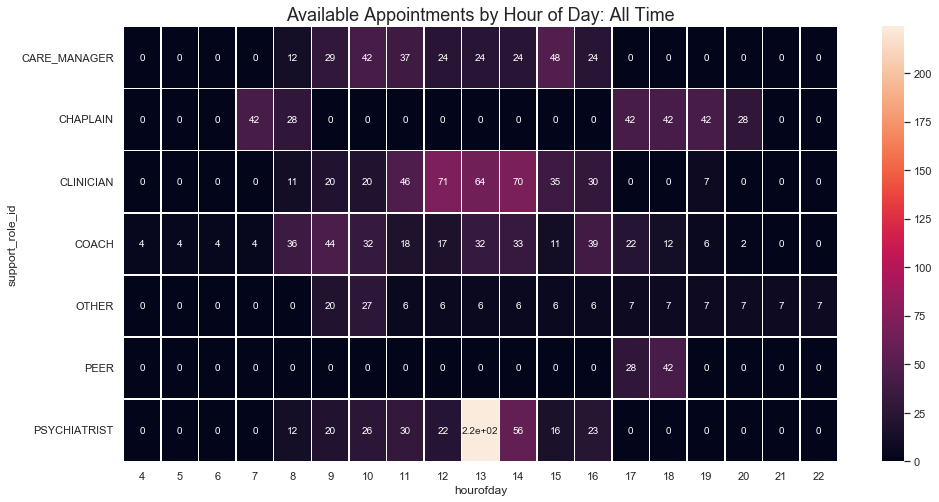

In [139]:
# Booked appointments by hour of day
get_appointment_heatmap(available_times, apt_type='available', grouping='hourofday', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=0, save_fig=True, save_path=FIGURE_PATH)

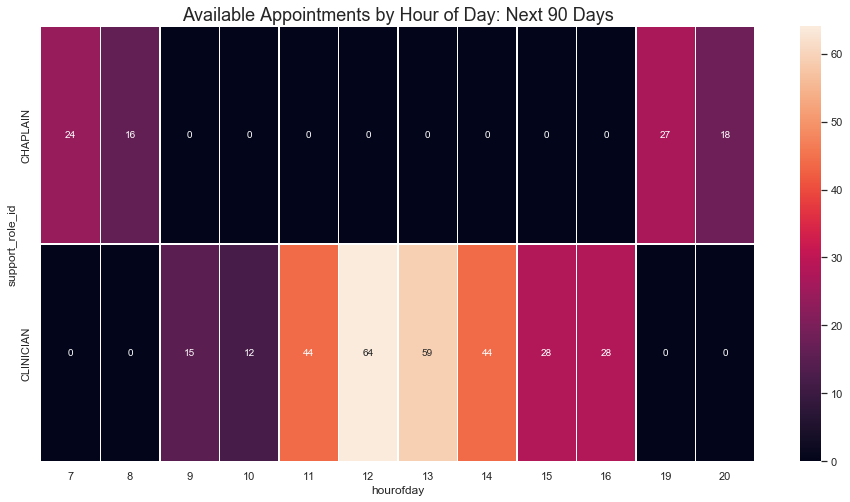

In [140]:
# Booked appointments by hour of day
get_appointment_heatmap(available_times, apt_type='available', grouping='hourofday', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=90, save_fig=True, save_path=FIGURE_PATH)

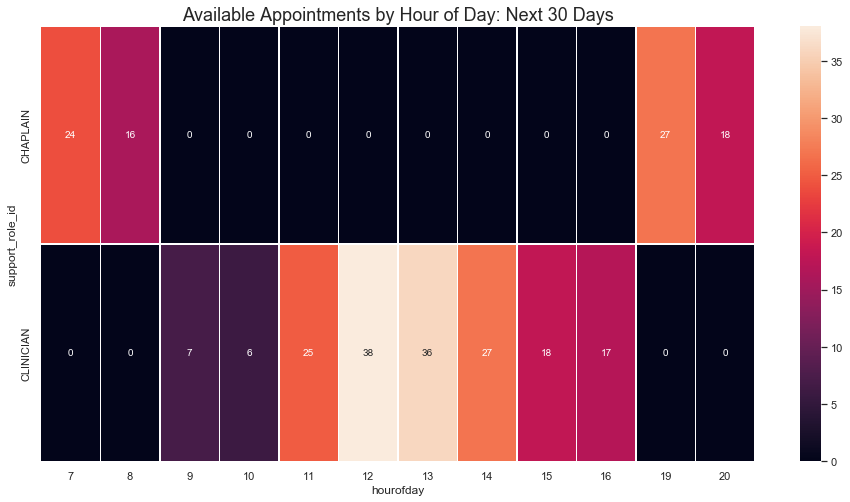

In [141]:
# Booked appointments by hour of day
get_appointment_heatmap(available_times, apt_type='available', grouping='hourofday', date_col='date_time', 
                        id_col='provider_availability_id', date_offset=30, save_fig=True, save_path=FIGURE_PATH)

## Assessments

In [142]:
assessment.assessment_type_id.unique()

array(['GAD7', 'PHQ9', 'INTRO', 'PHQ4', 'PCPTSD', 'INTAKE'], dtype=object)

### PHQ4

#### Score Distribution

In [143]:
PHQ4_data.head()

0    149
1    165
2    260
3    260
4    419
Name: PHQ4_score, dtype: int64

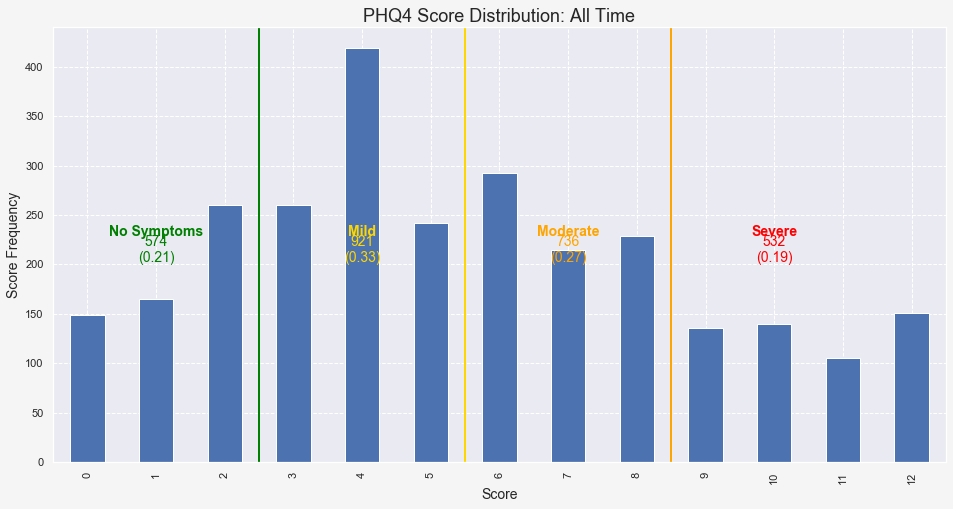

In [144]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
PHQ4_data.plot(ax=ax, kind='bar')
ax.set_title('PHQ4 Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(2.5, linewidth=2, color='green')
ax.axvline(5.5, linewidth=2, color='gold')
ax.axvline(8.5, linewidth=2, color='orange')

ax.text(1, 240, 'No Symptoms', va='top', ha='center', color='green', fontsize=14, fontweight='bold')
ax.text(4, 240, 'Mild', va='top', ha='center', color='gold', fontsize=14, fontweight='bold')
ax.text(7, 240, 'Moderate', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(10, 240, 'Severe', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(1, 230, str(PHQ4_data.loc[0:2].sum()) + '\n(' + str(round(PHQ4_data.loc[0:2].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='green', fontsize=14)
ax.text(4, 230, str(PHQ4_data.loc[3:5].sum()) + '\n(' + str(round(PHQ4_data.loc[3:5].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='gold', fontsize=14)
ax.text(7, 230, str(PHQ4_data.loc[6:8].sum()) + '\n(' + str(round(PHQ4_data.loc[6:8].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(10, 230, str(PHQ4_data.loc[9:].sum()) + '\n(' + str(round(PHQ4_data.loc[9:].sum()/PHQ4_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)

save_figure(fig, FIGURE_PATH, 'PHQ4_hist_allTime_')

#### Time Series

In [145]:
print(len(PHQ4_ts_data))
PHQ4_ts_data.head()

29


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
year month                                                         
2020 4                   155           5.3742                5.0   
     5                   130           5.7615                5.0   
     6                   155           5.8452                5.0   
     7                   146           6.4658                6.0   
     8                   138           5.4710                5.0   

            PHQ4_crisis_count  
year month                     
2020 4                     23  
     5                     12  
     6                     20  
     7                     26  
     8                     18

In [146]:
print(len(PHQ4_weekly_ts_data))
PHQ4_weekly_ts_data.head()

121


PHQ4_score_count  PHQ4_score_mean  PHQ4_score_median  \
Year Month Week                                                         
2020 4     9                   72           5.4444                5.5   
           16                  49           5.2857                5.0   
           23                  32           5.4062                6.0   
           30                  32           5.0312                4.0   
     5     7                   37           6.2703                6.0   

                 PHQ4_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6  
           23                    1  
           30                    2  
     5     7                     6

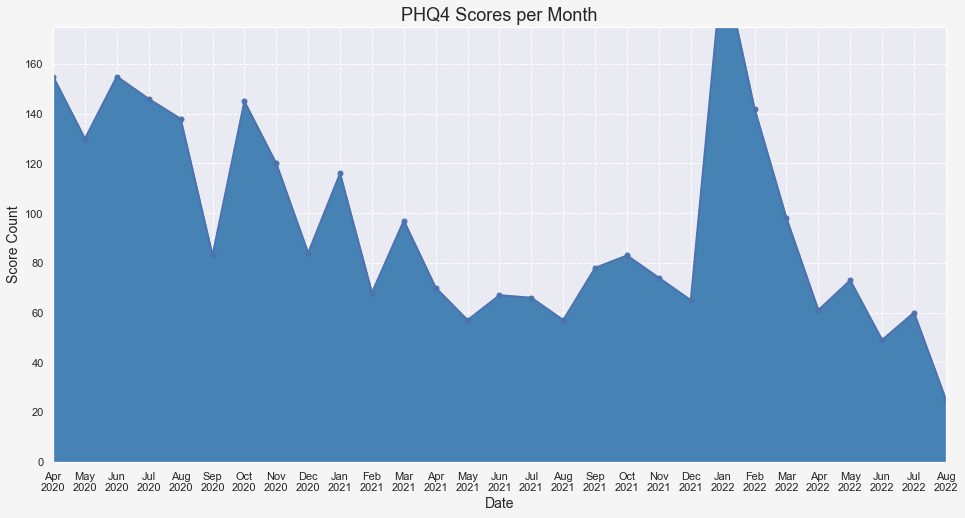

In [147]:
# PHQ4 scores by month
xlabels = get_ts_xlabels(index=PHQ4_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ4_ts_data['PHQ4_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ4 Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ4_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ4_ts_data)-1)
ax.set_ylim(0,175)
ax.fill_between(np.arange(len(PHQ4_ts_data)), 0, PHQ4_ts_data['PHQ4_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ4_monthly_')

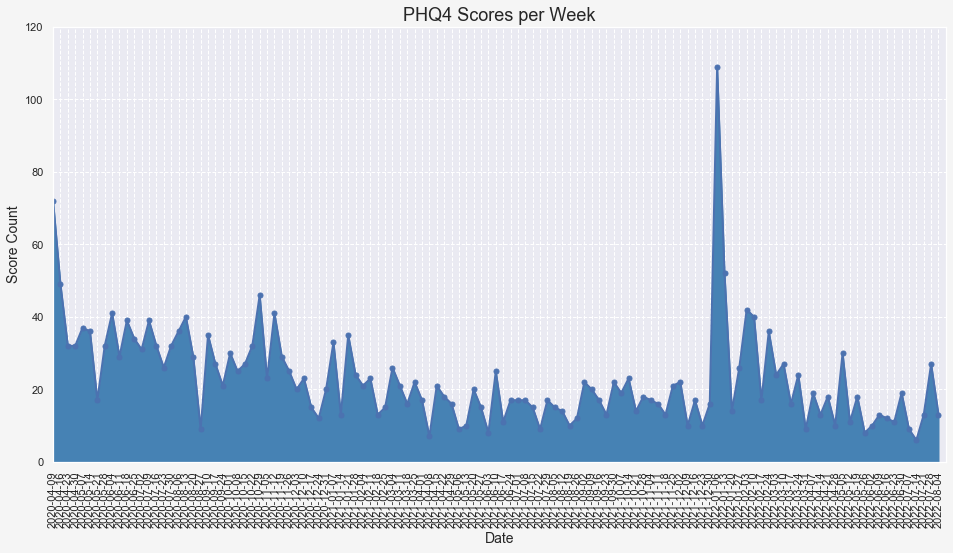

In [148]:
# PHQ4 scores by week
xlabels = get_ts_xlabels(index=PHQ4_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ4_weekly_ts_data['PHQ4_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ4 Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ4_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ4_weekly_ts_data)-0)
ax.set_ylim(0,120)
ax.fill_between(np.arange(len(PHQ4_weekly_ts_data)), 0, PHQ4_weekly_ts_data['PHQ4_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ4_weekly_')

### PHQ9

In [149]:
# Crisis question
PHQ9_crisis_response

several days               257
more than half the days     47
nearly every day            44
Name: answer_text, dtype: int64

#### Score Distribution

In [150]:
PHQ9_data.head()

0      8
1     16
2     45
3     68
4    110
Name: PHQ9_score, dtype: int64

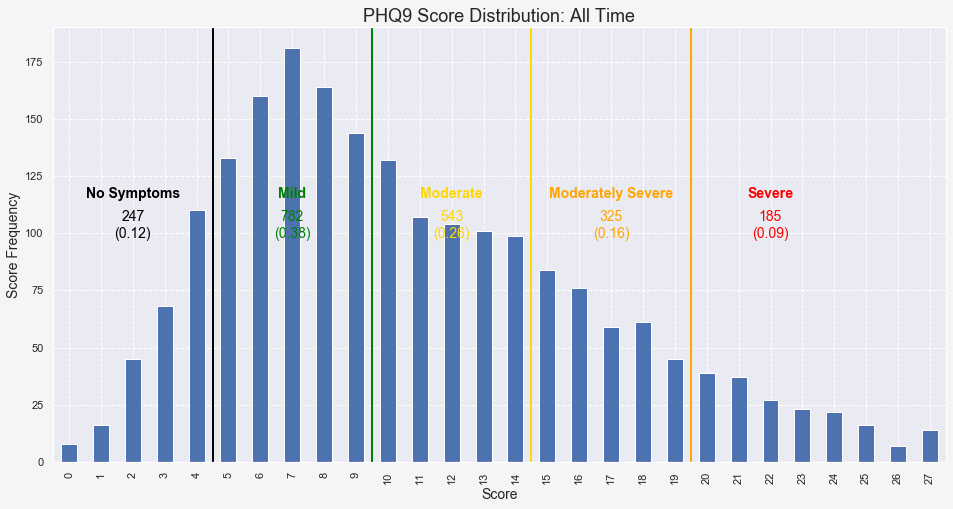

In [151]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
PHQ9_data.plot(ax=ax, kind='bar')
ax.set_title('PHQ9 Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(4.5, linewidth=2, color='black')
ax.axvline(9.5, linewidth=2, color='green')
ax.axvline(14.5, linewidth=2, color='gold')
ax.axvline(19.5, linewidth=2, color='orange')

ax.text(2, 120, 'No Symptoms', va='top', ha='center', color='black', fontsize=14, fontweight='bold')
ax.text(7, 120, 'Mild', va='top', ha='center', color='green', fontsize=14, fontweight='bold')
ax.text(12, 120, 'Moderate', va='top', ha='center', color='gold', fontsize=14, fontweight='bold')
ax.text(17, 120, 'Moderately Severe', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(22, 120, 'Severe', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(2, 110, str(PHQ9_data.loc[0:4].sum()) + '\n(' + str(round(PHQ9_data.loc[0:4].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='black', fontsize=14)
ax.text(7, 110, str(PHQ9_data.loc[5:9].sum()) + '\n(' + str(round(PHQ9_data.loc[5:9].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='green', fontsize=14)
ax.text(12, 110, str(PHQ9_data.loc[10:14].sum()) + '\n(' + str(round(PHQ9_data.loc[10:14].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='gold', fontsize=14)
ax.text(17, 110, str(PHQ9_data.loc[15:19].sum()) + '\n(' + str(round(PHQ9_data.loc[15:19].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(22, 110, str(PHQ9_data.loc[20:].sum()) + '\n(' + str(round(PHQ9_data.loc[20:].sum()/PHQ9_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)

save_figure(fig, FIGURE_PATH, 'PHQ9_hist_allTime_')

#### Time Series

In [152]:
print(len(PHQ9_ts_data))
PHQ9_ts_data.head()

29


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
year month                                                         
2020 4                   111          11.1982               10.0   
     5                    93          11.5914               10.0   
     6                   123          10.9837               10.0   
     7                   123          11.3984               11.0   
     8                   104          10.6923                9.0   

            PHQ9_crisis_count  
year month                     
2020 4                     23  
     5                     12  
     6                     20  
     7                     26  
     8                     18

In [153]:
print(len(PHQ9_weekly_ts_data))
PHQ9_weekly_ts_data.head()

121


PHQ9_score_count  PHQ9_score_mean  PHQ9_score_median  \
Year Month Week                                                         
2020 4     9                   51          12.1373               10.0   
           16                  37          10.4865                9.0   
           23                  22           9.9545               11.0   
           30                  22          11.6364                9.5   
     5     7                   28          12.8571               12.5   

                 PHQ9_crisis_count  
Year Month Week                     
2020 4     9                    16  
           16                    6  
           23                    1  
           30                    2  
     5     7                     6

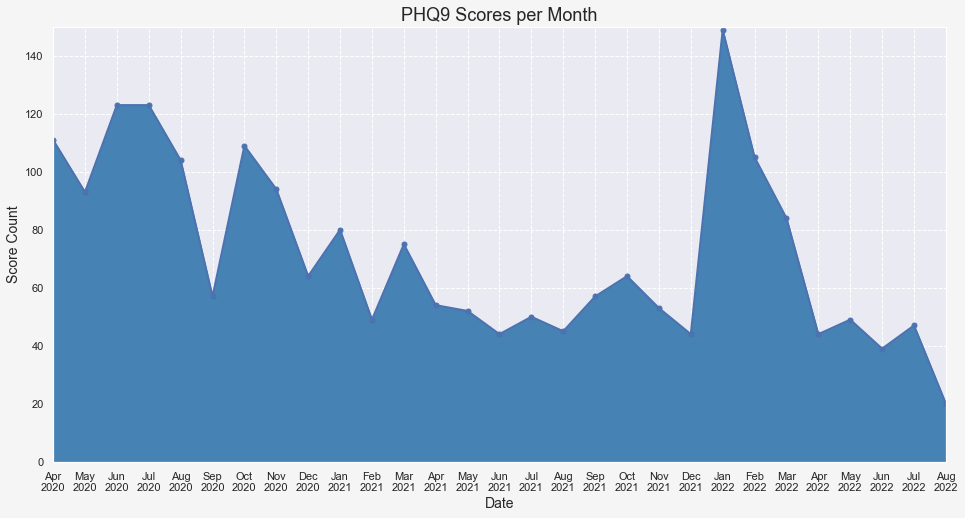

In [154]:
# PHQ9 scores by month
xlabels = get_ts_xlabels(index=PHQ9_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ9_ts_data['PHQ9_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ9 Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ9_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ9_ts_data)-1)
ax.set_ylim(0,150)
ax.fill_between(np.arange(len(PHQ9_ts_data)), 0, PHQ9_ts_data['PHQ9_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ9_monthly_')

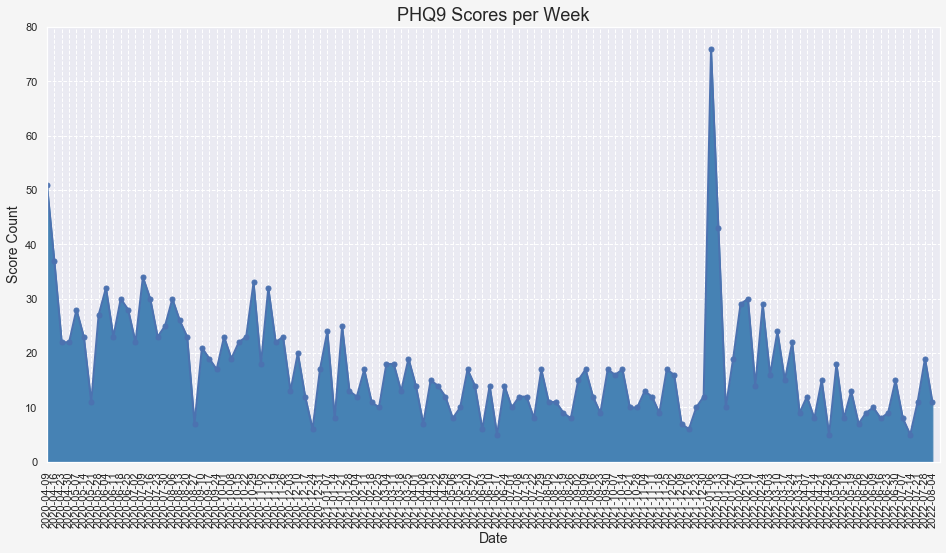

In [155]:
# PHQ9 scores by week
xlabels = get_ts_xlabels(index=PHQ9_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PHQ9_weekly_ts_data['PHQ9_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PHQ9 Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PHQ9_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PHQ9_weekly_ts_data)-0)
ax.set_ylim(0,80)
ax.fill_between(np.arange(len(PHQ9_weekly_ts_data)), 0, PHQ9_weekly_ts_data['PHQ9_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PHQ9_weekly_')

### GAD7

#### Score Distribution

In [156]:
GAD7_data.head()

0     1
1     8
2    28
3    49
4    79
Name: GAD7_score, dtype: int64

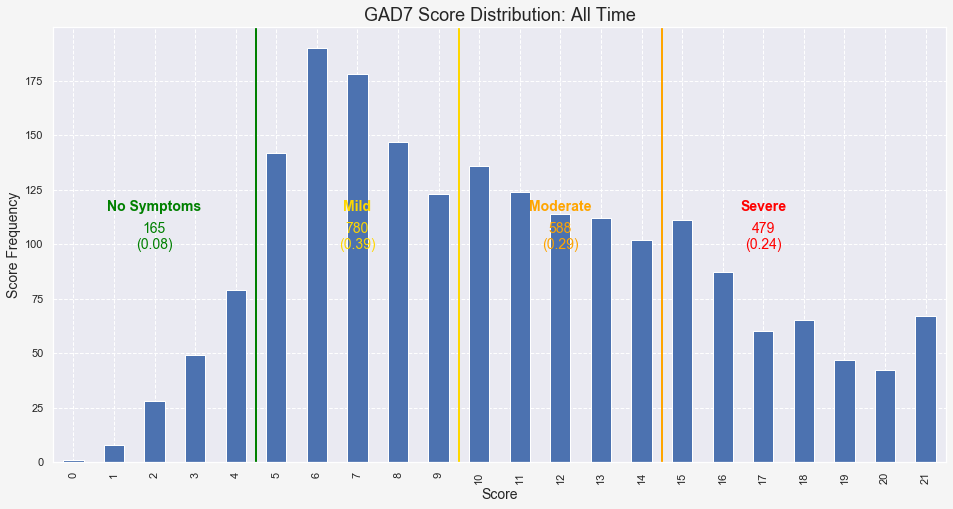

In [157]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
GAD7_data.plot(ax=ax, kind='bar')
ax.set_title('GAD7 Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(4.5, linewidth=2, color='green')
ax.axvline(9.5, linewidth=2, color='gold')
ax.axvline(14.5, linewidth=2, color='orange')

ax.text(2, 120, 'No Symptoms', va='top', ha='center', color='green', fontsize=14, fontweight='bold')
ax.text(7, 120, 'Mild', va='top', ha='center', color='gold', fontsize=14, fontweight='bold')
ax.text(12, 120, 'Moderate', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(17, 120, 'Severe', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(2, 110, str(GAD7_data.loc[0:4].sum()) + '\n(' + str(round(GAD7_data.loc[0:4].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='green', fontsize=14)
ax.text(7, 110, str(GAD7_data.loc[5:9].sum()) + '\n(' + str(round(GAD7_data.loc[5:9].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='gold', fontsize=14)
ax.text(12, 110, str(GAD7_data.loc[10:14].sum()) + '\n(' + str(round(GAD7_data.loc[10:14].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(17, 110, str(GAD7_data.loc[15:].sum()) + '\n(' + str(round(GAD7_data.loc[15:].sum()/GAD7_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)

save_figure(fig, FIGURE_PATH, 'GAD7_hist_allTime_')

#### Time Series

In [158]:
print(len(GAD7_ts_data))
GAD7_ts_data.head()

29


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
year month                                                         
2020 4                   102          11.3627               12.0   
     5                    90          11.6111               11.0   
     6                   115          10.8174               10.0   
     7                   115          10.9826               10.0   
     8                   102          10.9706               10.5   

            GAD7_crisis_count  
year month                     
2020 4                     18  
     5                     11  
     6                     16  
     7                     20  
     8                     18

In [159]:
print(len(GAD7_weekly_ts_data))
GAD7_weekly_ts_data.head()

121


GAD7_score_count  GAD7_score_mean  GAD7_score_median  \
Year Month Week                                                         
2020 4     9                   43          11.9767               12.0   
           16                  36           9.8889                9.5   
           23                  22          12.4091               13.0   
           30                  22          11.4091               11.5   
     5     7                   27          11.1852               11.0   

                 GAD7_crisis_count  
Year Month Week                     
2020 4     9                    12  
           16                    5  
           23                    1  
           30                    2  
     5     7                     5

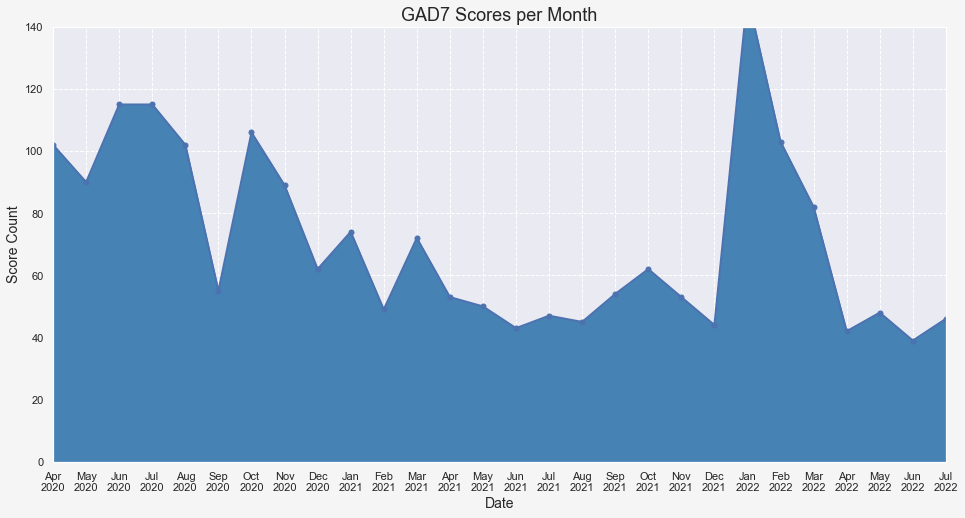

In [160]:
# GAD7 scores by month
xlabels = get_ts_xlabels(index=GAD7_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(GAD7_ts_data['GAD7_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('GAD7 Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(GAD7_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(GAD7_ts_data)-2)
ax.set_ylim(0,140)
ax.fill_between(np.arange(len(GAD7_ts_data)), 0, GAD7_ts_data['GAD7_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'GAD7_monthly_')

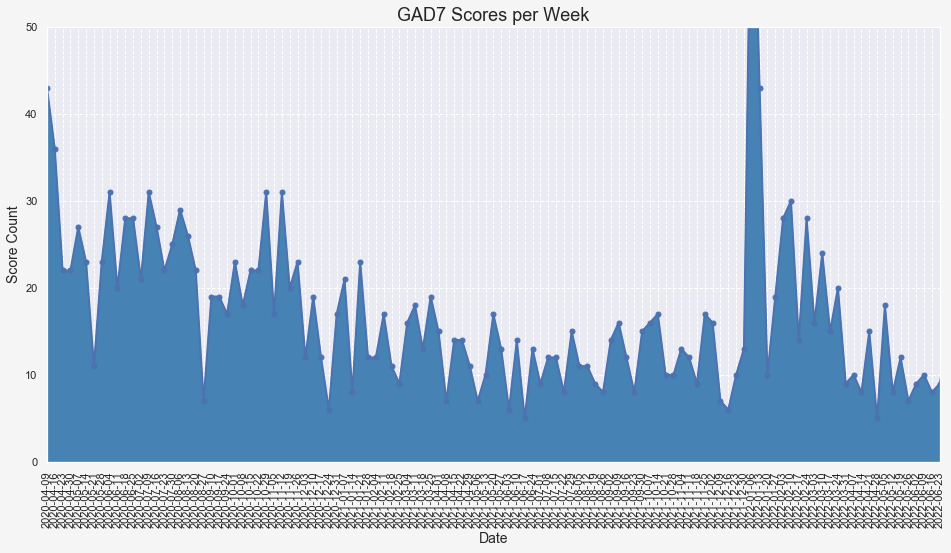

In [161]:
# GAD7 scores by week
xlabels = get_ts_xlabels(index=GAD7_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(GAD7_weekly_ts_data['GAD7_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('GAD7 Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(GAD7_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(GAD7_weekly_ts_data)-7)
ax.set_ylim(0,50)
ax.fill_between(np.arange(len(GAD7_weekly_ts_data)), 0, GAD7_weekly_ts_data['GAD7_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'GAD7_weekly_')

### PC-PTSD

#### Score Distribution

In [162]:
PCPTSD_data.head()

0    358
1    554
2    454
3    300
4    180
Name: PCPTSD_score, dtype: int64

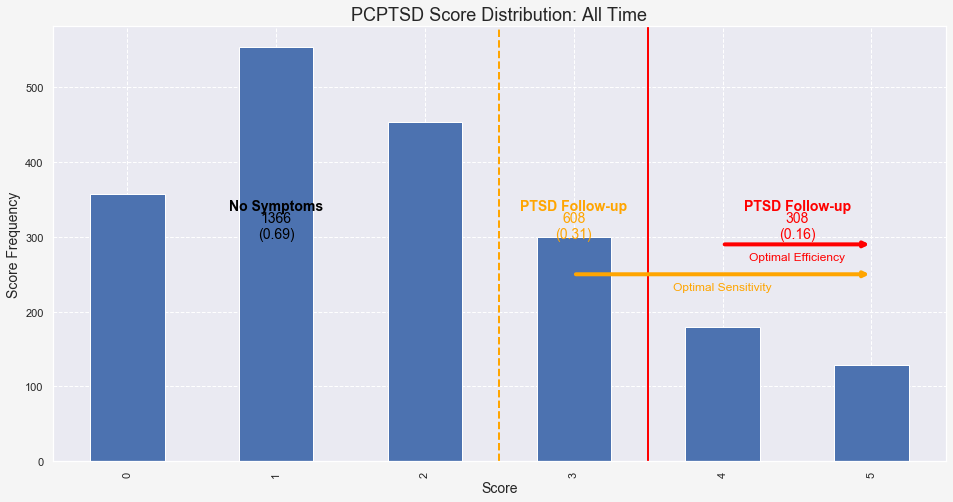

In [163]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
PCPTSD_data.plot(ax=ax, kind='bar')
ax.set_title('PCPTSD Score Distribution: All Time', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Frequency', fontsize=14)

ax.axvline(2.5, linewidth=2, linestyle='--', color='orange')
ax.axvline(3.5, linewidth=2, color='red')

ax.text(1, 350, 'No Symptoms', va='top', ha='center', color='black', fontsize=14, fontweight='bold')
ax.text(3, 350, 'PTSD Follow-up', va='top', ha='center', color='orange', fontsize=14, fontweight='bold')
ax.text(4.5, 350, 'PTSD Follow-up', va='top', ha='center', color='red', fontsize=14, fontweight='bold')

ax.text(1, 335, str(PCPTSD_data.loc[0:2].sum()) + '\n(' + str(round(PCPTSD_data.loc[0:2].sum()/PCPTSD_data.sum(),2)) + ')', va='top', ha='center', color='black', fontsize=14)
ax.text(3, 335, str(PCPTSD_data.loc[3:5].sum()) + '\n(' + str(round(PCPTSD_data.loc[3:5].sum()/PCPTSD_data.sum(),2)) + ')', va='top', ha='center', color='orange', fontsize=14)
ax.text(4.5, 335, str(PCPTSD_data.loc[4:5].sum()) + '\n(' + str(round(PCPTSD_data.loc[4:5].sum()/PCPTSD_data.sum(),2)) + ')', va='top', ha='center', color='red', fontsize=14)


ax.annotate('', xy=(3,250), xytext=(5,250),
            arrowprops={'arrowstyle': '<-', 'lw': 4, 'color': 'orange'},
            va='center', ha='left')
ax.text(4, 240, 'Optimal Sensitivity', va='top', ha='center',color='orange', fontsize=12)

ax.annotate('', xy=(4,290), xytext=(5,290),
            arrowprops={'arrowstyle': '<-', 'lw': 4, 'color': 'red'},
            va='center', ha='left')
ax.text(4.5, 280, 'Optimal Efficiency', va='top', ha='center',color='red', fontsize=12)

save_figure(fig, FIGURE_PATH, 'PCPTSD_hist_allTime_')

#### Time Series

In [164]:
print(len(PCPTSD_ts_data))
PCPTSD_ts_data.head()

29


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
year month                                                               
2020 4                     101             2.2970                  2.0   
     5                      87             2.3218                  2.0   
     6                     112             2.0089                  2.0   
     7                     115             1.9565                  2.0   
     8                      98             2.1939                  2.0   

            PCPTSD_crisis_count  
year month                       
2020 4                       18  
     5                       11  
     6                       14  
     7                       20  
     8                       17

In [165]:
print(len(PCPTSD_weekly_ts_data))
PCPTSD_weekly_ts_data.head()

121


PCPTSD_score_count  PCPTSD_score_mean  PCPTSD_score_median  \
Year Month Week                                                               
2020 4     9                     42             2.1667                  2.0   
           16                    36             2.3056                  2.0   
           23                    22             2.5000                  3.0   
           30                    22             2.5455                  2.5   
     5     7                     27             2.2222                  2.0   

                 PCPTSD_crisis_count  
Year Month Week                       
2020 4     9                      12  
           16                      5  
           23                      1  
           30                      2  
     5     7                       5

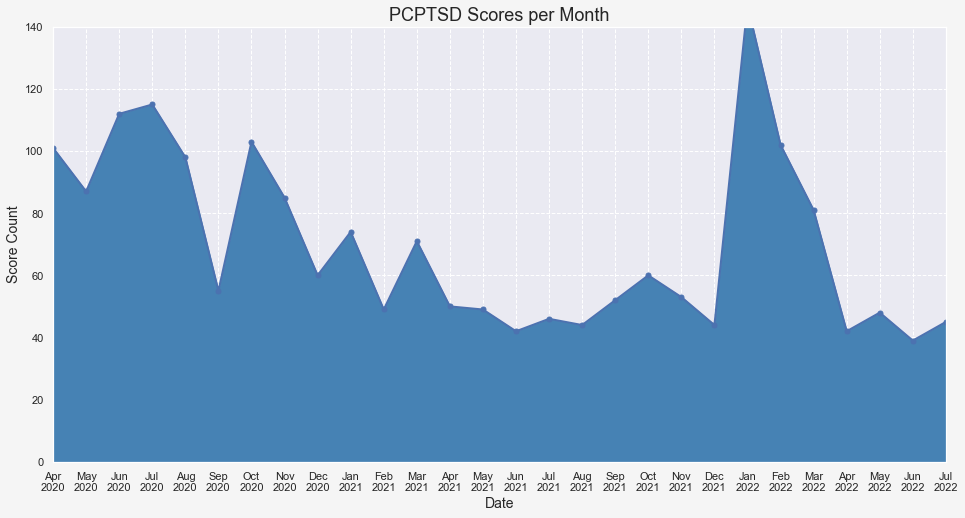

In [166]:
# PCPTSD scores by month
xlabels = get_ts_xlabels(index=PCPTSD_ts_data.index, time='monthly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PCPTSD_ts_data['PCPTSD_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PCPTSD Scores per Month', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PCPTSD_ts_data)))
ax.set_xticklabels(xlabels, rotation=0)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PCPTSD_ts_data)-2)
ax.set_ylim(0,140)
ax.fill_between(np.arange(len(PCPTSD_ts_data)), 0, PCPTSD_ts_data['PCPTSD_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PCPTSD_monthly_')

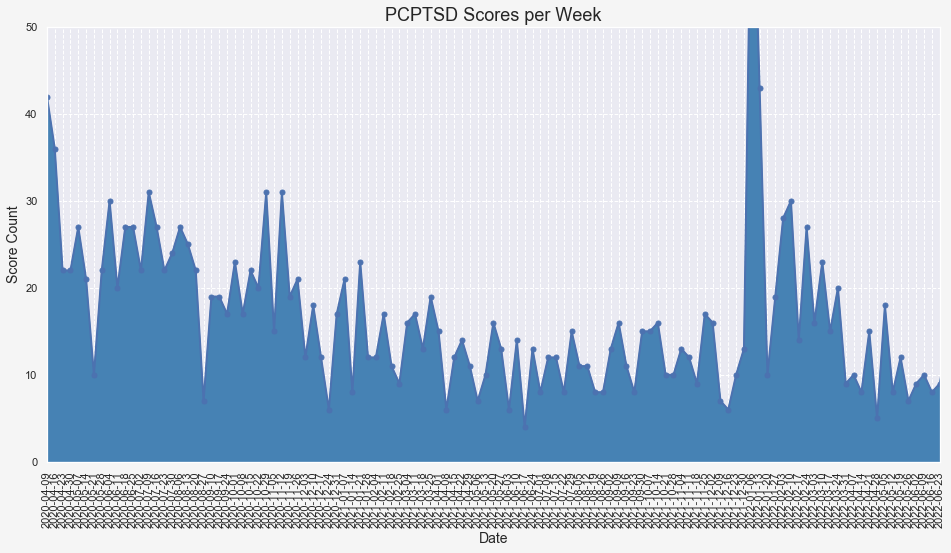

In [167]:
# PCPTSD scores by week
xlabels = get_ts_xlabels(index=PCPTSD_weekly_ts_data.index, time='weekly')

fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
ax.plot(PCPTSD_weekly_ts_data['PCPTSD_score_count'].values, linewidth=2, marker='.', markersize=10)
ax.set_title('PCPTSD Scores per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(len(PCPTSD_weekly_ts_data)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_xlim(0,len(PCPTSD_weekly_ts_data)-7)
ax.set_ylim(0,50)
ax.fill_between(np.arange(len(PCPTSD_weekly_ts_data)), 0, PCPTSD_weekly_ts_data['PCPTSD_score_count'], color='steelblue')

save_figure(fig, FIGURE_PATH, 'PCPTSD_weekly_')

# Dashboard and Reporting Data

## Time Series

### Monthly

In [168]:
# Create time series dataset - can remove multiindex and add datetime index if needed
use_cols = ['user_count','apt_count','apt_completed_count','apt_canceled_count','apt_avail_count','prov_count']

time_series_monthly = acct_monthly_ts_data.merge(apt_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_completed_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_canceled_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(apt_avail_ts_data, how='outer', left_index=True, right_index=True)
time_series_monthly = time_series_monthly.merge(prov_ts_data, how='outer', left_index=True, right_index=True)

time_series_monthly.columns = use_cols
time_series_monthly = time_series_monthly.fillna(0)

In [169]:
name = CHART_PATH + 'time_series_monthly_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
time_series_monthly.to_csv(name)

In [170]:
print(len(time_series_monthly))
print(len(time_series_monthly.columns))
time_series_monthly.head(2)

46
6


user_count  apt_count  apt_completed_count  apt_canceled_count  \
year month                                                                   
2020 4          3003.0       66.0                 53.0                13.0   
     5          1918.0      160.0                121.0                39.0   

            apt_avail_count  prov_count  
year month                               
2020 4                  0.0        63.0  
     5                 11.0       100.0

### Weekly

In [171]:
# Create time series dataset - can remove multiindex and add datetime index if needed
use_cols = ['user_count','apt_count','apt_completed_count','apt_canceled_count','apt_avail_count','prov_count']

time_series_weekly = acct_weekly_ts_data.merge(apt_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_weekly_completed_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_weekly_canceled_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(apt_avail_weekly_ts_data, how='outer', left_index=True, right_index=True)
time_series_weekly = time_series_weekly.merge(prov_weekly_ts_data, how='outer', left_index=True, right_index=True)

time_series_weekly.columns = use_cols
time_series_weekly.index.names = ['year','month','week']
time_series_weekly = time_series_weekly.fillna(0)

In [172]:
name = CHART_PATH + 'time_series_weekly_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
time_series_weekly.to_csv(name)

In [173]:
print(len(time_series_weekly))
print(len(time_series_weekly.columns))
time_series_weekly.head(2)

198
6


user_count  apt_count  apt_completed_count  \
year month week                                               
2020 4     9         1456.0        4.0                  3.0   
           16         946.0       24.0                 19.0   

                 apt_canceled_count  apt_avail_count  prov_count  
year month week                                                   
2020 4     9                    1.0              0.0        23.0  
           16                   5.0              0.0         0.0

# Exploratory

## User Characteristics
* Create user characteristics dataset for summary stats and machine learning applications (clustering, predictive modeling, etc.)

In [174]:
appointment.head(2)

appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
0  8e52c173-f3d4-4b9d-913c-32a5679e2387  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9             8.0982e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
0                         NaN              NaN            1.0305e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
0  https://bluejeans.com/166022552/0525                 1:1 with Care Manager   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
0 2022-04-22 11:00:00-04:00 2022-04-22 11:30:00                   30   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
0  America/New_York     False         NaT 2022-04-20 11:32:48.204541-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
0 2022-04-20 15:32:48.204541+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
0  aef3538a-73fa-40cf-8d3f-367022913b9c         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
0  9a64f46d-ca02-4783-9f75-d9f708a79fa9    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
0                           0525  20290377-2978-4472-b00c-6f604f25ee58   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
0               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None   
0  08048f29-035c-4341-82fd-b41406303114                    None   

  patient_reminder_scheduled_message_id patient_order_id  \
0                                  None             None   
0                                  None             None   

  epic_appointment_fhir_id appointment_cancelation_reason_id  \
0                     None                       UNSPECIFIED   
0                     None                       UNSPECIFIED   

  epic_appointment_fhir_identifier_system  \
0                                    None   
0                                    None   

  epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
0                                   None                                None   
0                                   None                                None   

   created_year  created_month  created_day created_year_month  \
0          2022              6           22         2022-06-01   
0          2022              4           20         2022-04-01   

  created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
0              2022-06-16          20220622      2022          7        6   
0              2022-04-14          20220420      2022          4       22   

 

In [175]:
# number of apts per account
user_num_apts = appointment.groupby(['account_id']).count()[['appointment_id']]
user_num_apts.columns = ['num_apts']

# number of providers per account
user_num_providers = appointment.groupby(['account_id']).agg({'provider_id':'nunique'})
user_num_providers.columns = ['num_providers']

# mean appointments per provider
user_mean_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].mean(level=0).round()
user_mean_apt_provider.columns = ['mean_apt_per_provider']

# min appointments per provider
user_min_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].min(level=0)
user_min_apt_provider.columns = ['min_apt_per_provider']

# max appointments per provider
user_max_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].max(level=0)
user_max_apt_provider.columns = ['max_apt_per_provider']

# max-min appointments per provider
user_range_apt_provider = appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].max(level=0) - appointment.groupby(['account_id', 'provider_id']).count()[['appointment_id']].min(level=0)
user_range_apt_provider.columns = ['range_apt_per_provider']

# mean appointment created to completed time
user_mean_created_completed_time = appointment.groupby(['account_id'])[['created_completed_time']].mean().round()
user_mean_created_completed_time.columns = ['mean_created_completed_time']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and wil

In [176]:
user_data = pd.concat([user_num_apts, user_num_providers, user_mean_apt_provider, user_min_apt_provider, 
                       user_max_apt_provider, user_range_apt_provider, user_mean_created_completed_time], axis=1)

In [177]:
print(len(user_data))
print(len(user_data.columns))
user_data.head(20)

3255
7


num_apts  num_providers  \
account_id                                                      
000dffab-ad18-48b1-830d-bb5ef49d4f08         1              1   
00288a93-7b43-430b-89f5-181d3a1f5664         1              1   
0035c06c-a6c1-4651-b702-8e91828b8c01         1              1   
003e8918-933d-4cff-86ee-343e97cf7483         1              1   
00464091-4464-422e-bb58-b56755869ce4         2              1   
0066a0b5-8ead-41f5-8b92-377b2250b4c1         1              1   
008708ce-4313-4d65-aecc-9df87f376d26         1              1   
00896d9e-54f4-49da-8d24-8e970b63f8dc         1              1   
009a8b22-60f7-40cf-9314-6f4a903c0654         1              1   
009bc0c1-4b47-4c45-9087-a3318eb2d82e         1              1   
00a3a735-7ab0-407f-935e-f8e9c65d4af7         1              1   
00b4d050-4c1d-4c81-98c9-55cfc9482207         1              1   
00de2fb4-c9eb-487c-aca3-5f8143ea5446         1              1   
00e09569-d22a-403f-bced-864d3b1c2f2e         1              1   
00f4f773-ad8c-4b12-81e6-d17fdf8f8e14         1              1   
00ffedde-2b2f-440f-aabc-8e18fc14243c         2              1   
01269e43-c9db-49ce-b80c-1dbd10903f63         2              1   
013465aa-c8f0-40b3-8691-fb1864b637af         1              1   
0139658a-ec2d-4f87-8b6a-9d41340d55f2         1              1   
01484884-1f70-42ac-a3cb-413aa0b5f987         1              1   

                                      mean_apt_per_provider  \
account_id                                                    
000dffab-ad18-48b1-830d-bb5ef49d4f08                    1.0   
00288a93-7b43-430b-89f5-181d3a1f5664                    1.0   
0035c06c-a6c1-4651-b702-8e91828b8c01                    1.0   
003e8918-933d-4cff-86ee-343e97cf7483                    1.0   
00464091-4464-422e-bb58-b56755869ce4                    2.0   
0066a0b5-8ead-41f5-8b92-377b2250b4c1                    1.0   
008708ce-4313-4d65-aecc-9df87f376d26                    1.0   
00896d9e-54f4-49da-8d24-8e970b63f8dc                    1.0   
009a8b22-60f7-40cf-9314-6f4a903c0654                    1.0   
009bc0c1-4b47-4c45-9087-a3318eb2d82e                    1.0   
00a3a735-7ab0-407f-935e-f8e9c65d4af7                    1.0   
00b4d050-4c1d-4c81-98c9-55cfc9482207                    1.0   
00de2fb4-c9eb-487c-aca3-5f8143ea5446                    1.0   
00e09569-d22a-403f-bced-864d3b1c2f2e                    1.0   
00f4f773-ad8c-4b12-81e6-d17fdf8f8e14                    1.0   
00ffedde-2b2f-440f-aabc-8e18fc14243c                    2.0   
01269e43-c9db-49ce-b80c-1dbd10903f63                    2.0   
013465aa-c8f0-40b3-8691-fb1864b637af                    1.0   
0139658a-ec2d-4f87-8b6a-9d41340d55f2                    1.0   
01484884-1f70-42ac-a3cb-413aa0b5f987                    1.0   

                                      min_apt_per_provider  \
account_id                                                   
000dffab-ad18-48b1-830d-bb5ef49d4f08                     1   
00288a93-7b43-430b-89f5-181d3a1f5664                     1   
0035c06c-a6c1-4651-b702-8e91828b8c01                     1   
003e8918-933d-4cff-86ee-343e97cf7483                     1   
00464091-4464-422e-bb58-b56755869ce4                     2   
0066a0b5-8ead-41f5-8b92-377b2250b4c1                     1   
008708ce-4313-4d65-aecc-9df87f376d26                     1   
00896d9e-54f4-49da-8d24-8e970b63f8dc                     1   
009a8b22-60f7-40cf-9314-6f4a903c0654                     1   
009bc0c1-4b47-4c45-9087-a3318eb2d82e                     1   
00a3a735-7ab0-407f-935e-f8e9c65d4af7                     1   
00b4d050-4c1d-4c81-98c9-55cfc9482207                     1   
00de2fb4-c9eb-487c-aca3-5f8143ea5446                     1   
00e09569-d22a-403f-bced-864d3b1c2f2e                     1   
00f4f773-ad8c-4b12-81e6-d17fdf8f8e14                     1   
00ffedde-2b2f-440f-aabc-8e18fc14243c                     2   
01269e43-c9db-49ce-b80c-1dbd10903f63                     2   
013465aa-c8f0-40b3-8691-fb1864b637af      

In [178]:
appointment.created_completed_time.mean()

8.4536525475752

In [179]:
appointment.created_completed_time.median()

6.0

In [180]:
((appointment['start_time'] - appointment['created'])/np.timedelta64(1, 'D')).mean()

8.449865289214811

In [181]:
((appointment['start_time'] - appointment['created'])/np.timedelta64(1, 'D')).median()

5.590710701747685

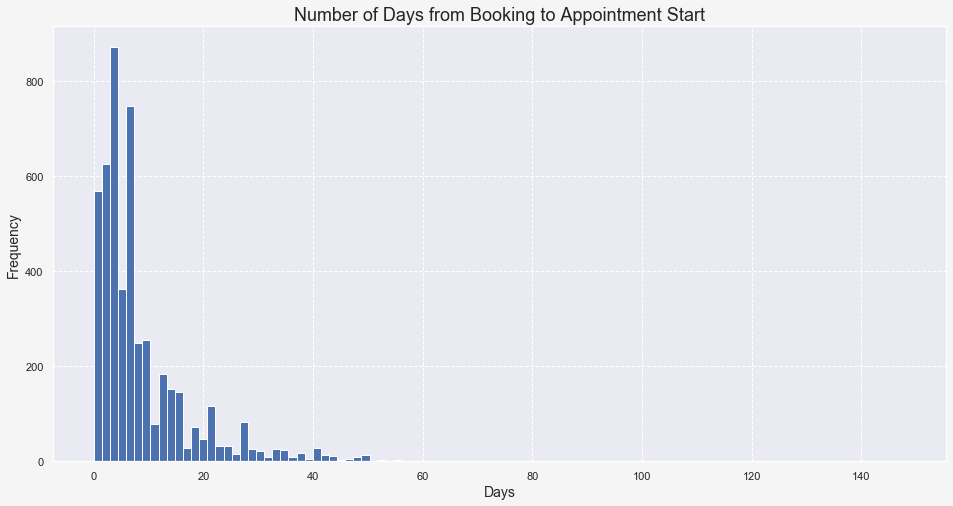

In [182]:
# Plot
fig, ax = plt.subplots(figsize=(16,8), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
appointment.created_completed_time.hist(bins=100)
ax.set_title('Number of Days from Booking to Appointment Start', fontsize=18)
ax.set_xlabel('Days', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
save_figure(fig, FIGURE_PATH, 'appointment_createdCompleted_hist_')

# Unused/Deprecated Code

In [183]:
"""
CHAPLAIN
The Chaplain is In - for You (13838743)
1:1 Session with Chaplain (14291063)
 
PEER
1:1 with Peer (14190381) 

RESILIENCE COACH
1:1 Session with Resilience Coach (13759153)

CARE MANAGER (i.e. EAP Psychotherapists)
1:1 with Care Manager (14446371)

CLINICIAN (i.e. Psychotherapists)
1:1 Initial Appointment with Psychotherapist (14710011)
1:1 CTSA Intake Appointment (21475237)
1:1 Appointment with Psychotherapist (13869919)
CCT Intake Appointment (14439014) 

PSYCHIATRIST (i.e. Psychiatrists & Psychiatric Nurse Practitioners)
1:1 Session with Psychiatrist (13862309)
1:1 Psychiatrist Follow-ups (13863435)
1:1 with Psychiatric Nurse Practitioner (14445820)
1:1 Psych NP Follow-Up (14460017)

OTHER (i.e. Nutritionists, Pain Specialists, Exercise Physiologists, etc.)
1:1 with Dietitian (15523504)
1:1 Session with Exercise Physiologist (14033325)
1:1 Strength and Training Specialist (15677112)
1:1 with Pain Specialist (14300187)
"""

'\nCHAPLAIN\nThe Chaplain is In - for You (13838743)\n1:1 Session with Chaplain (14291063)\n \nPEER\n1:1 with Peer (14190381) \n\nRESILIENCE COACH\n1:1 Session with Resilience Coach (13759153)\n\nCARE MANAGER (i.e. EAP Psychotherapists)\n1:1 with Care Manager (14446371)\n\nCLINICIAN (i.e. Psychotherapists)\n1:1 Initial Appointment with Psychotherapist (14710011)\n1:1 CTSA Intake Appointment (21475237)\n1:1 Appointment with Psychotherapist (13869919)\nCCT Intake Appointment (14439014) \n\nPSYCHIATRIST (i.e. Psychiatrists & Psychiatric Nurse Practitioners)\n1:1 Session with Psychiatrist (13862309)\n1:1 Psychiatrist Follow-ups (13863435)\n1:1 with Psychiatric Nurse Practitioner (14445820)\n1:1 Psych NP Follow-Up (14460017)\n\nOTHER (i.e. Nutritionists, Pain Specialists, Exercise Physiologists, etc.)\n1:1 with Dietitian (15523504)\n1:1 Session with Exercise Physiologist (14033325)\n1:1 Strength and Training Specialist (15677112)\n1:1 with Pain Specialist (14300187)\n'

In [184]:
"""

# For a quick, testing approach - need to add code to delete all records before using .to_sql with append
from sqlalchemy import create_engine
conn_str = 'postgresql://' + DB_REPORTING_USER + ':' + DB_REPORTING_PASSWORD + '@' + DB_REPORTING_HOST + '/' + DB_REPORTING_NAME
engine = create_engine(conn_str)

#time_series_monthly.to_sql(DB_REPORTING_MONTHLY_NAME, engine, if_exists='append')
#time_series_weekly.to_sql(DB_REPORTING_WEEKLY_NAME, engine, if_exists='append')

"""

"\n\n# For a quick, testing approach - need to add code to delete all records before using .to_sql with append\nfrom sqlalchemy import create_engine\nconn_str = 'postgresql://' + DB_REPORTING_USER + ':' + DB_REPORTING_PASSWORD + '@' + DB_REPORTING_HOST + '/' + DB_REPORTING_NAME\nengine = create_engine(conn_str)\n\n#time_series_monthly.to_sql(DB_REPORTING_MONTHLY_NAME, engine, if_exists='append')\n#time_series_weekly.to_sql(DB_REPORTING_WEEKLY_NAME, engine, if_exists='append')\n\n"